# Sales Forecasting

### Importing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing store data

In [2]:
store = pd.read_csv('store.csv')
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Let us perform some analysis on store data

In [3]:
#Shape
store.shape

(1115, 10)

In [4]:
#Describe
store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
# Identifying Nulls
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
# Finding out count of null vlaues for `CompetitionDistance` columns
store[pd.isnull(store['CompetitionDistance'])]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

Since the distance is not available we shall replace the value with the median value of the column

In [8]:
# Replacing null with median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

<br></br>

Now let us analyse `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` columns

In [9]:
store[pd.isnull(store['CompetitionOpenSinceMonth'])]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

We shall analyse if we have any `Null` values when Promo2 is 1

In [10]:
store[store['Promo2']==1].isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    206
CompetitionOpenSinceYear     206
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

As expected, the `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval` columns contains null values only when `Promo2` 
is 0, hence we can replace null with 0.

Also from the above analysis of distance columns, we can replace null values with 0

In [11]:
# Replacing Null values with 0
store.fillna(0, inplace = True)

### Importing Train data

In [12]:
train = pd.read_csv('train.csv',parse_dates = ['Date'], index_col = 'Date') # setting index as 'Date' column
train.head() # printing top 5 entries

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [14]:
# Finding out null values
train.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

`StateHoliday` field has data type as object, let us check the index

In [15]:
# Identifying index values
train['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

In [16]:
train['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

4 out of 5 indices are of type `string`, we shall convert `int` 0 to `str` 0 for better handling

In [17]:
# Typecasting all the entries for better handling
train['StateHoliday'] = train['StateHoliday'].astype(str)

In [18]:
train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Since the data is clean, we can perform analysis on variables

In [19]:
# Creating Month from 'Date' Index
train['Month'] = train.index.month

In [20]:
# Creating Year from 'Date' Index
train['Year'] = train.index.year

In [21]:
# Creating Week from 'Date' Index
train['Week'] = train.index.week

In [22]:
# Identifying the ratio of Sales to Customers
train['SalesperCustomers'] = (train['Sales'])/(train['Customers'])
train['SalesperCustomers'].head()

Date
2015-07-31     9.482883
2015-07-31     9.702400
2015-07-31    10.126675
2015-07-31     9.342457
2015-07-31     8.626118
Name: SalesperCustomers, dtype: float64

In [23]:
train['SalesperCustomers'].isnull().sum()

172869

In [24]:
np.round((train['SalesperCustomers'].isnull().sum()/len(train['Sales']))*100,2)

16.99

There is about 17% of 0's for SalesperCustomers ratio

### Let us plot ECDF plot

In [25]:
from statsmodels.distributions.empirical_distribution import ECDF

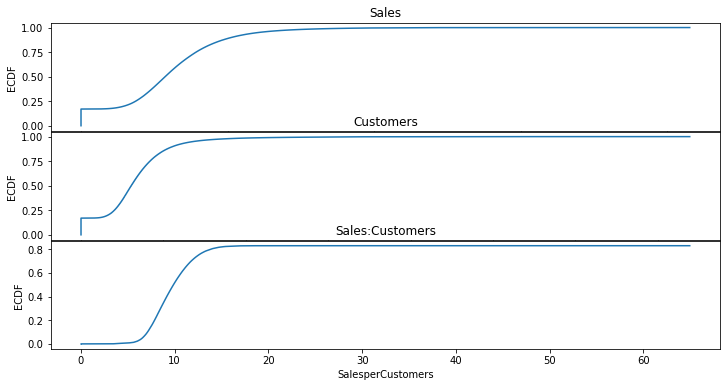

In [26]:
plt.figure(figsize = (12,6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x,cdf.y, label='Sales')
plt.xlabel('Sales');plt.ylabel('ECDF')
plt.title('Sales')

plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x,cdf.y, label='Customers')
plt.xlabel('Customers');plt.ylabel('ECDF')
plt.title('Customers')
plt.subplots_adjust(hspace = .01)

plt.subplot(313)
cdf = ECDF(train['SalesperCustomers'])
plt.plot(cdf.x,cdf.y, label='SalesperCustomers')
plt.xlabel('SalesperCustomers');plt.ylabel('ECDF')
plt.title('Sales:Customers')
plt.subplots_adjust(hspace = .01)

plt.show()

### Let us see why there are 0's in sales

In [27]:
_ = train[(train['Sales'] == 0)]
print(_.shape)
_.head()

(172871, 12)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   

            SchoolHoliday  Month  Year  Week  SalesperCustomers  
Date                                                             
2015-07-31              1      7  2015    31                NaN  
2015-07-31              1      7  2015    31                NaN  
2015-07-30              1      7  2015    31                NaN  
2015-07-30              1      7  2015    31                NaN  
2015-07-29              1      7  2015    31                NaN

**Sales are 0 since stores are closed**

We have to consider if Store is open/closed for Sales = 0

In [28]:
_ = train[(train['Sales'] == 0) & (train['Open'] == 0)]
print(_.shape)
_.head()

(172817, 12)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   

            SchoolHoliday  Month  Year  Week  SalesperCustomers  
Date                                                             
2015-07-31              1      7  2015    31                NaN  
2015-07-31              1      7  2015    31                NaN  
2015-07-30              1      7  2015    31                NaN  
2015-07-30              1      7  2015    31                NaN  
2015-07-29              1      7  2015    31                NaN

Let us check if there are any entries where sales in 0 even when the stores are open

In [29]:
_ = train[(train['Sales'] == 0) & (train['Open'] == 1)]
print(_.shape)
_.head()

(54, 12)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-15    971          5      0          0     1      0            0   
2015-03-26    674          4      0          0     1      0            0   
2015-02-05    699          4      0          0     1      1            0   
2014-10-01    708          3      0          0     1      1            0   
2014-09-22    357          1      0          0     1      0            0   

            SchoolHoliday  Month  Year  Week  SalesperCustomers  
Date                                                             
2015-05-15              1      5  2015    20                NaN  
2015-03-26              0      3  2015    13                NaN  
2015-02-05              0      2  2015     6                NaN  
2014-10-01              0     10  2014    40                NaN  
2014-09-22              0      9  2014    39                NaN

There are 54 entries where the `Sales` are `0` even when `Stores` are `Open`.

Formulating dataframe where there are sales when stores are open

### For this data, we shall consider only the stores which are opened and there are sales

In [30]:
train = train[(train['Sales'] != 0) & (train['Open'] == 1)]
print(train.shape)
train.head()

(844338, 12)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  Month  Year  Week  SalesperCustomers  
Date                                                             
2015-07-31              1      7  2015    31           9.482883  
2015-07-31              1      7  2015    31           9.702400  
2015-07-31              1      7  2015    31          10.126675  
2015-07-31              1      7  2015    31           9.342457  
2015-07-31              1      7  2015    31           8.626118

In [31]:
train.describe()

Store      DayOfWeek          Sales      Customers      Open  \
count  844338.000000  844338.000000  844338.000000  844338.000000  844338.0   
mean      558.421374       3.520350    6955.959134     762.777166       1.0   
std       321.730861       1.723712    3103.815515     401.194153       0.0   
min         1.000000       1.000000      46.000000       8.000000       1.0   
25%       280.000000       2.000000    4859.000000     519.000000       1.0   
50%       558.000000       3.000000    6369.000000     676.000000       1.0   
75%       837.000000       5.000000    8360.000000     893.000000       1.0   
max      1115.000000       7.000000   41551.000000    7388.000000       1.0   

               Promo  SchoolHoliday          Month           Year  \
count  844338.000000  844338.000000  844338.000000  844338.000000   
mean        0.446356       0.193578       5.845774    2013.831945   
std         0.497114       0.395102       3.323959       0.777271   
min         0.000000       0.000000       1.000000    2013.000000   
25%         0.000000       0.000000       3.000000    2013.000000   
50%         0.000000       0.000000       6.000000    2014.000000   
75%         1.000000       0.000000       8.000000    2014.000000   
max         1.000000       1.000000      12.000000    2015.000000   

                Week  SalesperCustomers  
count  844338.000000      844338.000000  
mean       23.646946           9.493641  
std        14.389931           2.197448  
min         1.000000           2.749075  
25%        11.000000           7.895571  
50%        23.000000           9.250000  
75%        35.000000          10.899729  
max        52.000000          64.957854

In [32]:
# Resetting index of train

train = train.reset_index()
train.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0 2015-07-31      1          5   5263        555     1      1            0   
1 2015-07-31      2          5   6064        625     1      1            0   
2 2015-07-31      3          5   8314        821     1      1            0   
3 2015-07-31      4          5  13995       1498     1      1            0   
4 2015-07-31      5          5   4822        559     1      1            0   

   SchoolHoliday  Month  Year  Week  SalesperCustomers  
0              1      7  2015    31           9.482883  
1              1      7  2015    31           9.702400  
2              1      7  2015    31          10.126675  
3              1      7  2015    31           9.342457  
4              1      7  2015    31           8.626118

### Promo

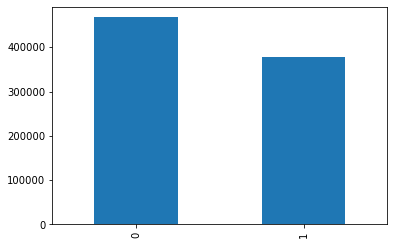

In [33]:
train['Promo'].value_counts().plot(kind='bar')

## StateHoliday/ School Holiday

StateHoliday
1. 0 : No Holiday
2. a : Public Holiday
3. b : Easter
4. c : Christmas

In [34]:
train['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder # We shall use label encoder for all categorical valued columns

In [36]:
le = LabelEncoder()

In [37]:
train['StateHoliday'] = le.fit_transform(train['StateHoliday'])

In [38]:
train['StateHoliday'].value_counts()

0    843428
1       694
2       145
3        71
Name: StateHoliday, dtype: int64

In [39]:
train['SchoolHoliday'].value_counts()

0    680893
1    163445
Name: SchoolHoliday, dtype: int64

### Promo Interval

In [40]:
store['PromoInterval'].value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [41]:
# Typecast the column to String from Int
store['PromoInterval'] = store['PromoInterval'].astype(str)

In [42]:
# Transforming the column
store['PromoInterval'] = le.fit_transform(store['PromoInterval'])

In [43]:
store['PromoInterval'].value_counts()

0    544
2    335
1    130
3    106
Name: PromoInterval, dtype: int64

### Let us merge the 2 dataframes together

In [44]:
# Merging the 2 dataframes 
data = pd.merge(train,store,how = 'inner',on = 'Store')
data.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2015-07-31      1          5   5263        555     1      1             0   
1 2015-07-30      1          4   5020        546     1      1             0   
2 2015-07-29      1          3   4782        523     1      1             0   
3 2015-07-28      1          2   5011        560     1      1             0   
4 2015-07-27      1          1   6102        612     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      7  ...           9.482883          c           a   
1              1      7  ...           9.194139          c           a   
2              1      7  ...           9.143403          c           a   
3              1      7  ...           8.948214          c           a   
4              1      7  ...           9.970588          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1270.0                       9.0                    2008.0   
1              1270.0                       9.0                    2008.0   
2              1270.0                       9.0                    2008.0   
3              1270.0                       9.0                    2008.0   
4              1270.0                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [45]:
data.shape

(844338, 22)

### Let us perform Storetype analysis

In [46]:
data.groupby('StoreType')['Sales','Customers','Promo'].mean()

Sales    Customers     Promo
StoreType                                     
a           6925.697986   795.422370  0.447464
b          10233.380141  2022.211825  0.381620
c           6933.126425   815.538073  0.449092
d           6822.300064   606.353935  0.447095

## Plots

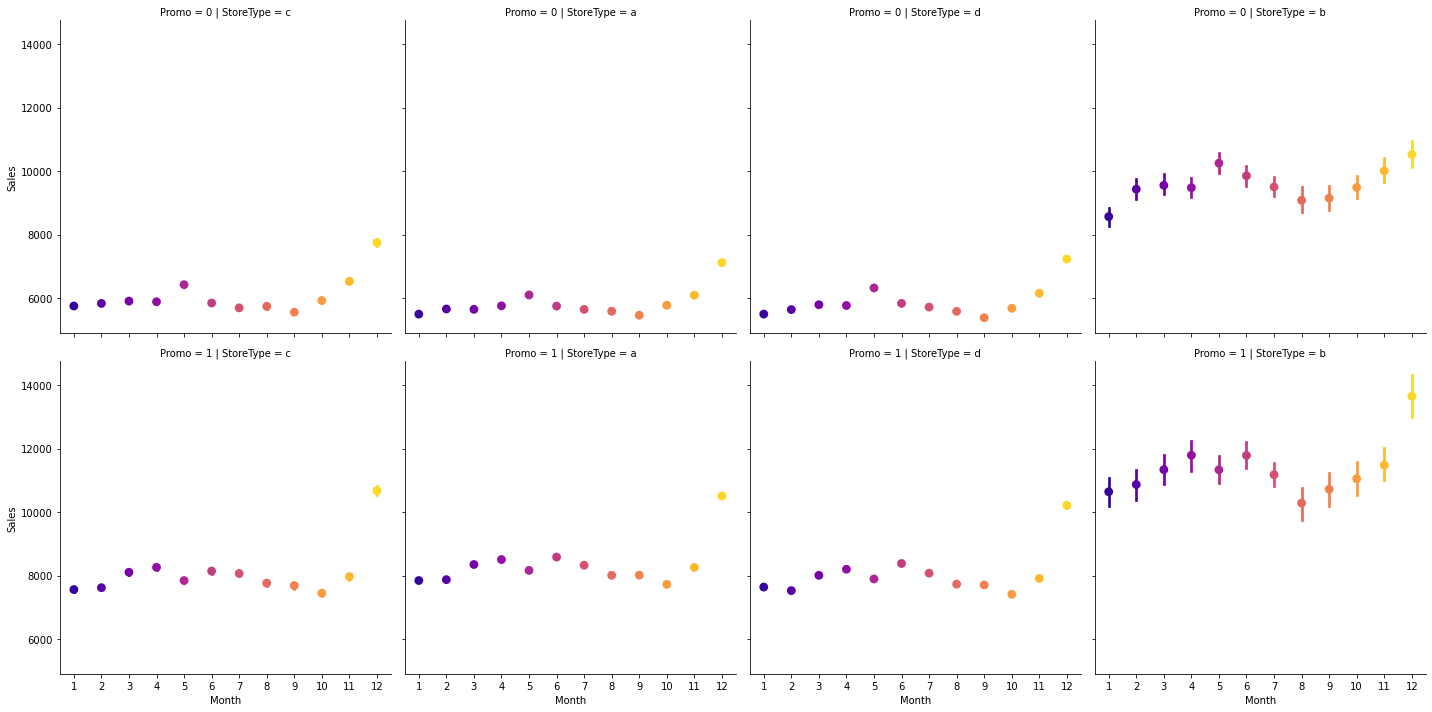

In [47]:
# Monthly Trend of Sales over Promo and StoreType
sns.color_palette()
sns.factorplot(data = data, x = 'Month', y = 'Sales', row = 'Promo', col = 'StoreType', color = '#386B7F'
               ,palette = 'plasma')
plt.show()

StoreType `b` has highest Sales per store type

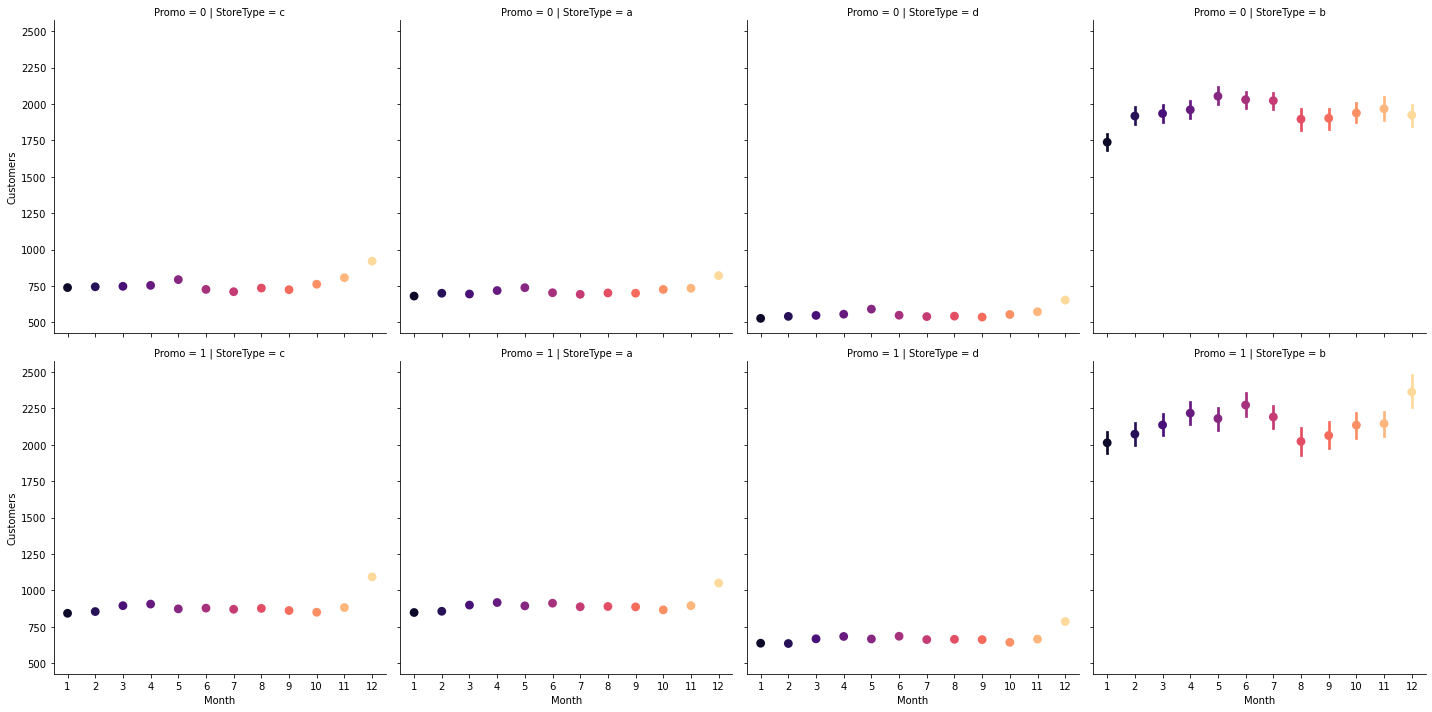

In [48]:
# Monthly Trend of Customers over Promo and StoreType
sns.color_palette()
sns.catplot(data = data, x = 'Month', y = 'Customers', row = 'Promo', col = 'StoreType', color = '#386B7F'
               ,palette = 'magma', kind="point")
plt.show()

StoreType `b` has highest Customers per storetype

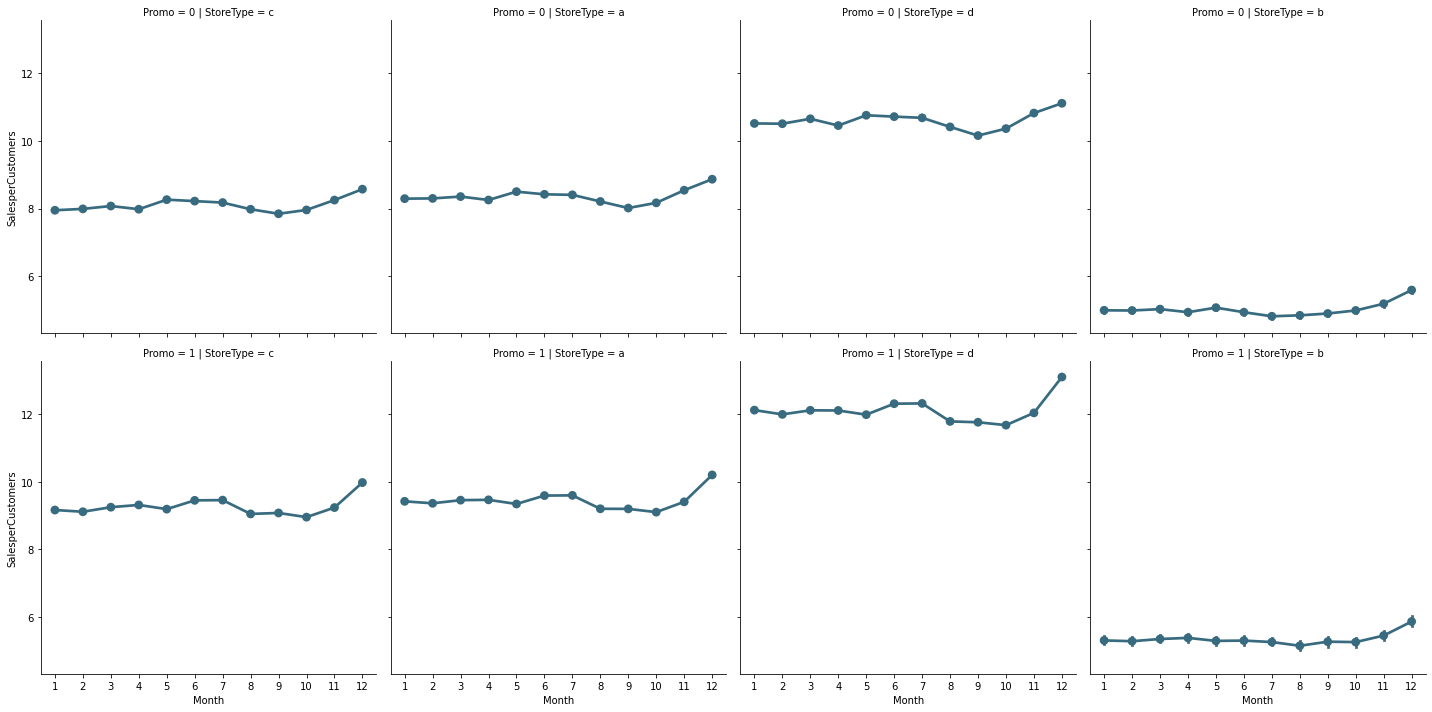

In [49]:
# # Monthly Trend of SalesperCusotmers over Promo and StoreType
sns.catplot(data = data, x = 'Month', y = 'SalesperCustomers', row = 'Promo', col = 'StoreType', color = '#386B7F'
               ,kind="point")

StoreType `d` has highest SalesperCustomer ratio

<Figure size 864x432 with 0 Axes>

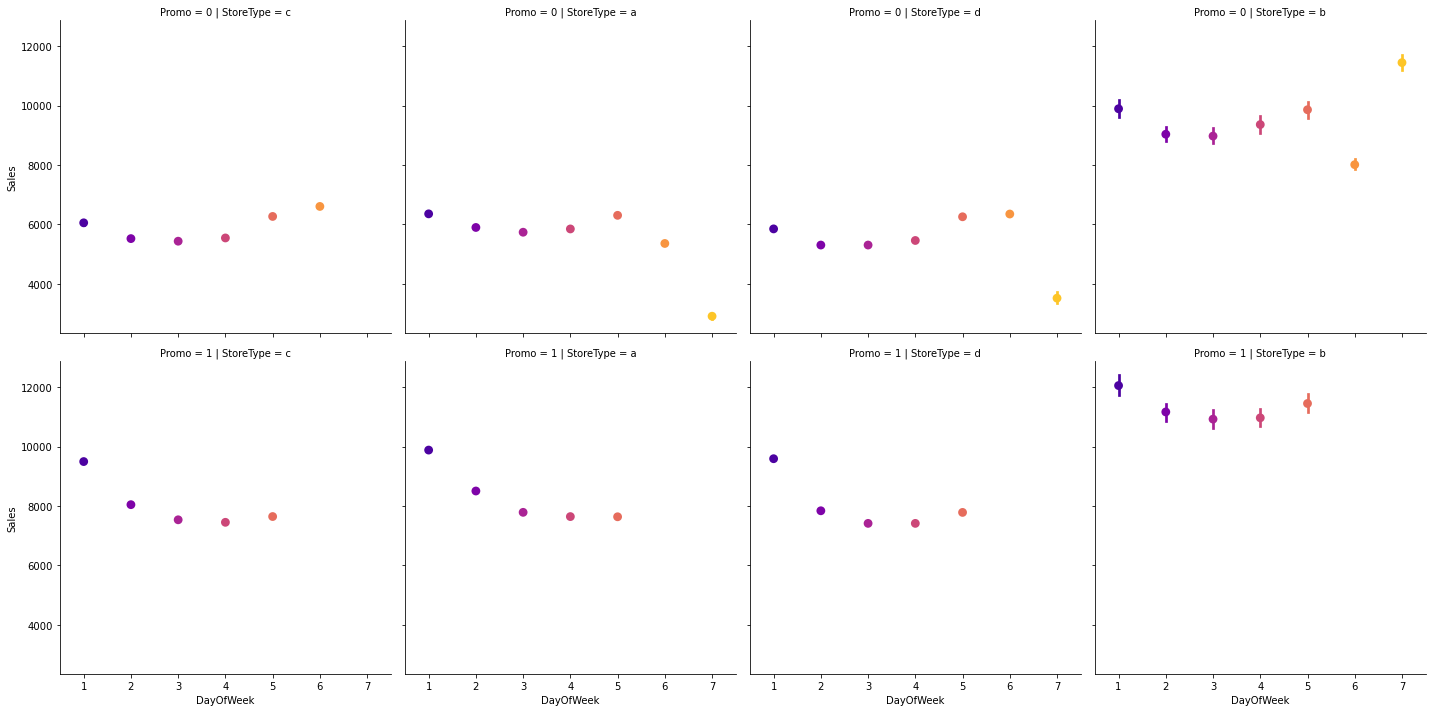

In [50]:
# Drilling down to Day of Week
plt.figure(figsize=(12,6))
sns.catplot(data = data, x = 'DayOfWeek', y = 'Sales', row = 'Promo', col = 'StoreType', palette = 'plasma'
               ,kind="point")
plt.show()

### All the stores are closed on weekends during `Promo=1`

<Figure size 864x432 with 0 Axes>

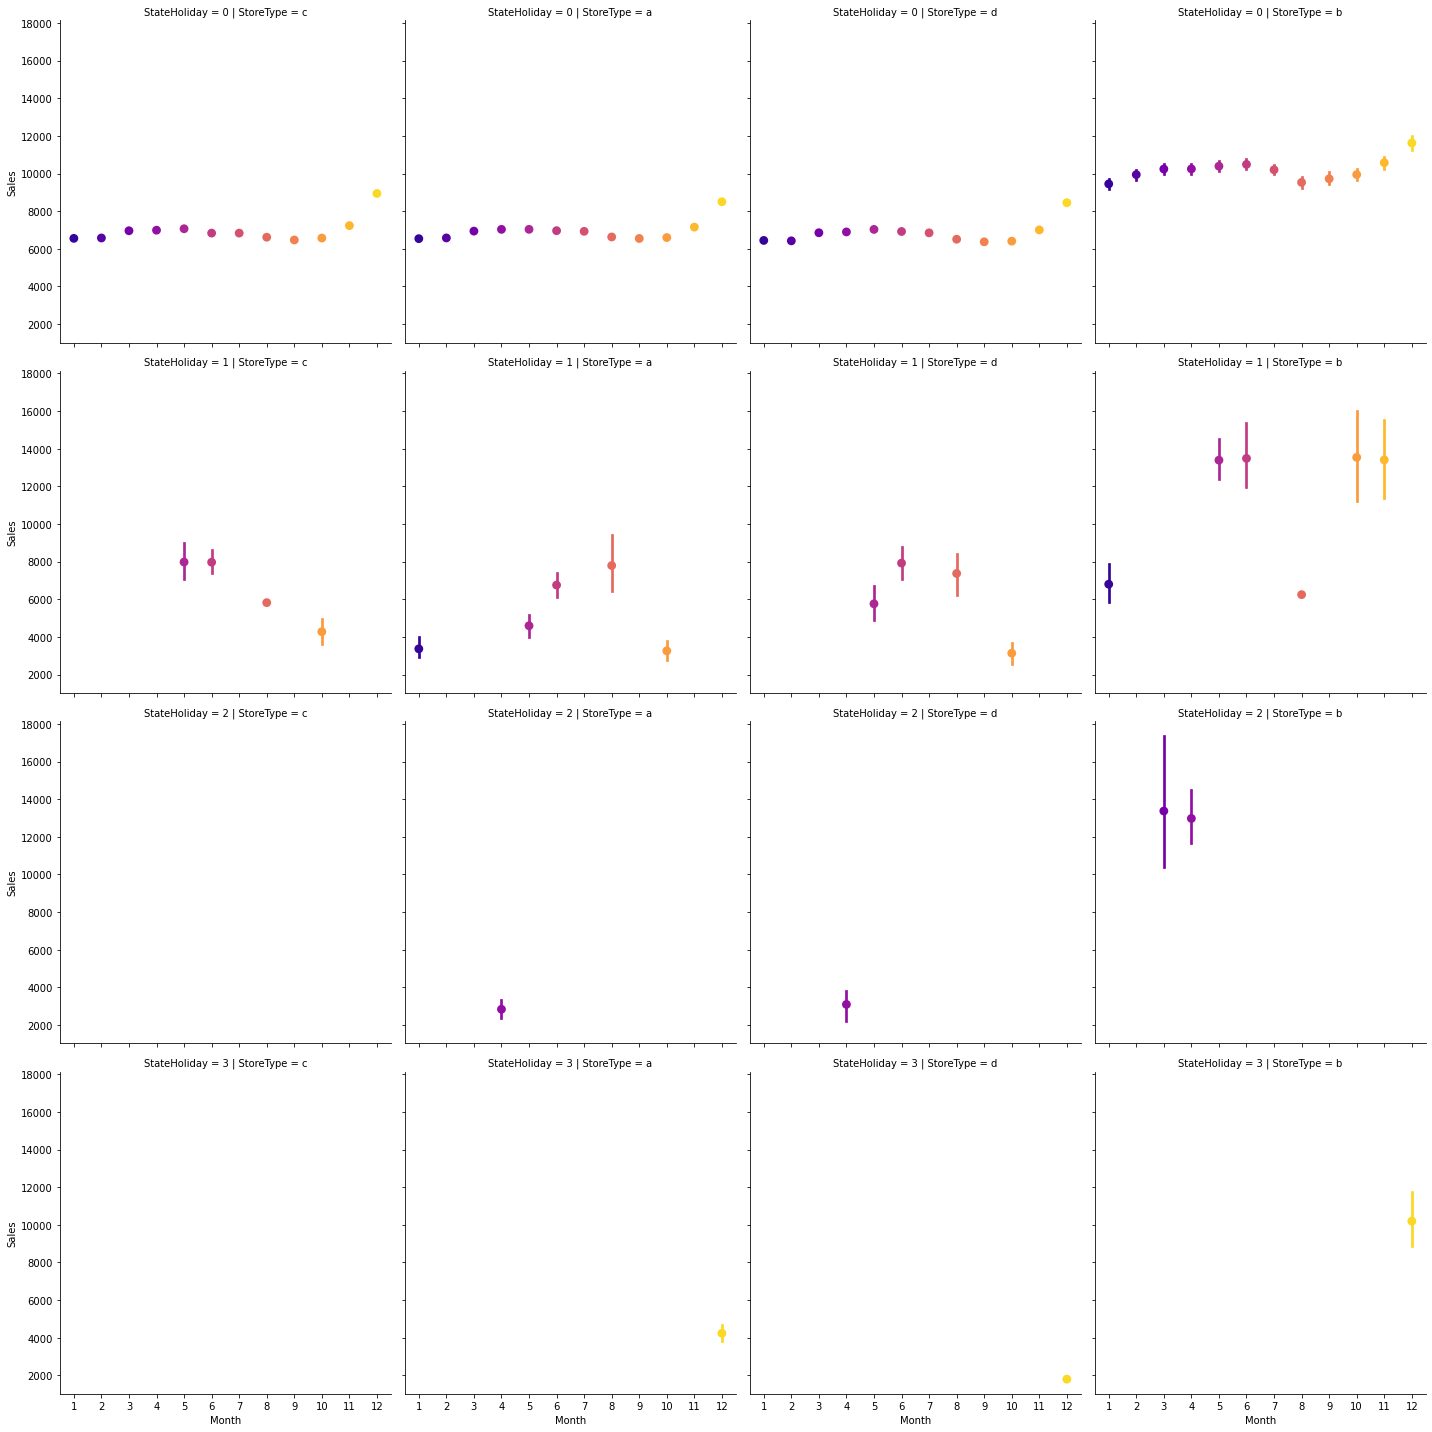

In [51]:
# StateHoliday
plt.figure(figsize=(12,6))
sns.catplot(data = data, x = 'Month', y = 'Sales', col = 'StoreType', row = 'StateHoliday', palette = 'plasma'
               ,kind="point")
plt.show()

Sales are more when there are no Holidays

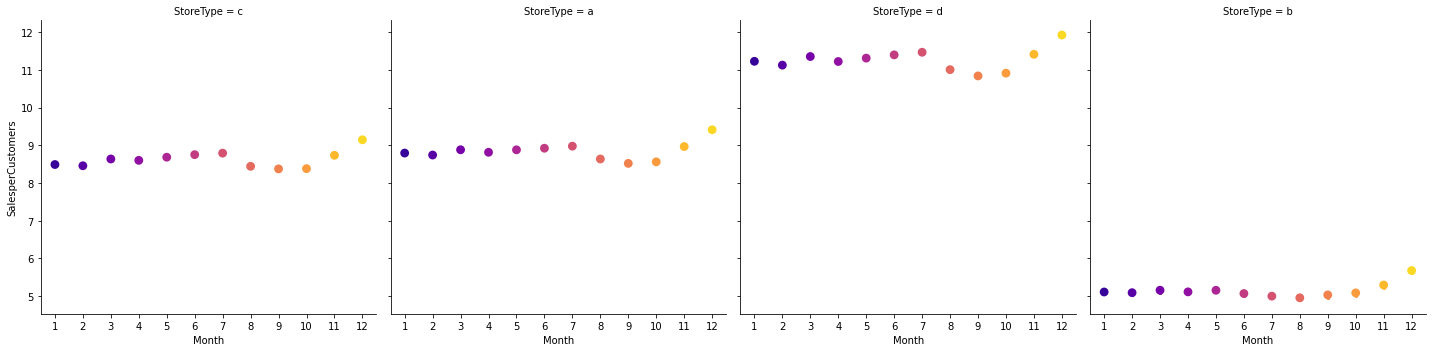

In [52]:
# SalesperCustomers over StoreType
sns.color_palette()
sns.factorplot(data = data, x = 'Month', y = 'SalesperCustomers', col = 'StoreType', color = '#386B7F'
               ,palette = 'plasma')

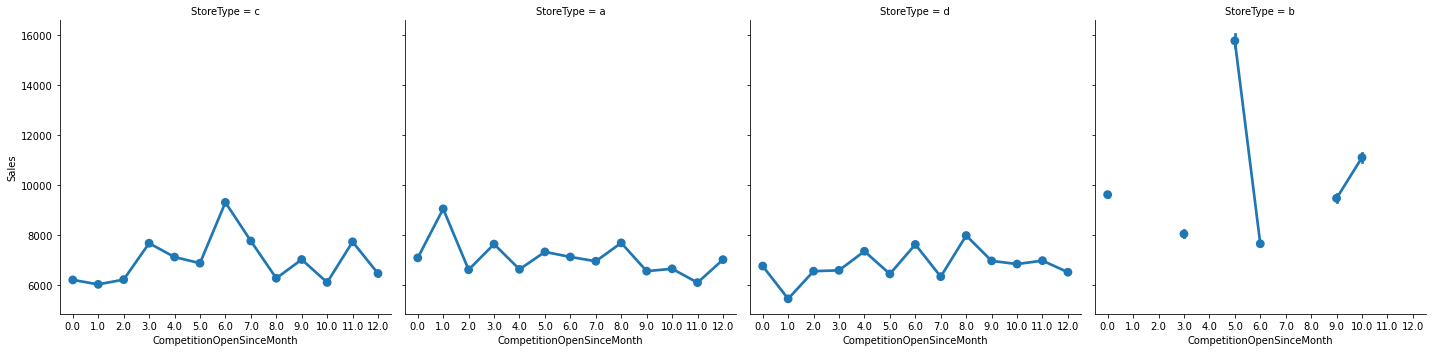

In [53]:
#CompetitionOpenSinceMonth vs Sales
sns.factorplot(data=data,x='CompetitionOpenSinceMonth',y='Sales', col='StoreType')
plt.show()

StoreTypes `c` and `d` are clearly suffering in Sales when a competitior is in close viscinity. StoreType `b` sales drops heavily from May to June

In [54]:
# Finding out the best StoreType
data.groupby('StoreType')['Sales','Customers'].sum()

Sales  Customers
StoreType                       
a          3165334859  363541431
b           159231395   31465616
c           783221426   92129705
d          1765392943  156904995

StoreType `a` and `d` have high Sales and Customer ratio while `b` has the lowest ratio

 ### Effect of Promo variables

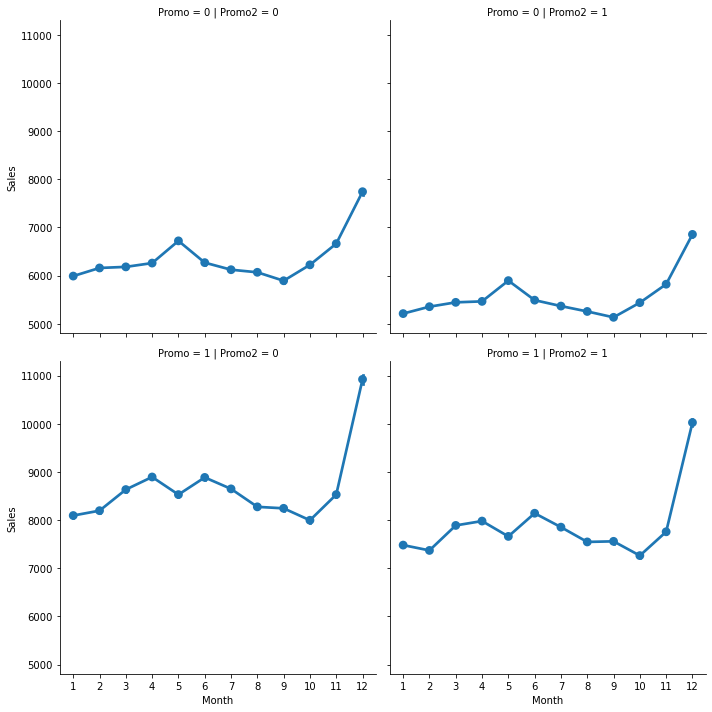

In [55]:
sns.factorplot(data=data,x='Month',y='Sales',row='Promo',col='Promo2')

Sales are generally higher during `Promo = 1` alone, and Sales are lowest during `Promo2`

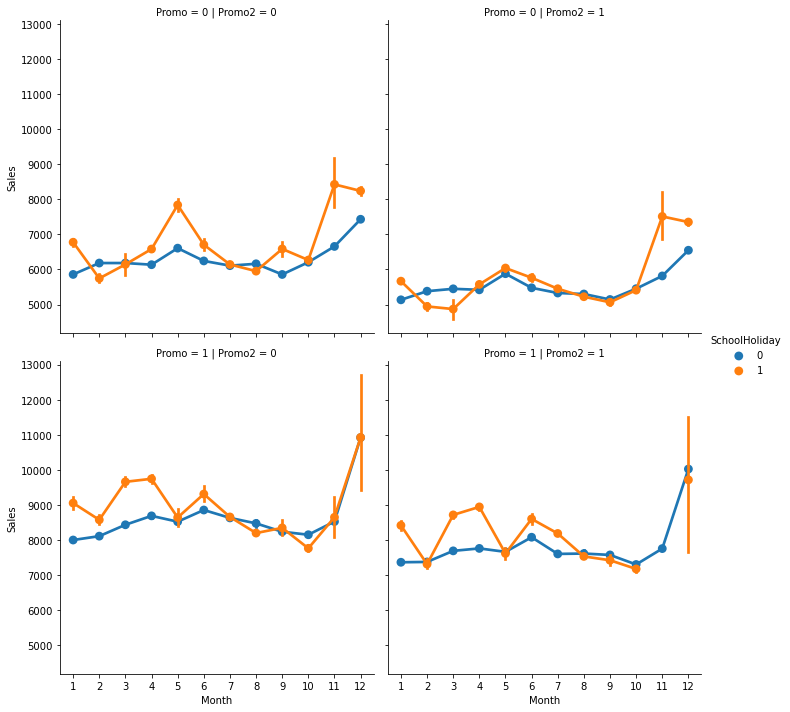

In [56]:
# Adding Schoolholiday
sns.factorplot(data=data,x='Month',y='Sales',row='Promo',col='Promo2', hue='SchoolHoliday')

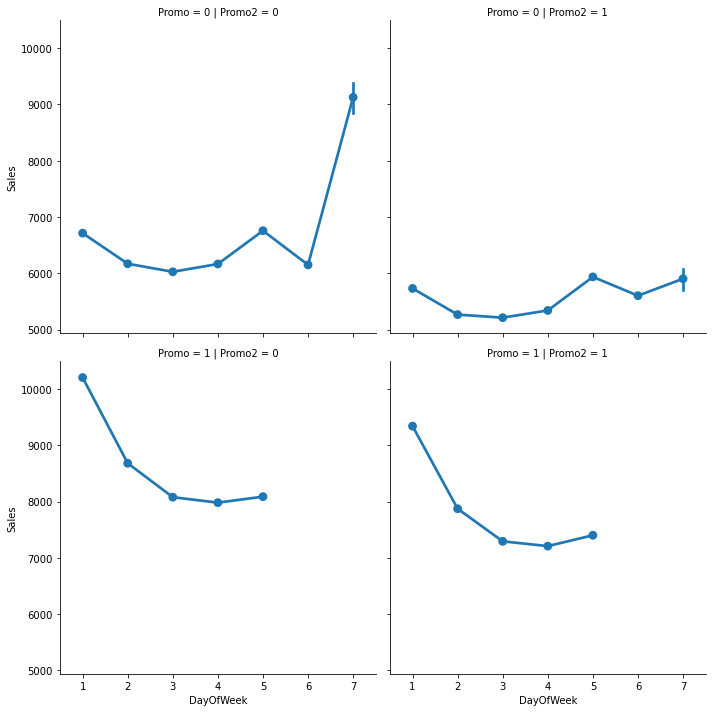

In [57]:
#Day of Week
sns.factorplot(data=data,x='DayOfWeek',y='Sales',row='Promo',col='Promo2')

1. Stores are closed on weekends during Promo and Promo2. 
2. Sales are high during Promo compared to Promo2. 
3. Sales are high on Sunday when there are no promos

In [58]:
# Number of Stores based on StoreType
data.groupby('StoreType')[('Store')].count()

StoreType
a    457042
b     15560
c    112968
d    258768
Name: Store, dtype: int64

# Store Type Analysis

We shall implement VAR for the following store numbers: 1,3,8,9,13,25,29,31 and 46

In [59]:
# Identifying the store type associated with Store = 1
data[data['Store'] ==1]['StoreType'].value_counts()

c    781
Name: StoreType, dtype: int64

### Store 1

In [60]:
# Filtering only Store = 1 data
store_1 = data[data['Store']== 1]
store_1.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2015-07-31      1          5   5263        555     1      1             0   
1 2015-07-30      1          4   5020        546     1      1             0   
2 2015-07-29      1          3   4782        523     1      1             0   
3 2015-07-28      1          2   5011        560     1      1             0   
4 2015-07-27      1          1   6102        612     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      7  ...           9.482883          c           a   
1              1      7  ...           9.194139          c           a   
2              1      7  ...           9.143403          c           a   
3              1      7  ...           8.948214          c           a   
4              1      7  ...           9.970588          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1270.0                       9.0                    2008.0   
1              1270.0                       9.0                    2008.0   
2              1270.0                       9.0                    2008.0   
3              1270.0                       9.0                    2008.0   
4              1270.0                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [61]:
#Shape
store_1.shape

(781, 22)

In [62]:
# reversing whole dataframe to get the data in ascending order
store_1 = store_1[::-1]

In [63]:
store_1 = store_1.reset_index() #Resetting index
store_1 = store_1.drop(columns=['index']) # Dropping the dummy index column
store_1.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02      1          3   5530        668     1      0             0   
1 2013-01-03      1          4   4327        578     1      0             0   
2 2013-01-04      1          5   4486        619     1      0             0   
3 2013-01-05      1          6   4997        635     1      0             0   
4 2013-01-07      1          1   7176        785     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           8.278443          c           a   
1              1      1  ...           7.486159          c           a   
2              1      1  ...           7.247173          c           a   
3              1      1  ...           7.869291          c           a   
4              1      1  ...           9.141401          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1270.0                       9.0                    2008.0   
1              1270.0                       9.0                    2008.0   
2              1270.0                       9.0                    2008.0   
3              1270.0                       9.0                    2008.0   
4              1270.0                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

### Let us clip the values within the desired range of percentile

In [64]:
percentile = store_1['Sales'].quantile([0.02,0.95]).values

In [65]:
print(percentile[0])
print(percentile[1])

3223.6000000000004
6532.0


In [66]:
store_1['Sales'] = np.clip(store_1['Sales'], percentile[0], percentile[1])

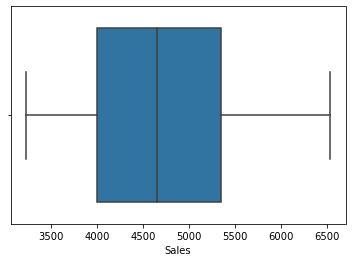

In [67]:
sns.boxplot(store_1['Sales'])

In [68]:
# Let us Standardize the values
from sklearn.preprocessing import StandardScaler

In [69]:
# Initialzing Scaler
scaler = StandardScaler()

In [70]:
# Appying transformation to Sales and Customers
store_1['Sales'] = scaler.fit_transform(store_1['Sales'].values.reshape(-1,1))
store_1['Customers'] = scaler.fit_transform(store_1['Customers'].values.reshape(-1,1))

In [71]:
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen #Johansen Cointegration test

### Let us  decompose Store_1

<Figure size 432x288 with 0 Axes>

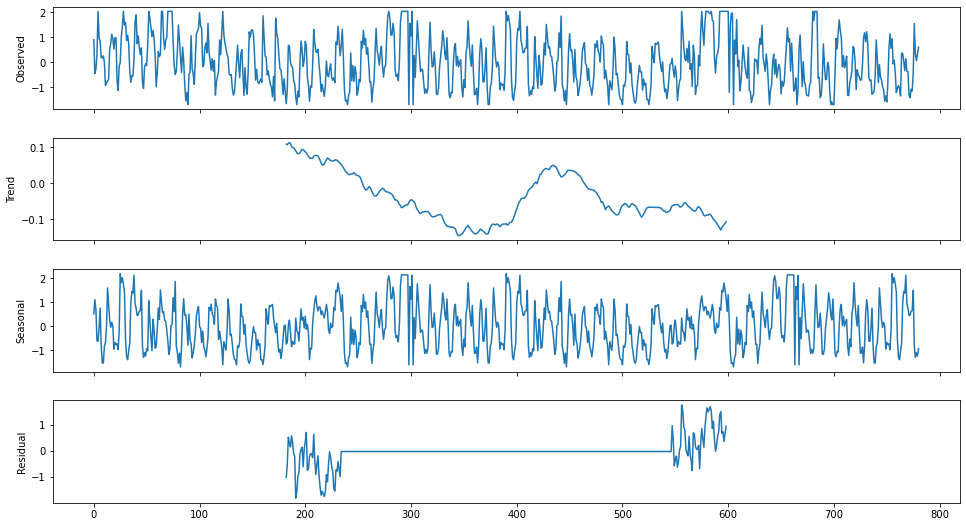

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_1['Sales'], model='additive', freq=365) #freq = 365 days

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

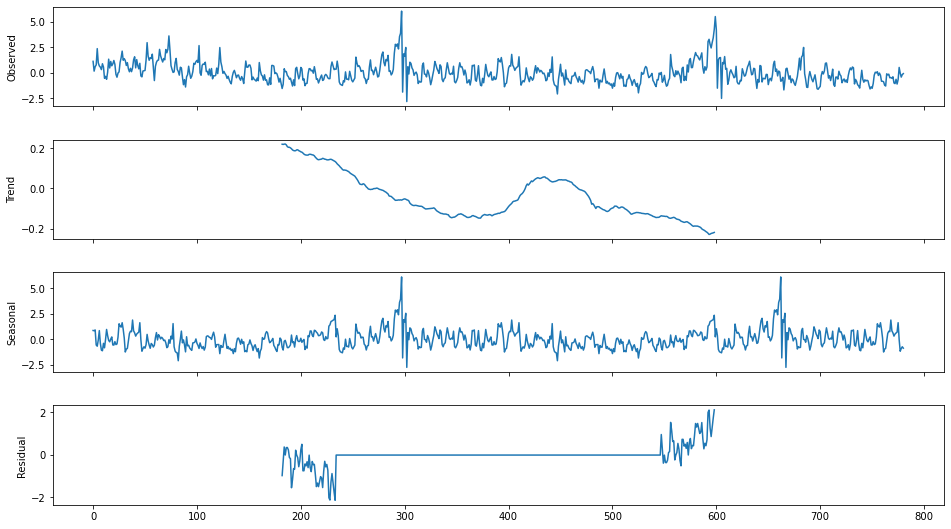

In [73]:
result = seasonal_decompose(store_1['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [75]:
test_stationarity(store_1['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0008. The series is likely stationary.
Test Statistic                  -4.140382
p-value                          0.000830
#Lags Used                      20.000000
Number of Observations Used    760.000000
Critical Value (1%)             -3.438984
Critical Value (5%)             -2.865350
Critical Value (10%)            -2.568799
dtype: float64


In [76]:
test_stationarity(store_1['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0004. The series is likely stationary.
Test Statistic                  -4.320398
p-value                          0.000409
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


## ACF and PACF

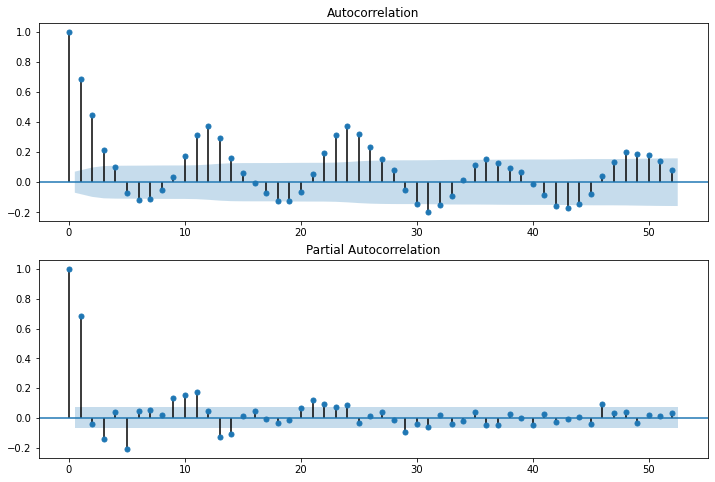

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_1['Sales'], lags=52, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_1['Sales'], lags=52, ax=ax2)

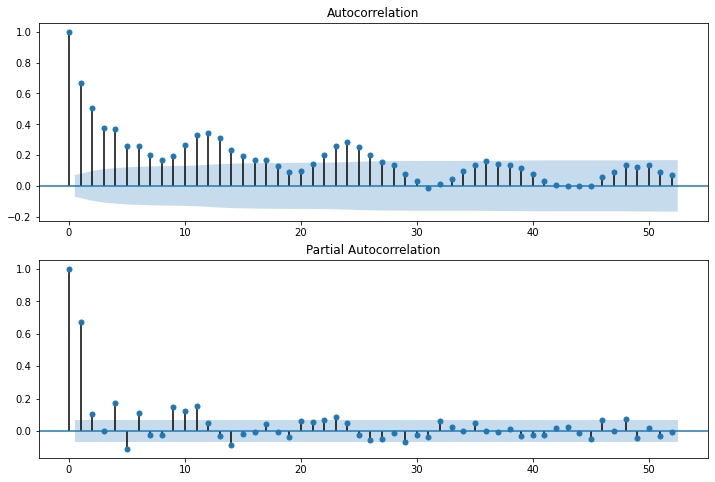

In [78]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_1['Customers'], lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_1['Customers'], lags=52, ax=ax2)

# Applying VAR

In [79]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [80]:
exog = store_1[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_1[['Sales','Customers']], order=(25,0), trend='n')
res = mod.fit(maxiter=2000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  781
Model:                            VAR(25)   Log Likelihood               -1045.145
Date:                    Mon, 12 Apr 2021   AIC                           2296.290
Time:                            14:14:20   BIC                           2776.330
Sample:                                 0   HQIC                          2480.909
                                    - 781                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                19.22, 16.71   Jarque-Bera (JB):       90.17, 4030.55
Prob(Q):                        1.00, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.12, 1.31   Skew:                      -0.06, 0.52
Prob(H) (two-sided):            0.37, 0.03   Kurtosis:                  4.66, 14.08


Sales  Customers
750 -0.897339  -0.970429
751 -0.736050  -0.987417
752 -0.040290  -0.464663
753  0.512762  -0.084038
754  0.672341  -0.128022
..        ...        ...
808 -0.537462  -0.445489
809 -0.513511  -0.384594
810 -0.347178  -0.252323
811 -0.105966  -0.155026
812  0.058688  -0.083237

[63 rows x 2 columns]

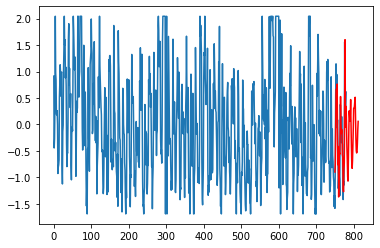

In [81]:
forecast_1 = res.predict(start = 750, end = 812, dynamic= False) # predicting on validation set
plt.plot(store_1['Sales'])
plt.plot(forecast_1['Sales'], c = "red")
forecast_1

In [82]:
# Applying inverse transform
forecast_st_1 = scaler.inverse_transform(forecast_1)

In [83]:
sales_1 = scaler.inverse_transform(store_1['Sales'])

In [84]:
sales_1[750:] #transformed Sales

array([415.77950018, 489.95221964, 614.41869188, 671.26331164,
       617.16582964, 652.56164306, 558.208027  , 572.15503407,
       525.87632877, 450.96399531, 466.49588955, 477.061804  ,
       467.65814014, 438.28489796, 599.30943422, 598.04152448,
       568.98525974, 533.0611506 , 577.96628702, 530.84230857,
       529.68005798, 441.24335401, 431.31139442, 463.5374335 ,
       456.8809074 , 526.4046245 , 710.04021768, 594.766091  ,
       570.57014691, 595.7170233 , 621.39219542])

## MAPE and RMSE

MAPE is given by the below formula

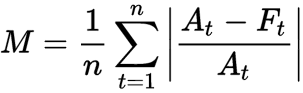


RMSE is written as 

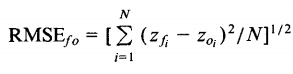

In [454]:
abs_error = np.abs(store_1['Sales'].loc[750:]-forecast_1.Sales[:31])
actual = store_1.Sales[742:]
mape = np.abs(np.round(np.mean(abs_error/actual)*100, 2))

In [455]:
mape

5.79

In [87]:
rmse = np.sqrt(mean_squared_error(store_1.Sales[750:], forecast_1.Sales[:31])).round(2)

In [88]:
rmse

0.52

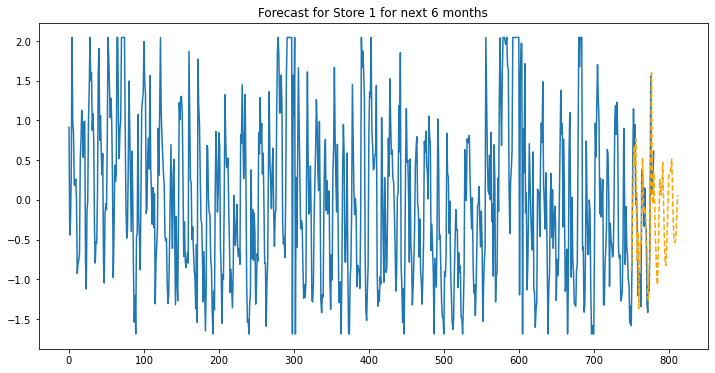

In [89]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 802, dynamic= False)  
plt.plot(store_1['Sales'])
plt.plot(forecast_1['Sales'], c = "orange", linestyle = "dashed")
plt.title("Forecast for Store 1 for next 6 months")
plt.show()

### VARMAX

In [90]:
exog = store_1[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_1[['Sales','Customers']], order=(15,15), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  781
Model:                      VARMAX(15,15)   Log Likelihood                -912.578
Date:                    Mon, 12 Apr 2021   AIC                           2091.157
Time:                            14:45:26   BIC                           2711.013
Sample:                                 0   HQIC                          2329.548
                                    - 781                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                29.09, 17.27   Jarque-Bera (JB):      141.34, 3236.61
Prob(Q):                        0.90, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.11, 1.28   Skew:                      -0.16, 0.44
Prob(H) (two-sided):            0.38, 0.05   Kurtosis:                  5.06, 12.93


Sales  Customers
750 -0.643982  -0.683987
751 -0.553606  -0.721306
752  0.287022  -0.482592
753  0.379207  -0.276708
754  0.461384  -0.229240
755  0.276240  -0.188145
756  0.685320   0.112074
757 -0.193223  -0.289935
758 -0.802735  -0.649543
759 -0.557761  -0.522115
760 -1.017254  -0.889759
761 -0.807561  -0.795373
762 -0.460303  -0.403688
763 -0.507201  -0.550213
764  0.338549  -0.307995
765  0.608109   0.178692
766  0.159529  -0.316643
767 -0.073641  -0.312642
768  0.046459  -0.178798
769 -0.480470  -0.455468
770 -0.827452  -0.615655
771 -0.928986  -0.763799
772 -1.339053  -1.221933
773 -1.153811  -0.990059
774 -0.647938  -0.418056
775 -0.402656  -0.435690
776  0.859502   0.143315
777  1.206385   0.527760
778  0.268748  -0.289712
779  0.043961  -0.347843
780  0.576871   0.061897

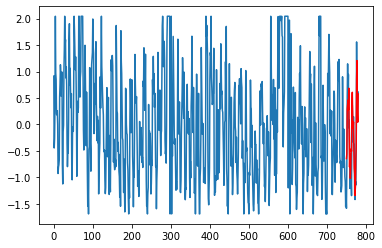

In [91]:
forecast = res.predict(start = 750, end = 780, dynamic= False)   # predicting on validation set
plt.plot(store_1['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [92]:
forecast_st = scaler.inverse_transform(forecast)
sales = scaler.inverse_transform(store_1['Sales'])

### Calculating MAPE and RMSE

In [460]:
abs_error = np.abs(store_1['Sales'].loc[750:]-forecast.Sales[:31])
actual = store_1.Sales[742:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [95]:
rmse = np.sqrt(mean_squared_error(store_1.Sales[750:], forecast.Sales[:31])).round(2)

In [96]:
rmse

0.46

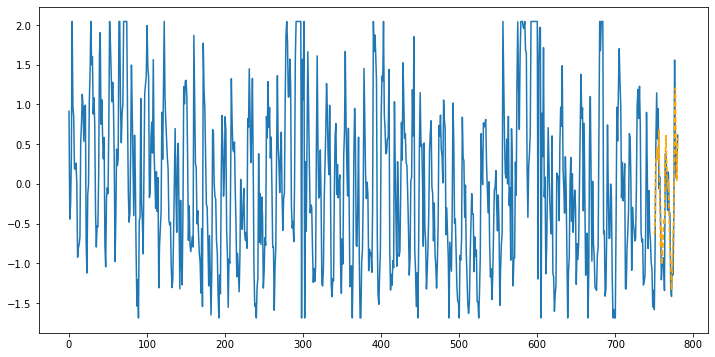

In [97]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 780, dynamic= False)  
plt.plot(store_1['Sales'])
plt.plot(forecast['Sales'], c = "orange", linestyle = "dashed")

# Cointegration Test

In [98]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [99]:
joh_model1 = coint_johansen(store_1[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat  trace_stat
0    160.699373  257.487364
1     96.787991   96.787991 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [491]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_1[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

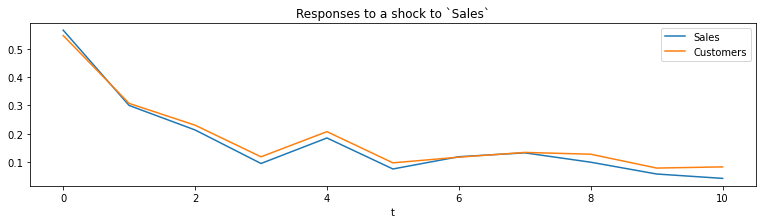

In [100]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 3

In [101]:
# Identifying the store type associated with Store = 3
data[data['Store'] ==3]['StoreType'].value_counts()

a    779
Name: StoreType, dtype: int64

### Store 3

In [102]:
# Filtering only Store = 1 data
store_3 = data[data['Store']== 3]
store_3.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
1565 2015-07-31      3          5   8314        821     1      1   
1566 2015-07-30      3          4   8977        823     1      1   
1567 2015-07-29      3          3   7610        716     1      1   
1568 2015-07-28      3          2   8864        818     1      1   
1569 2015-07-27      3          1   8107        768     1      1   

      StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
1565             0              1      7  ...          10.126675          a   
1566             0              1      7  ...          10.907655          a   
1567             0              1      7  ...          10.628492          a   
1568             0              1      7  ...          10.836186          a   
1569             0              1      7  ...          10.555990          a   

      Assortment CompetitionDistance CompetitionOpenSinceMonth  \
1565           a             14130.0                      12.0   
1566           a             14130.0                      12.0   
1567           a             14130.0                      12.0   
1568           a             14130.0                      12.0   
1569           a             14130.0                      12.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1565                    2006.0       1             14.0           2011.0   
1566                    2006.0       1             14.0           2011.0   
1567                    2006.0       1             14.0           2011.0   
1568                    2006.0       1             14.0           2011.0   
1569                    2006.0       1             14.0           2011.0   

      PromoInterval  
1565              2  
1566              2  
1567              2  
1568              2  
1569              2  

[5 rows x 22 columns]

In [103]:
store_3.shape

(779, 22)

In [104]:
# reversing whole dataframe to get the data in ascending order
store_3 = store_3[::-1]

In [105]:
store_3 = store_3.reset_index()
store_3 = store_3.drop(columns=['index'])
store_3.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02      3          3   6823        805     1      0             0   
1 2013-01-03      3          4   5902        721     1      0             0   
2 2013-01-04      3          5   6069        690     1      0             0   
3 2013-01-05      3          6   4523        525     1      0             0   
4 2013-01-07      3          1  12247       1079     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           8.475776          a           a   
1              1      1  ...           8.185853          a           a   
2              1      1  ...           8.795652          a           a   
3              0      1  ...           8.615238          a           a   
4              0      1  ...          11.350324          a           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0             14130.0                      12.0                    2006.0   
1             14130.0                      12.0                    2006.0   
2             14130.0                      12.0                    2006.0   
3             14130.0                      12.0                    2006.0   
4             14130.0                      12.0                    2006.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       1             14.0           2011.0              2  
1       1             14.0           2011.0              2  
2       1             14.0           2011.0              2  
3       1             14.0           2011.0              2  
4       1             14.0           2011.0              2  

[5 rows x 22 columns]

In [106]:
# Clip the outliers
percentile = store_3['Sales'].quantile([0,0.95]).values

In [107]:
print(percentile[0])
print(percentile[1])

2936.0
10795.499999999996


In [108]:
store_3['Sales'] = np.clip(store_3['Sales'], percentile[0], percentile[1]) #clipping outliers based on percentile values

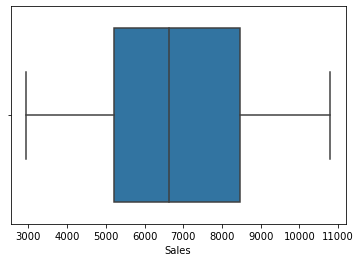

In [109]:
# Plotting simple boxplot
sns.boxplot(store_3['Sales'])

In [110]:
# Applying Standard Scaler
store_3['Sales'] = scaler.fit_transform(store_3['Sales'].values.reshape(-1,1))
store_3['Customers'] = scaler.fit_transform(store_3['Customers'].values.reshape(-1,1))

### Let us  decompose Store_3

<Figure size 432x288 with 0 Axes>

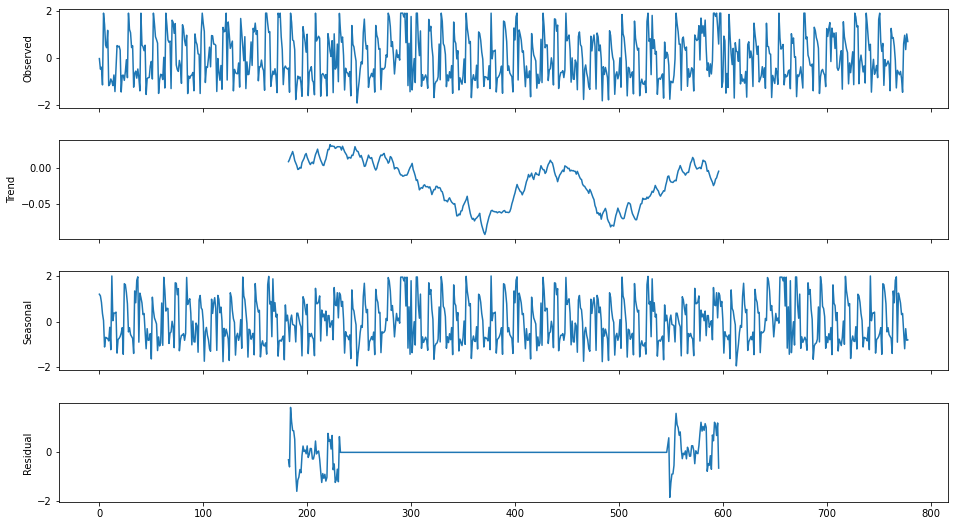

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_3['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

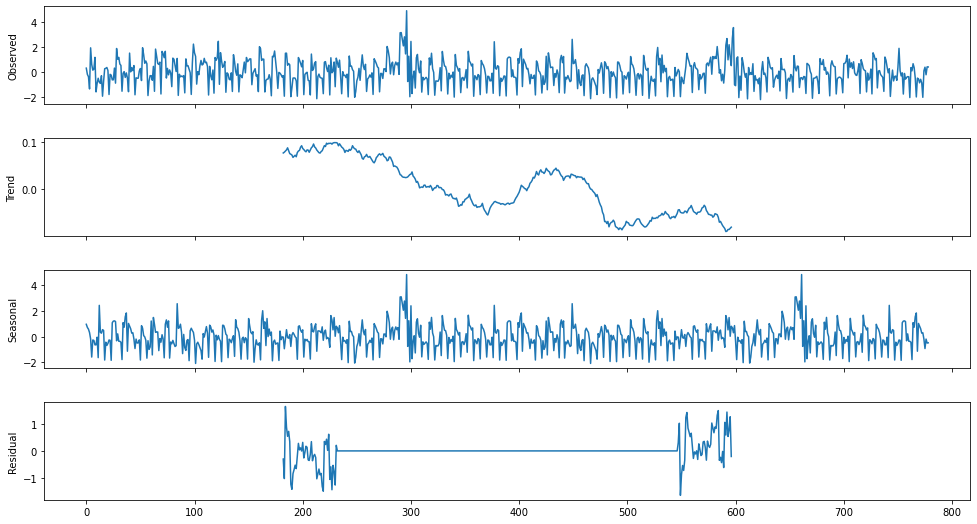

In [112]:
result = seasonal_decompose(store_3['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

### Stationarity Test

In [113]:
test_stationarity(store_3['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.865949e+00
p-value                        1.559050e-09
#Lags Used                     1.300000e+01
Number of Observations Used    7.650000e+02
Critical Value (1%)           -3.438927e+00
Critical Value (5%)           -2.865325e+00
Critical Value (10%)          -2.568786e+00
dtype: float64


In [114]:
test_stationarity(store_3['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.638439
p-value                          0.000001
#Lags Used                      19.000000
Number of Observations Used    759.000000
Critical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802
dtype: float64


## ACF and PACF

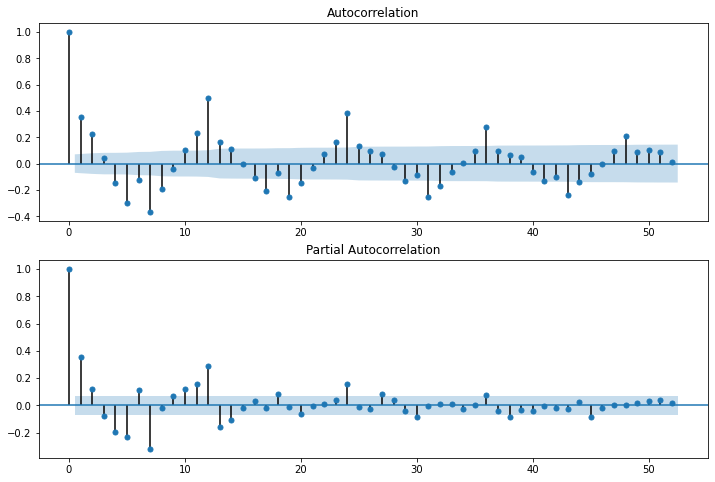

In [115]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_3['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_3['Sales'], lags=52, ax=ax2)# 

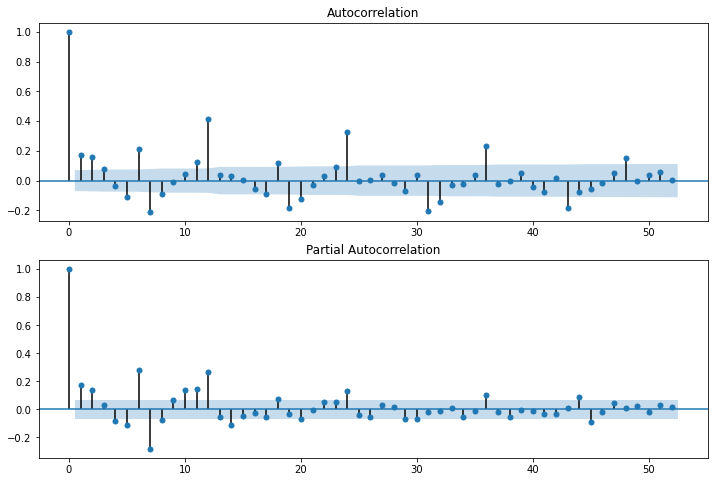

In [116]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_3['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_3['Customers'], lags=52, ax=ax2)# 

# Applying VAR

In [117]:
exog = store_3[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_3[['Sales','Customers']], order=(20,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  779
Model:                            VAR(20)   Log Likelihood                -894.436
Date:                    Mon, 12 Apr 2021   AIC                           1954.872
Time:                            14:50:22   BIC                           2341.487
Sample:                                 0   HQIC                          2103.578
                                    - 779                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                34.58, 24.24   Jarque-Bera (JB):      104.63, 1392.50
Prob(Q):                        0.71, 0.98   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.27, 1.54   Skew:                       0.48, 0.62
Prob(H) (two-sided):            0.05, 0.00   Kurtosis:                   4.52, 9.43


In [118]:
store_3.index

RangeIndex(start=0, stop=779, step=1)

Sales  Customers
750  0.608892   0.404474
751  1.827687   1.382707
752  0.481892   0.224096
753  0.835996   0.708708
754  0.665570   0.163351
..        ...        ...
817 -0.090958  -0.010513
818 -0.314465  -0.268108
819 -0.137042  -0.077465
820 -0.139818  -0.127446
821 -0.120096  -0.157664

[72 rows x 2 columns]

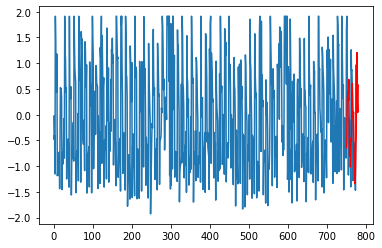

In [119]:
# Predicting the forecast for next 6 weeks
forecast_3 = res.predict(start = 750, end = 821, dynamic= False)   # predicting on validation set
plt.plot(store_3['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast_3

In [120]:
forecast_st = scaler.inverse_transform(forecast_3)
sales = scaler.inverse_transform(store_3['Sales'])

### MAPE and RMSE

In [462]:
abs_error = np.abs(store_3['Sales'].loc[750:]-forecast_3.Sales)
actual = store_3.Sales[742:]
mape = np.abs(np.round(np.mean(abs_error/actual)*100, 2))

In [463]:
mape

32.81

In [123]:
rmse = np.sqrt(mean_squared_error(store_3.Sales[750:], forecast_3.Sales[:29])).round(2)

In [124]:
rmse

0.4

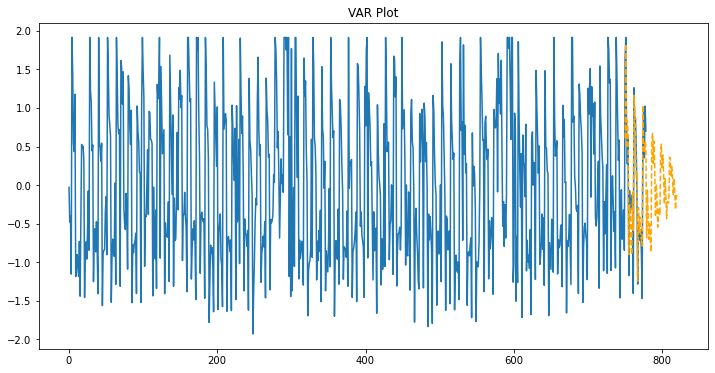

In [125]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 821, dynamic= False)  
plt.plot(store_3['Sales'])
plt.plot(forecast['Sales'], c = "orange", linestyle = "dashed")
plt.title("VAR Plot")
plt.show()

### VARMAX

In [126]:
exog = store_3[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_3[['Sales','Customers']], order=(12,12), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  779
Model:                      VARMAX(12,12)   Log Likelihood                -441.376
Date:                    Mon, 12 Apr 2021   AIC                           1100.751
Time:                            15:14:33   BIC                           1608.474
Sample:                                 0   HQIC                          1296.040
                                    - 779                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                30.83, 31.96   Jarque-Bera (JB):       101.46, 538.78
Prob(Q):                        0.85, 0.81   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.32, 1.31   Skew:                       0.40, 0.36
Prob(H) (two-sided):            0.03, 0.03   Kurtosis:                   4.57, 7.01


Sales  Customers
740  0.852205   0.463859
741  0.714661   0.511334
742  0.605740   0.205482
743 -1.155827  -1.455129
744 -0.849136  -0.812645
745 -0.725128  -0.633813
746 -0.642655  -0.572104
747 -0.517893  -0.356931
748 -0.520830  -0.533685
749 -0.948594  -1.284162
750  1.397382   1.024569
751  1.541075   1.101189
752  0.965098   0.703536
753  0.940895   0.897139
754  0.611812   0.079561
755 -1.109412  -1.387020
756 -0.634124  -0.717542
757 -0.360494  -0.115994
758 -0.449225  -0.494824
759 -0.365829  -0.324499
760 -0.237052  -0.486043
761 -1.076134  -1.544626
762  1.488239   1.018589
763  1.059267   0.546307
764  0.858911   0.429923
765  0.417906   0.208423
766  0.551033   0.286904
767 -1.618744  -2.002926
768 -0.371713  -0.263576
769 -0.597915  -0.474854
770 -0.617116  -0.525144
771 -0.611712  -0.541318
772 -0.535986  -0.549722
773 -1.324389  -1.755156
774  1.440729   1.068363
775  0.804385   0.422589
776  0.680373   0.333639
777  0.405209   0.122956
778  0.804964   0.556749

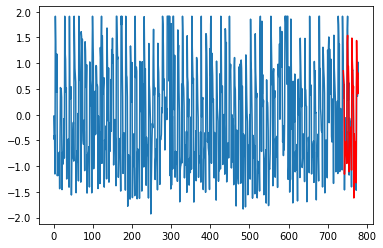

In [127]:
forecast = res.predict(start = 740, end = 778, dynamic= False)   # predicting on validation set
plt.plot(store_3['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [128]:
forecast_st = scaler.inverse_transform(forecast)
sales = scaler.inverse_transform(store_3['Sales'])

### MAPE and RMSE

In [131]:
rmse = np.sqrt(mean_squared_error(store_3.Sales[742:], forecast.Sales[:37])).round(2)

In [132]:
rmse

1.17

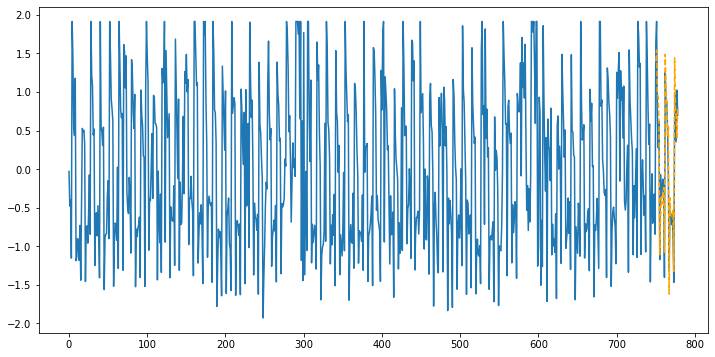

In [133]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 778, dynamic= False)  
plt.plot(store_3['Sales'])
plt.plot(forecast['Sales'], c = "orange", linestyle = "dashed")

# Cointegration Test

In [134]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [135]:
joh_model3 = coint_johansen(store_3[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model3)

   max_eig_stat  trace_stat
0    232.624765  384.641319
1    152.016554  152.016554 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [492]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_3[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

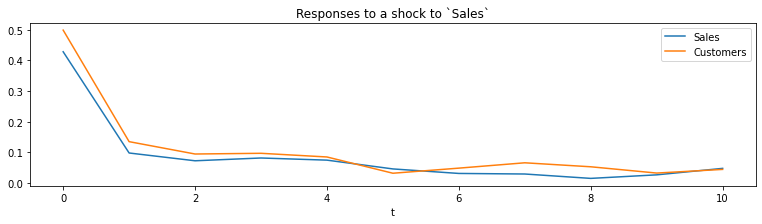

In [136]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 8

In [137]:
# Filtering only Store = 1 data
store_8 = data[data['Store']== 8]
store_8.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
5473 2015-07-31      8          5   8492        833     1      1   
5474 2015-07-30      8          4   8420        882     1      1   
5475 2015-07-29      8          3   7029        698     1      1   
5476 2015-07-28      8          2   6717        695     1      1   
5477 2015-07-27      8          1   8739        841     1      1   

      StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
5473             0              1      7  ...          10.194478          a   
5474             0              1      7  ...           9.546485          a   
5475             0              1      7  ...          10.070201          a   
5476             0              1      7  ...           9.664748          a   
5477             0              1      7  ...          10.391201          a   

      Assortment CompetitionDistance CompetitionOpenSinceMonth  \
5473           a              7520.0                      10.0   
5474           a              7520.0                      10.0   
5475           a              7520.0                      10.0   
5476           a              7520.0                      10.0   
5477           a              7520.0                      10.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
5473                    2014.0       0              0.0              0.0   
5474                    2014.0       0              0.0              0.0   
5475                    2014.0       0              0.0              0.0   
5476                    2014.0       0              0.0              0.0   
5477                    2014.0       0              0.0              0.0   

      PromoInterval  
5473              0  
5474              0  
5475              0  
5476              0  
5477              0  

[5 rows x 22 columns]

In [138]:
store_8.shape

(784, 22)

In [139]:
# reversing whole dataframe to get the data in ascending order
store_8 = store_8[::-1]

In [140]:
store_8 = store_8.reset_index()
store_8 = store_8.drop(columns=['index'])
store_8.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02      8          3   5419        698     1      0             0   
1 2013-01-03      8          4   4842        662     1      0             0   
2 2013-01-04      8          5   4059        517     1      0             0   
3 2013-01-05      8          6   2337        312     1      0             0   
4 2013-01-07      8          1   7416        802     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           7.763610          a           a   
1              1      1  ...           7.314199          a           a   
2              1      1  ...           7.851064          a           a   
3              0      1  ...           7.490385          a           a   
4              0      1  ...           9.246883          a           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              7520.0                      10.0                    2014.0   
1              7520.0                      10.0                    2014.0   
2              7520.0                      10.0                    2014.0   
3              7520.0                      10.0                    2014.0   
4              7520.0                      10.0                    2014.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [141]:
percentile = store_8['Sales'].quantile([0,0.99]).values #clipping outliers

In [142]:
print(percentile[0])
print(percentile[1])

1725.0
9997.13999999999


In [143]:
store_8['Sales'] = np.clip(store_8['Sales'], percentile[0], percentile[1])

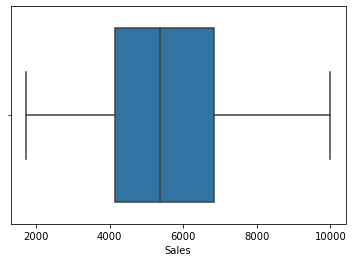

In [144]:
sns.boxplot(store_8['Sales'])

In [145]:
# Applying Standard Scaler
store_8['Sales'] = scaler.fit_transform(store_8['Sales'].values.reshape(-1,1))
store_8['Customers'] = scaler.fit_transform(store_8['Customers'].values.reshape(-1,1))

### Let us  decompose Store_8

<Figure size 432x288 with 0 Axes>

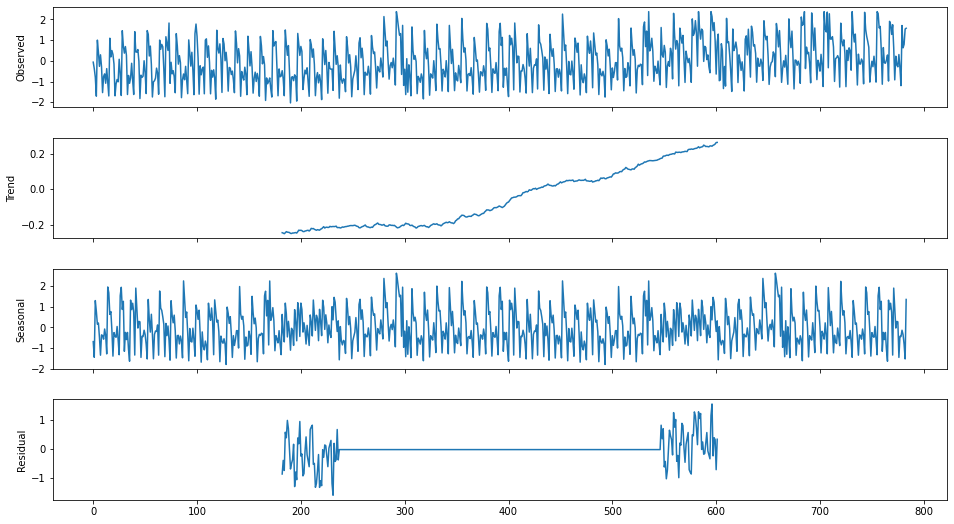

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_8['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

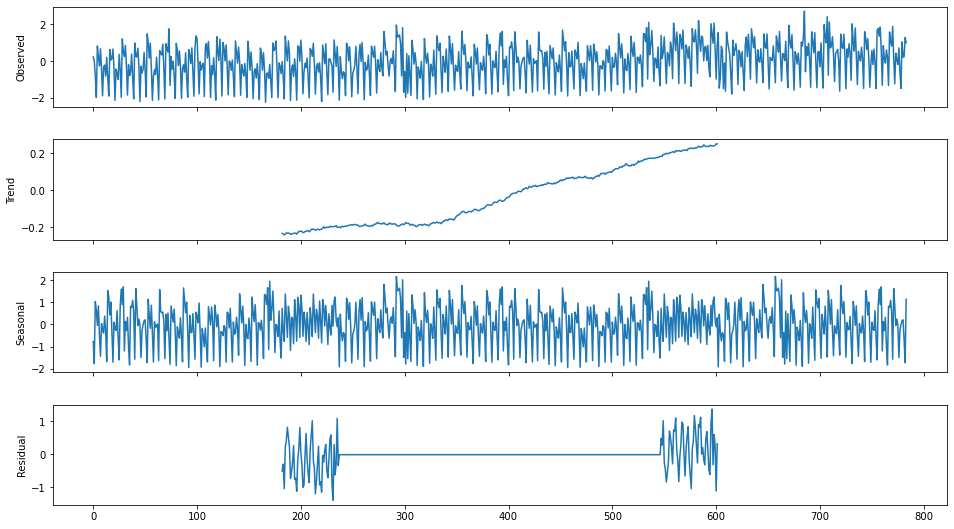

In [147]:
result = seasonal_decompose(store_8['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [148]:
test_stationarity(store_8['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0232. The series is likely non-stationary.
Test Statistic                  -3.147238
p-value                          0.023249
#Lags Used                      18.000000
Number of Observations Used    765.000000
Critical Value (1%)             -3.438927
Critical Value (5%)             -2.865325
Critical Value (10%)            -2.568786
dtype: float64


In [149]:
test_stationarity(store_8['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0268. The series is likely non-stationary.
Test Statistic                  -3.096580
p-value                          0.026807
#Lags Used                      18.000000
Number of Observations Used    765.000000
Critical Value (1%)             -3.438927
Critical Value (5%)             -2.865325
Critical Value (10%)            -2.568786
dtype: float64


In [150]:
# Performing first difference to make it stationary
store_8['Sales_diff'] = store_8['Sales'] - store_8['Sales'].shift(1)
store_8['Sales_diff'] = store_8['Sales_diff'].dropna(inplace = False)

In [151]:
store_8['Sales_diff'].dropna(inplace=True)

In [152]:
test_stationarity(store_8['Sales_diff'])#.iloc[1:])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.064012e+01
p-value                        4.954872e-19
#Lags Used                     2.000000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


In [153]:
# Performing first difference to make it stationary
store_8['Customers_diff'] = store_8['Customers'] - store_8['Customers'].shift(1)
store_8['Customers_diff'] = store_8['Customers_diff'].dropna(inplace = False)

In [154]:
store_8['Customers_diff'].dropna(inplace=True)

In [155]:
test_stationarity(store_8['Customers_diff'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.048677e+01
p-value                        1.174853e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


In [156]:
store_8['Sales_diff']

0           NaN
1     -0.307394
2     -0.417139
3     -0.917386
4      2.705811
         ...   
779    2.903992
780   -1.077210
781    0.166216
782    0.741048
783    0.038358
Name: Sales_diff, Length: 784, dtype: float64

## ACF and PACF

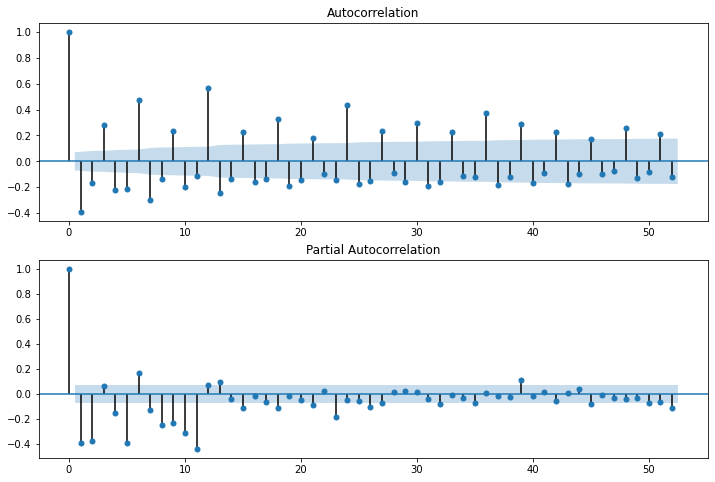

In [157]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_8['Sales_diff'].iloc[1:], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_8['Sales_diff'].iloc[1:], lags=52, ax=ax2)# , lags=40

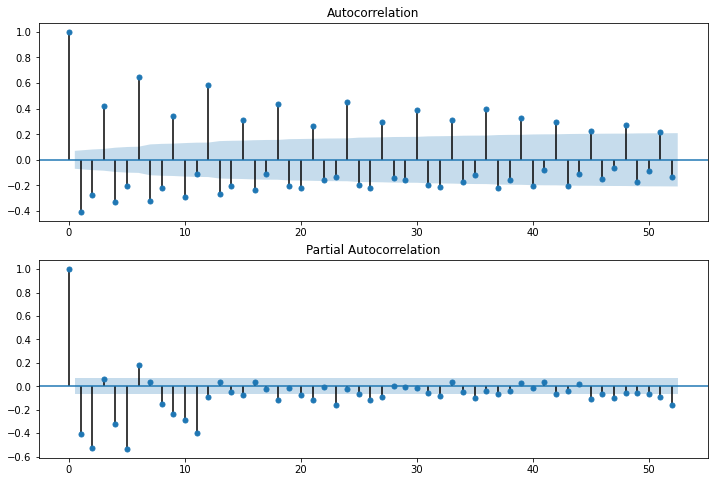

In [158]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_8['Customers_diff'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_8['Customers_diff'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [159]:
exog = store_8[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_8[['Sales_diff','Customers_diff']], order=(25,0), trend='n')
res = mod.fit(maxiter=1500, disp=False)
print(res.summary())

                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  784
Model:                                      VAR(25)   Log Likelihood                -579.903
Date:                              Mon, 12 Apr 2021   AIC                           1365.806
Time:                                      15:30:58   BIC                           1846.240
Sample:                                           0   HQIC                          1550.543
                                              - 784                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):        259.07, 63.49
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.46, 1.37   Skew:                      0.27, -0.05
Prob

In [160]:
store_8.index

RangeIndex(start=0, stop=784, step=1)

Sales_diff  Customers_diff
750    0.293424        0.397381
751   -0.818216       -1.210206
752    0.136472        0.392866
753   -0.179481       -0.615003
754   -0.706148       -1.237319
..          ...             ...
822   -0.409318       -0.373190
823   -0.369796       -0.453872
824    0.086473        0.236874
825   -0.013857       -0.125958
826   -0.302970       -0.361883

[77 rows x 2 columns]

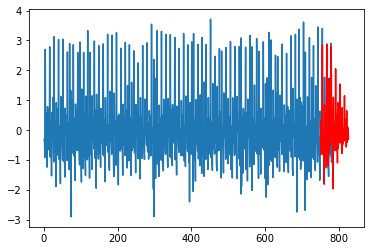

In [161]:
forecast_8 = res.predict(start = 750, end = 826, dynamic= False)   # predicting on validation set
plt.plot(store_8['Sales_diff'])
plt.plot(forecast_8['Sales_diff'], c = "red")
forecast_8

In [162]:
forecast_st = scaler.inverse_transform(forecast_8)

In [163]:
forecast_st

array([[ 709.57764399,  727.78102241],
       [ 514.92426455,  446.28501706],
       [ 682.09460274,  726.99034114],
       [ 626.76972511,  550.50789382],
       [ 534.54795941,  441.53748808],
       [1156.4850223 , 1143.61599411],
       [ 608.56940518,  667.13233351],
       [ 515.98874096,  539.07320314],
       [ 617.78985985,  694.10258703],
       [ 486.25294731,  417.92924227],
       [ 340.57965594,  290.57948415],
       [ 806.63912403,  892.163214  ],
       [ 579.73066419,  594.52805962],
       [ 701.98088624,  688.34759046],
       [ 749.08439517,  804.66216139],
       [ 659.34724368,  561.56171468],
       [ 436.1493616 ,  396.23830945],
       [1160.74747778, 1176.04624039],
       [ 549.80731345,  559.49333556],
       [ 579.31740935,  627.17665398],
       [ 758.51734484,  835.77184071],
       [ 450.99779709,  402.88247332],
       [ 506.78076184,  532.08329419],
       [ 961.11963456, 1038.91386481],
       [ 523.14259178,  527.84641748],
       [ 618.63648631,  5

In [164]:
sales = scaler.inverse_transform(store_8['Sales_diff'])

In [165]:
sales[750:]

array([ 723.96438296,  611.9278137 ,  746.91275601,  570.50879892,
        527.13077668, 1253.93560284,  643.16558687,  535.71309506,
        670.79132344,  460.15137891,  367.425026  ,  968.09402638,
        529.92935876,  654.1864031 ,  684.31780349,  701.57572632,
        438.04258048, 1162.87533913,  632.82389323,  573.02752279,
        739.91630081,  464.16267989,  386.268812  ,  858.10975064,
        584.68828145,  642.15250016,  762.02509924,  547.00070945,
        506.23469715, 1166.70006797,  469.57327191,  687.30295771,
        787.95862651,  664.91430107])

### MAPE and RMSE

In [166]:
abs_error = np.abs(store_8['Sales_diff'].loc[750:]-forecast_8.Sales_diff)
actual = store_8.Sales_diff[750:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [167]:
mape

15.78

In [168]:
rmse = np.sqrt(mean_squared_error(store_8.Sales_diff[750:], forecast_8.Sales_diff[:34])).round(2)

In [169]:
rmse

0.42

In [170]:
_ = store_8['Sales'].iloc[-1] + store_8['Sales_diff'].cumsum()

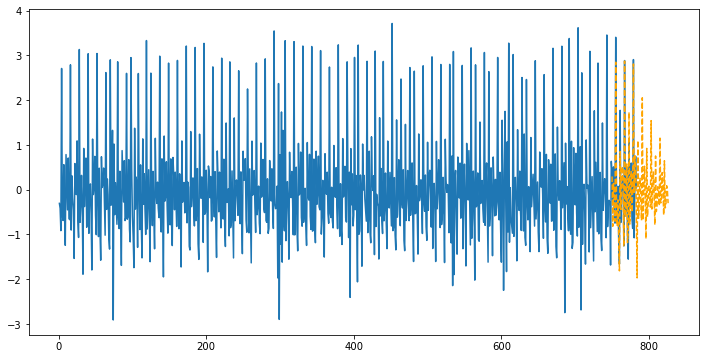

In [171]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 824, dynamic= False)  
plt.plot(store_8['Sales_diff'])
plt.plot(forecast_8['Sales_diff'], c = "orange", linestyle = "dashed")

### VARMAX

In [172]:
exog = store_8[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_8[['Sales_diff','Customers_diff']], order=(12,12), trend='n', exog=exog) #using differenced series
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  784
Model:                                VARMAX(12,12)   Log Likelihood                -602.115
Date:                              Mon, 12 Apr 2021   AIC                           1422.229
Time:                                      15:53:33   BIC                           1930.650
Sample:                                           0   HQIC                          1617.727
                                              - 784                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):        374.71, 37.99
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.57, 1.30   Skew:                       0.37, 0.05
Prob

Sales_diff  Customers_diff
750    0.322171        0.427218
751   -0.661860       -1.031504
752    0.373307        0.556260
753   -0.125814       -0.628356
754   -0.475158       -1.056556
755    2.812143        2.746909
756   -0.191603        0.129654
757   -0.731055       -0.651953
758   -0.309456        0.044675
759   -1.023653       -1.488170
760   -1.734950       -2.010025
761    0.900774        1.315057
762   -0.416648       -0.368622
763    0.248846        0.091891
764    0.889781        1.114559
765    0.171742       -0.488824
766   -0.738285       -1.064009
767    2.841035        2.784736
768   -0.317320       -0.395194
769   -0.176411        0.078621
770    0.677507        1.133226
771   -1.193843       -1.504233
772   -1.072157       -0.887536
773    1.619088        2.154239
774   -0.783003       -0.756009
775   -0.151204       -0.285297
776    0.656112        0.940287
777   -0.353589       -0.931328
778    0.193801       -0.034891
779    2.910133        2.873270
780   -0.147186        0.012449
781    0.738681        0.913331
782    0.572665        1.238630
783   -0.785775       -0.877372

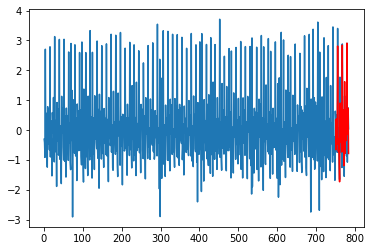

In [173]:
forecast = res.predict(start = 750, end = 783, dynamic= False)   # predicting on validation set
plt.plot(store_8['Sales_diff'])
plt.plot(forecast['Sales_diff'], c = "red")
forecast

In [174]:
forecast_st = scaler.inverse_transform(forecast)

In [175]:
forecast_st

array([[ 714.61132362,  733.00548219],
       [ 542.30296073,  477.57649372],
       [ 723.56544373,  755.60148558],
       [ 636.16708053,  548.16967264],
       [ 574.99528172,  473.18978744],
       [1150.61691122, 1139.19416529],
       [ 624.64705531,  680.9008042 ],
       [ 530.18654973,  544.0376666 ],
       [ 604.01051143,  666.02048189],
       [ 478.95139507,  397.61221636],
       [ 354.39997787,  306.23309239],
       [ 815.92734741,  888.47024621],
       [ 585.24064757,  593.65026189],
       [ 701.77174185,  674.28819051],
       [ 814.00243699,  853.36222802],
       [ 688.27050354,  572.60234456],
       [ 528.92066996,  471.88473855],
       [1155.67604142, 1145.81779333],
       [ 602.63347047,  588.99744399],
       [ 627.30733425,  671.96468364],
       [ 776.83230558,  856.63082247],
       [ 449.15031182,  394.79949757],
       [ 470.45807133,  502.78609274],
       [ 941.70758251, 1035.41500583],
       [ 521.09027419,  525.81698996],
       [ 631.72119864,  6

In [176]:
abs_error = np.abs(store_8['Sales_diff'].loc[750:]-forecast.Sales_diff)
actual = store_8.Sales_diff[750:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [177]:
mape

43.51

In [178]:
rmse = np.sqrt(mean_squared_error(store_8.Sales_diff[750:], forecast.Sales_diff[:34])).round(2)

In [179]:
rmse

0.44

# Cointegration Test

In [180]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [181]:
joh_model8 = coint_johansen(store_8[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model8)

   max_eig_stat  trace_stat
0    623.430825  777.133612
1    153.702787  153.702787 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [495]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_8[['Sales','Customers']],-1,1, method="trace").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

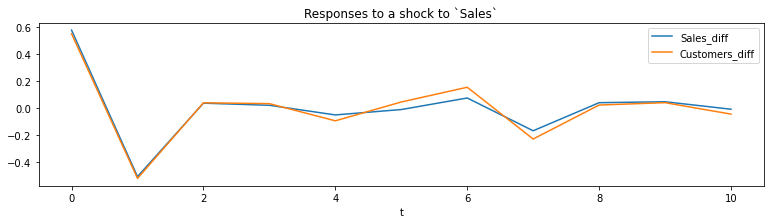

In [182]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 9

In [183]:
# Filtering only Store = 1 data
store_9 = data[data['Store']== 9]
store_9.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
6257 2015-07-31      9          5   8565        687     1      1   
6258 2015-07-30      9          4   7539        651     1      1   
6259 2015-07-29      9          3   7776        625     1      1   
6260 2015-07-28      9          2   8751        678     1      1   
6261 2015-07-27      9          1  10649        777     1      1   

      StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
6257             0              1      7  ...          12.467249          a   
6258             0              1      7  ...          11.580645          a   
6259             0              1      7  ...          12.441600          a   
6260             0              1      7  ...          12.907080          a   
6261             0              1      7  ...          13.705277          a   

      Assortment CompetitionDistance CompetitionOpenSinceMonth  \
6257           c              2030.0                       8.0   
6258           c              2030.0                       8.0   
6259           c              2030.0                       8.0   
6260           c              2030.0                       8.0   
6261           c              2030.0                       8.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
6257                    2000.0       0              0.0              0.0   
6258                    2000.0       0              0.0              0.0   
6259                    2000.0       0              0.0              0.0   
6260                    2000.0       0              0.0              0.0   
6261                    2000.0       0              0.0              0.0   

      PromoInterval  
6257              0  
6258              0  
6259              0  
6260              0  
6261              0  

[5 rows x 22 columns]

In [184]:
store_9.shape

(779, 22)

In [185]:
# reversing whole dataframe to get the data in ascending order
store_9 = store_9[::-1]

In [186]:
store_9 = store_9.reset_index()
store_9 = store_9.drop(columns=['index'])
store_9.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02      9          3   4903        481     1      0             0   
1 2013-01-03      9          4   4602        453     1      0             0   
2 2013-01-04      9          5   4798        497     1      0             0   
3 2013-01-05      9          6   4254        450     1      0             0   
4 2013-01-07      9          1   7574        605     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...          10.193347          a           c   
1              1      1  ...          10.158940          a           c   
2              1      1  ...           9.653924          a           c   
3              0      1  ...           9.453333          a           c   
4              0      1  ...          12.519008          a           c   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              2030.0                       8.0                    2000.0   
1              2030.0                       8.0                    2000.0   
2              2030.0                       8.0                    2000.0   
3              2030.0                       8.0                    2000.0   
4              2030.0                       8.0                    2000.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [187]:
percentile = store_9['Sales'].quantile([0,0.95]).values

In [188]:
print(percentile[0])
print(percentile[1])

2724.0
9757.199999999997


In [189]:
store_9['Sales'] = np.clip(store_9['Sales'], percentile[0], percentile[1])

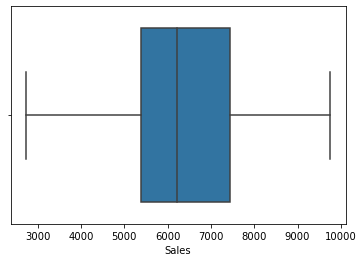

In [190]:
sns.boxplot(store_9['Sales'])

In [191]:
# Applying Standard Scaler
store_9['Sales'] = scaler.fit_transform(store_9['Sales'].values.reshape(-1,1))

In [192]:
store_9['Customers'] = scaler.fit_transform(store_9['Customers'].values.reshape(-1,1))

### Let us  decompose Store_9

<Figure size 432x288 with 0 Axes>

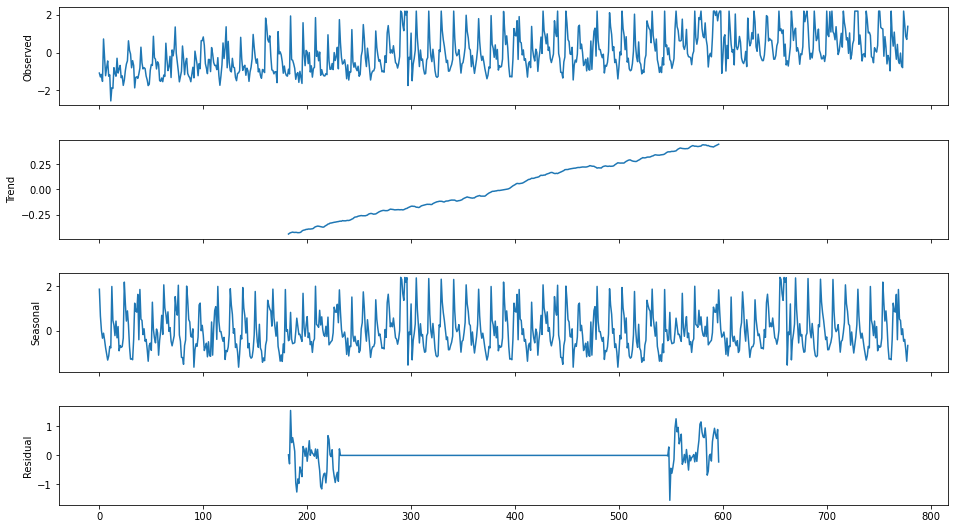

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_9['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

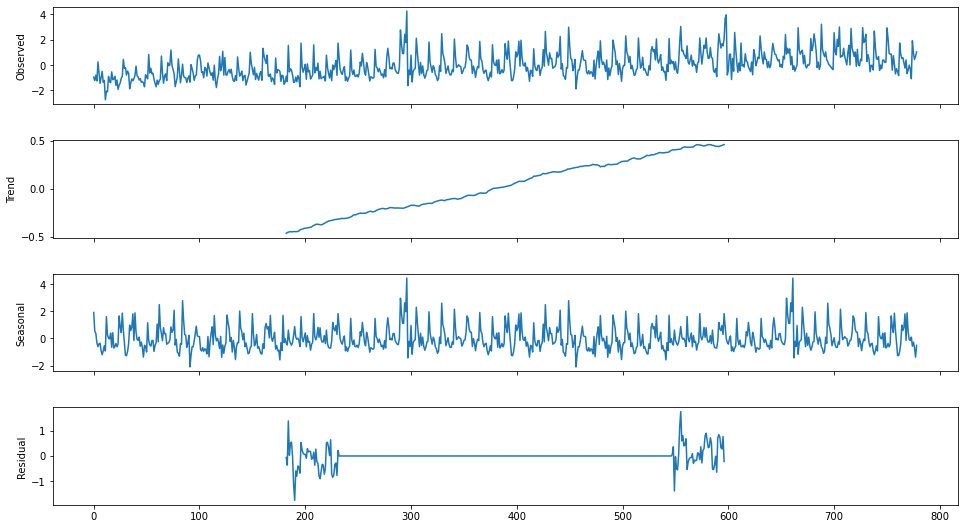

In [194]:
result = seasonal_decompose(store_9['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [195]:
test_stationarity(store_9['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0513. The series is likely non-stationary.
Test Statistic                  -2.851005
p-value                          0.051349
#Lags Used                      20.000000
Number of Observations Used    758.000000
Critical Value (1%)             -3.439006
Critical Value (5%)             -2.865361
Critical Value (10%)            -2.568804
dtype: float64


In [196]:
test_stationarity(store_9['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0117. The series is likely non-stationary.
Test Statistic                  -3.377924
p-value                          0.011735
#Lags Used                      12.000000
Number of Observations Used    766.000000
Critical Value (1%)             -3.438916
Critical Value (5%)             -2.865321
Critical Value (10%)            -2.568783
dtype: float64


In [197]:
# Performing first difference to make it stationary
store_9['Sales_diff'] = store_9['Sales'] - store_9['Sales'].shift(1)
store_9['Sales_diff'] = store_9['Sales_diff'].dropna(inplace = False)

In [198]:
store_9['Sales_diff'].dropna(inplace=True)

In [199]:
test_stationarity(store_9['Sales_diff'])#.iloc[1:])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.056439e+01
p-value                        7.582678e-19
#Lags Used                     2.000000e+01
Number of Observations Used    7.570000e+02
Critical Value (1%)           -3.439018e+00
Critical Value (5%)           -2.865366e+00
Critical Value (10%)          -2.568807e+00
dtype: float64


In [200]:
# Performing first difference to make it stationary
store_9['Customers_diff'] = store_9['Customers'] - store_9['Customers'].shift(1)
store_9['Customers_diff'] = store_9['Customers_diff'].dropna(inplace = False)

In [201]:
store_9['Customers_diff'].dropna(inplace=True)

In [202]:
test_stationarity(store_9['Customers_diff'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.049803e+01
p-value                        1.102427e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.570000e+02
Critical Value (1%)           -3.439018e+00
Critical Value (5%)           -2.865366e+00
Critical Value (10%)          -2.568807e+00
dtype: float64


## ACF and PACF

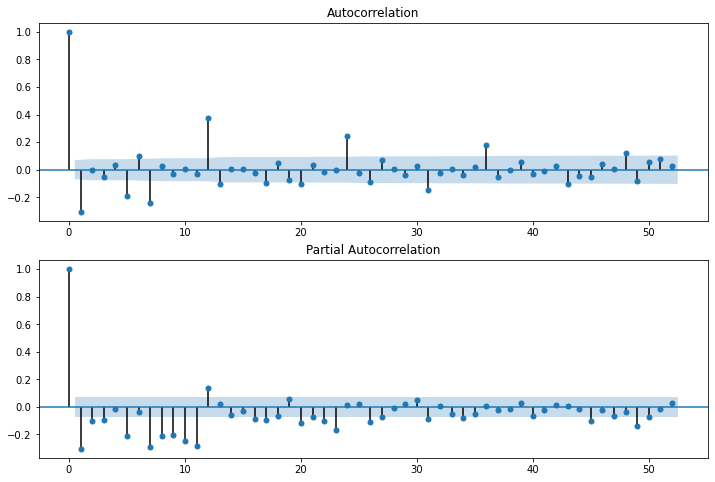

In [203]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_9['Sales_diff'].iloc[1:], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_9['Sales_diff'].iloc[1:], lags=52, ax=ax2)# 

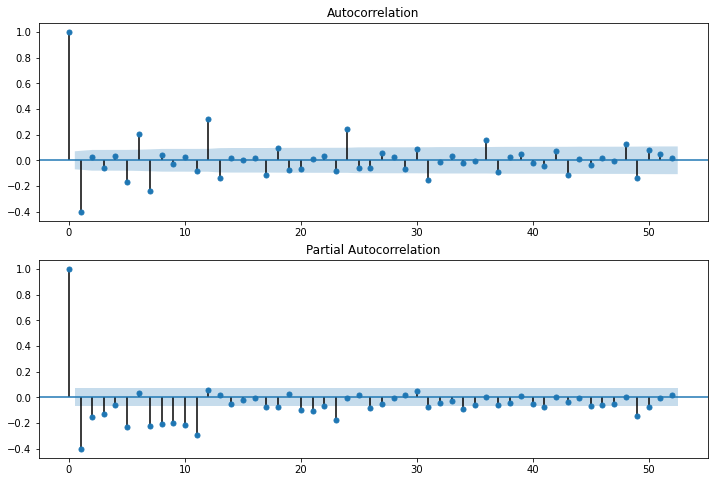

In [204]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_9['Customers_diff'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_9['Customers_diff'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [205]:
exog = store_9[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_9[['Sales_diff','Customers_diff']], order=(20,0), trend='n')
res = mod.fit(maxiter=1500, disp=False)
print(res.summary())

                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  779
Model:                                      VAR(20)   Log Likelihood                -875.235
Date:                              Mon, 12 Apr 2021   AIC                           1916.471
Time:                                      15:56:58   BIC                           2303.086
Sample:                                           0   HQIC                          2065.177
                                              - 779                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):       86.00, 1347.90
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.26, 2.55   Skew:                       0.59, 1.15
Prob

In [206]:
store_9.index

RangeIndex(start=0, stop=779, step=1)

Sales_diff  Customers_diff
750    1.310566        1.237630
751   -0.718503       -1.486575
752   -0.603010       -0.611804
753    0.030130        0.272256
754    0.052508        0.328513
..          ...             ...
819    0.212155        0.198783
820    0.062406        0.052299
821   -0.001487       -0.020336
822    0.167527        0.162585
823    0.005469        0.001811

[74 rows x 2 columns]

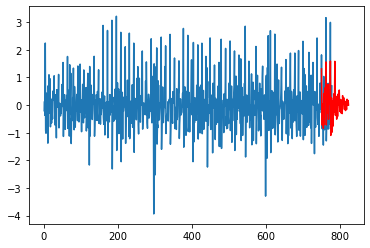

In [207]:
forecast_9 = res.predict(start = 750, end = 823, dynamic= False)   # predicting on validation set
plt.plot(store_9['Sales_diff'])
plt.plot(forecast_9['Sales_diff'], c = "red")
forecast_9

In [208]:
# Appyling inverse tranform to bring back into normal scale
forecast_st = scaler.inverse_transform(forecast_9)

In [209]:
forecast_st

array([[714.93410452, 707.4144729 ],
       [505.73974008, 426.5524912 ],
       [517.64691213, 516.74027196],
       [582.92277936, 607.88570083],
       [585.22991142, 613.6856754 ],
       [493.01143568, 522.97510415],
       [623.33980281, 665.34527654],
       [506.60936433, 521.61999983],
       [557.41340339, 578.3268988 ],
       [643.83310757, 655.22635844],
       [624.83471192, 631.88760148],
       [624.97932112, 624.67327257],
       [740.96034273, 726.62244118],
       [505.64005114, 521.65150995],
       [571.51905855, 557.87529435],
       [631.03936631, 608.14299671],
       [557.75026959, 592.14771768],
       [548.98030155, 540.57351424],
       [657.22132926, 650.18414012],
       [526.75615316, 527.51770559],
       [597.11172254, 622.9712887 ],
       [616.35327753, 591.78374972],
       [583.02596977, 574.77467203],
       [622.90367199, 580.73177265],
       [744.16999436, 749.91858705],
       [466.54787784, 462.91566258],
       [552.57472464, 582.78107413],
 

In [210]:
sales = scaler.inverse_transform(store_9['Sales_diff'])

In [211]:
sales[750:]

array([767.34681824, 579.81643132, 491.41582634, 573.18917637,
       577.58409281, 430.5287935 , 686.8989192 , 522.75227817,
       487.80222838, 626.1374554 , 560.42299052, 514.86933281,
       906.37965104, 446.14121095, 522.05467239, 656.55306759,
       491.36001788, 519.96185504, 661.08750518, 490.59265152,
       564.19006176, 637.15962679, 509.56752885, 570.46851381,
       888.66046412, 509.62333731, 511.79986736, 563.28317424,
       651.39078478])

### MAPE and RMSE

In [464]:
abs_error = np.abs(store_9['Sales'].loc[750:]-forecast_9.Sales_diff)
actual = store_9.Sales[750:]
mape = np.abs(np.round(np.mean(abs_error/actual)*100, 2))

In [465]:
mape

43.25

In [214]:
rmse = np.sqrt(mean_squared_error(store_9.Sales_diff[750:], forecast.Sales_diff[:29])).round(2)

In [215]:
rmse

1.72

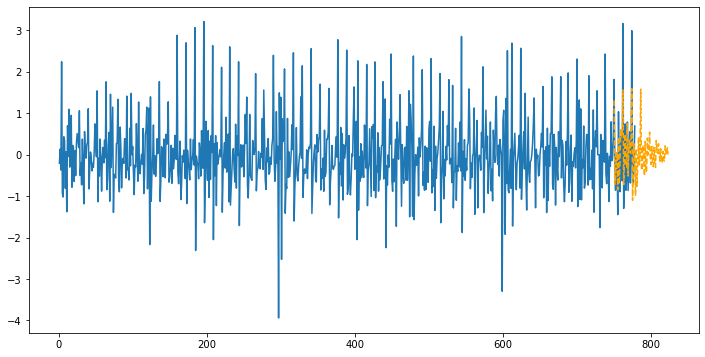

In [216]:
plt.figure(figsize=(12,6))
forecast_9 = res.predict(start = 750, end = 823, dynamic= False)  
plt.plot(store_9['Sales_diff'])
plt.plot(forecast_9['Sales_diff'], c = "orange", linestyle = "dashed")

### VARMAX

In [217]:
exog = store_9[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_9[['Sales_diff','Customers_diff']], order=(12,12), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  779
Model:                                VARMAX(12,12)   Log Likelihood                -780.361
Date:                              Mon, 12 Apr 2021   AIC                           1778.722
Time:                                      16:12:05   BIC                           2286.445
Sample:                                           0   HQIC                          1974.011
                                              - 779                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):        54.85, 418.29
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.28, 2.39   Skew:                       0.19, 0.76
Prob

Sales_diff  Customers_diff
750    1.244838        1.240044
751   -0.539662       -1.361740
752   -0.400193       -0.270703
753   -0.047656        0.293885
754   -0.007294        0.316209
755   -0.712980       -0.334105
756    0.842318        1.325339
757   -0.513454       -0.247408
758   -0.061333        0.234492
759    0.626201        0.796799
760    0.364564        0.573871
761    0.615642        0.665174
762    2.110405        1.850297
763   -0.586972       -0.343105
764   -0.140423       -0.149818
765    0.229064        0.052120
766   -0.226782        0.237245
767   -0.446035       -0.446154
768    0.496240        0.525758
769   -0.569955       -0.405047
770    0.076333        0.421961
771    0.290382        0.158685
772   -0.016325        0.112425
773    0.460950        0.111714
774    2.055903        2.102542
775   -1.012473       -0.982454
776   -0.285765        0.240062
777    0.045302        0.412403
778   -0.160166       -0.191159

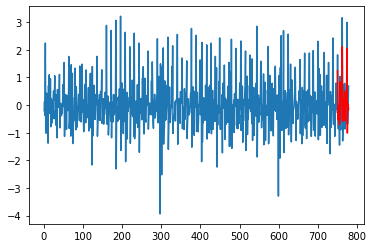

In [218]:
forecast = res.predict(start = 750, end = 778, dynamic= False)   # predicting on validation set
plt.plot(store_9['Sales_diff'])
plt.plot(forecast['Sales_diff'], c = "red")
forecast

In [219]:
forecast_st = scaler.inverse_transform(forecast)

In [220]:
sales = scaler.inverse_transform(store_9['Sales'])

In [221]:
sales[750:]

array([806.62696713, 806.62696713, 718.22636215, 711.5991072 ,
       709.36676869, 560.07913087, 667.16161875, 610.0974656 ,
       518.08326266, 564.40428673, 545.01084593, 480.06374742,
       806.62696713, 672.95174676, 615.18998782, 691.92662409,
       603.47021065, 543.61563436, 624.88670822, 535.66292842,
       520.03655885, 577.37975432, 507.13085185, 497.78293434,
       806.62696713, 736.43387312, 668.41730916, 651.88405207,
       723.45840554])

In [224]:
rmse = np.sqrt(mean_squared_error(store_9.Sales[750:], forecast.Sales_diff[:29])).round(2)

In [225]:
rmse

1.12

# Cointegration Test

In [226]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [227]:
joh_model9 = coint_johansen(store_9[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model9)

   max_eig_stat  trace_stat
0    238.973879  353.380580
1    114.406701  114.406701 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [496]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_9[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

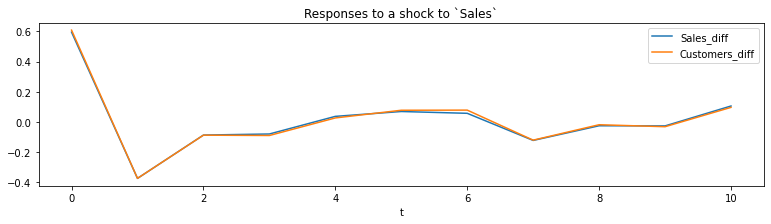

In [228]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 13

In [229]:
# Filtering only Store = 1 data
store_13 = data[data['Store']== 13]
store_13.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
9388 2015-07-31     13          5   8821        568     1      1   
9389 2015-07-30     13          4   7648        474     1      1   
9390 2015-07-29     13          3   6648        406     1      1   
9391 2015-07-28     13          2   6819        446     1      1   
9392 2015-07-27     13          1   7926        527     1      1   

      StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
9388             0              0      7  ...          15.529930          d   
9389             0              0      7  ...          16.135021          d   
9390             0              0      7  ...          16.374384          d   
9391             0              0      7  ...          15.289238          d   
9392             0              0      7  ...          15.039848          d   

      Assortment CompetitionDistance CompetitionOpenSinceMonth  \
9388           a               310.0                       0.0   
9389           a               310.0                       0.0   
9390           a               310.0                       0.0   
9391           a               310.0                       0.0   
9392           a               310.0                       0.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
9388                       0.0       1             45.0           2009.0   
9389                       0.0       1             45.0           2009.0   
9390                       0.0       1             45.0           2009.0   
9391                       0.0       1             45.0           2009.0   
9392                       0.0       1             45.0           2009.0   

      PromoInterval  
9388              1  
9389              1  
9390              1  
9391              1  
9392              1  

[5 rows x 22 columns]

In [230]:
store_13.shape

(621, 22)

In [231]:
# reversing whole dataframe to get the data in ascending order
store_13 = store_13[::-1]

In [232]:
store_13 = store_13.reset_index()
store_13 = store_13.drop(columns=['index'])
store_13.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02     13          3   3737        317     1      0             0   
1 2013-01-03     13          4   3674        292     1      0             0   
2 2013-01-04     13          5   3848        340     1      0             0   
3 2013-01-05     13          6   4285        344     1      0             0   
4 2013-01-07     13          1   8246        569     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...          11.788644          d           a   
1              1      1  ...          12.582192          d           a   
2              1      1  ...          11.317647          d           a   
3              0      1  ...          12.456395          d           a   
4              0      1  ...          14.492091          d           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               310.0                       0.0                       0.0   
1               310.0                       0.0                       0.0   
2               310.0                       0.0                       0.0   
3               310.0                       0.0                       0.0   
4               310.0                       0.0                       0.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       1             45.0           2009.0              1  
1       1             45.0           2009.0              1  
2       1             45.0           2009.0              1  
3       1             45.0           2009.0              1  
4       1             45.0           2009.0              1  

[5 rows x 22 columns]

In [233]:
percentile = store_13['Sales'].quantile([0,0.95]).values

In [234]:
print(percentile[0])
print(percentile[1])

2210.0
8011.0


In [235]:
store_13['Sales'] = np.clip(store_13['Sales'], percentile[0], percentile[1])

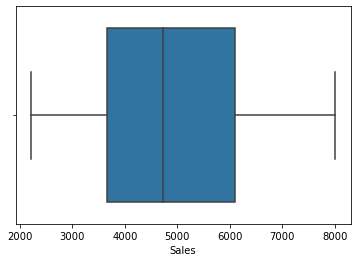

In [236]:
sns.boxplot(store_13['Sales'])

In [237]:
store_13['Sales'] = scaler.fit_transform(store_13['Sales'].values.reshape(-1,1))

In [238]:
store_13['Customers'] = scaler.fit_transform(store_13['Customers'].values.reshape(-1,1))

### Let us  decompose Store_13

<Figure size 432x288 with 0 Axes>

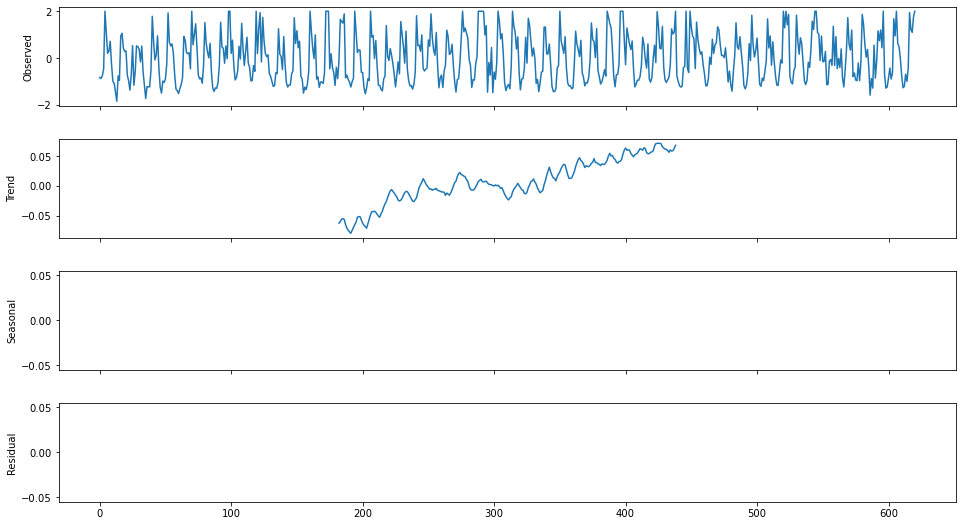

In [239]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_13['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

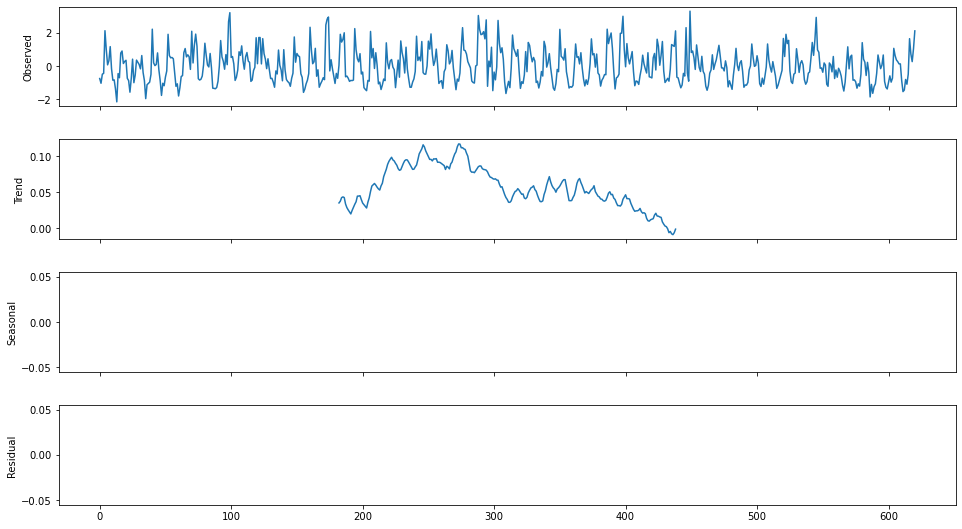

In [240]:
result = seasonal_decompose(store_13['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [241]:
test_stationarity(store_13['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.457814e+00
p-value                        1.468467e-08
#Lags Used                     1.200000e+01
Number of Observations Used    6.080000e+02
Critical Value (1%)           -3.441151e+00
Critical Value (5%)           -2.866305e+00
Critical Value (10%)          -2.569308e+00
dtype: float64


In [242]:
test_stationarity(store_13['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.495353
p-value                          0.000002
#Lags Used                      12.000000
Number of Observations Used    608.000000
Critical Value (1%)             -3.441151
Critical Value (5%)             -2.866305
Critical Value (10%)            -2.569308
dtype: float64


## ACF and PACF

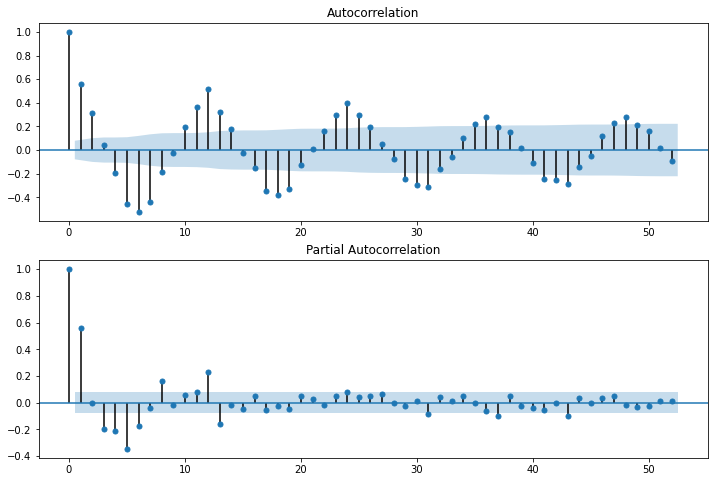

In [243]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_13['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_13['Sales'], lags=52, ax=ax2)# , lags=40

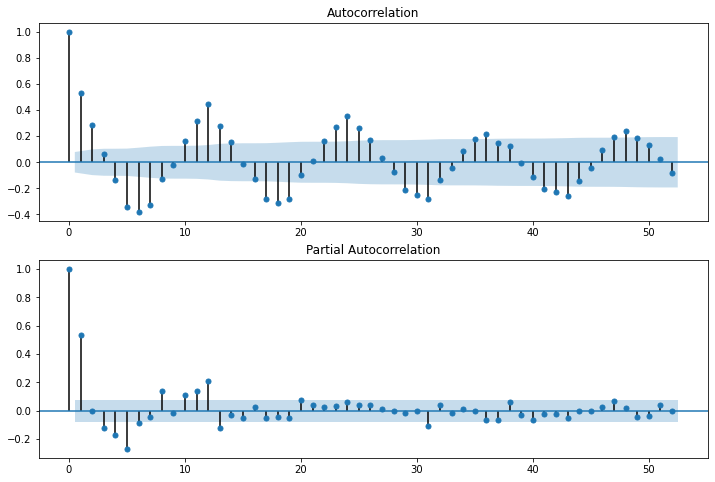

In [244]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_13['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_13['Customers'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [245]:
exog = store_13[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_13[['Sales','Customers']], order=(25,0), trend='n')
res = mod.fit(maxiter=1500, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  621
Model:                            VAR(25)   Log Likelihood                -703.842
Date:                    Mon, 12 Apr 2021   AIC                           1613.684
Time:                            16:17:52   BIC                           2070.111
Sample:                                 0   HQIC                          1791.087
                                    - 621                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                16.93, 25.60   Jarque-Bera (JB):        58.11, 314.18
Prob(Q):                        1.00, 0.96   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.03, 1.78   Skew:                       0.63, 0.38
Prob(H) (two-sided):            0.83, 0.00   Kurtosis:                   3.82, 6.40


In [246]:
store_13.index

RangeIndex(start=0, stop=621, step=1)

Sales  Customers
580  0.599436   0.422329
581  1.216325   0.835218
582  0.785775   0.336798
583  0.447235   0.000128
584  0.310246   0.044892
..        ...        ...
660 -0.660124  -0.810987
661 -0.734623  -0.860390
662 -0.595764  -0.718081
663 -0.240107  -0.408491
664  0.276801   0.062115

[85 rows x 2 columns]

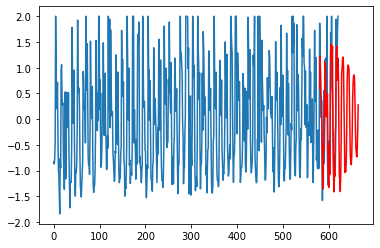

In [247]:
forecast_13 = res.predict(start = 580, end = 664, dynamic= False)   # predicting on validation set
plt.plot(store_13['Sales'])
plt.plot(forecast_13['Sales'], c = "red")
forecast_13

In [248]:
forecast_st = scaler.inverse_transform(forecast_13)

In [249]:
forecast_st

array([[435.61596637, 420.02128165],
       [489.93459814, 456.37715148],
       [452.02359052, 412.49001954],
       [422.21432064, 382.84541063],
       [410.1520875 , 386.78697115],
       [350.69429915, 342.44970206],
       [291.68863176, 273.70299635],
       [263.36431369, 236.1225981 ],
       [339.0414213 , 309.67296735],
       [330.12756919, 281.16622944],
       [369.23004668, 336.05805083],
       [412.38162659, 375.52317888],
       [480.88021414, 450.2918447 ],
       [467.60185303, 432.59394613],
       [386.72338991, 345.93118675],
       [391.0349224 , 343.26424193],
       [417.91966939, 382.53912087],
       [425.82729639, 393.80936292],
       [321.39169894, 290.54358356],
       [282.36697996, 250.33539066],
       [266.14873016, 229.8330385 ],
       [337.78347601, 298.88525182],
       [287.8379477 , 264.19496173],
       [386.54398955, 361.06901778],
       [491.02835147, 459.27751184],
       [510.94417009, 460.21509189],
       [491.21342758, 424.68392237],
 

In [250]:
sales = scaler.inverse_transform(store_13['Sales'])

In [251]:
sales[580:]

array([547.0611464 , 509.23514105, 434.98193486, 386.14034397,
       415.22382112, 347.90635397, 243.69541781, 306.52505382,
       270.09785298, 431.77634118, 307.74900776, 371.80259772,
       484.87262913, 448.09572716, 488.0782228 , 421.40187438,
       558.89270123, 319.63884612, 270.03956946, 274.35255003,
       308.15699241, 345.5167296 , 304.07714592, 326.92428629,
       530.56690986, 466.28018582, 558.89270123, 437.08014163,
       426.53082426, 380.83654353, 317.42407231, 271.49665749,
       276.39247328, 322.72787275, 294.98491659, 346.15784833,
       553.93860192, 489.41874379, 479.45226164, 537.73578299,
       558.89270123])

### MAPE and RMSE

In [468]:
abs_error = np.abs(store_13['Sales'].loc[580:]-forecast_13.Sales)
actual = store_13.Sales[580:]
mape = np.abs(np.round(np.mean(abs_error/actual)*100, 2))

In [469]:
mape

4.61

In [254]:
rmse = np.sqrt(mean_squared_error(store_13.Sales[580:], forecast_13.Sales[:41])).round(2)

In [255]:
rmse

0.65

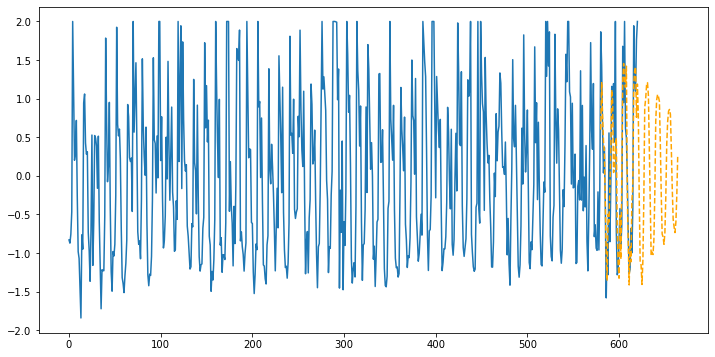

In [256]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 580, end = 664, dynamic= False)  
plt.plot(store_13['Sales'])
plt.plot(forecast_13['Sales'], c = "orange", linestyle = "dashed")

### VARMAX

In [257]:
exog = store_13[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_13[['Sales','Customers']], order=(15,12), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  621
Model:                      VARMAX(15,12)   Log Likelihood                -488.911
Date:                    Mon, 12 Apr 2021   AIC                           1219.822
Time:                            16:40:24   BIC                           1756.013
Sample:                                 0   HQIC                          1428.228
                                    - 621                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                29.48, 34.64   Jarque-Bera (JB):        40.58, 292.36
Prob(Q):                        0.89, 0.71   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.24, 1.70   Skew:                       0.44, 0.01
Prob(H) (two-sided):            0.13, 0.00   Kurtosis:                   3.89, 6.36


Sales  Customers
580  1.408885   0.889169
581  1.046765   0.538479
582  0.777534   0.427604
583  0.614425   0.376199
584  0.816046   0.531732
585 -0.842521  -1.080255
586 -0.874056  -1.139335
587 -1.266507  -1.590815
588 -0.577127  -0.695686
589 -0.781982  -1.258145
590 -0.631447  -0.869479
591 -0.175970  -0.601018
592  1.609191   1.292399
593  0.918900   0.484115
594  0.798670   0.330501
595  0.360580  -0.253947
596  0.965900   0.487253
597 -0.286390  -0.591190
598 -0.943712  -1.210159
599 -1.068464  -1.396348
600 -0.955532  -1.261674
601 -0.494226  -0.898687
602 -0.748029  -1.106496
603 -0.228573  -0.486124
604  1.379492   0.942967
605  1.291067   0.799543
606  1.182561   0.525389
607  0.733993   0.516350
608  1.313039   0.885151
609 -0.659364  -0.965199
610 -0.596754  -0.828495
611 -0.905934  -1.279631
612 -1.163516  -1.557046
613 -0.831470  -1.203405
614 -0.620471  -0.835973
615 -0.444540  -0.756166
616  1.494490   1.114825
617  1.263839   0.973322
618  1.112423   0.666588
619  0.692351   0.377853
620  1.413125   1.102434

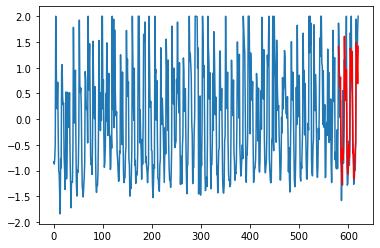

In [258]:
forecast = res.predict(start = 580, end = 620, dynamic= False)   # predicting on validation set
plt.plot(store_13['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [259]:
forecast_st = scaler.inverse_transform(forecast)

In [260]:
forecast_st

array([[506.88998067, 461.12766857],
       [475.00442108, 430.24858624],
       [451.29798375, 420.48575928],
       [436.93580455, 415.95942443],
       [454.68903858, 429.65447873],
       [308.64802803, 287.71500766],
       [305.87126725, 282.51283736],
       [271.31503425, 242.75884567],
       [332.01668627, 321.5772188 ],
       [313.97862666, 272.05134273],
       [327.23363559, 306.27427872],
       [367.33955892, 329.91300309],
       [524.52746334, 496.63310573],
       [463.74556685, 425.46168964],
       [453.15908509, 411.93558601],
       [414.58415925, 360.47345815],
       [467.8840749 , 425.73796442],
       [357.61679426, 330.77838703],
       [299.737948  , 276.27657469],
       [288.7531798 , 259.88216984],
       [298.69717326, 271.74052229],
       [339.31631868, 303.70248525],
       [316.96829249, 285.40438388],
       [362.70770067, 340.02969622],
       [504.3018473 , 465.86476172],
       [496.51583655, 453.23588862],
       [486.9615801 , 429.09597112],
 

In [261]:
sales = scaler.inverse_transform(store_13['Sales'])

In [262]:
sales[600:]

array([308.15699241, 345.5167296 , 304.07714592, 326.92428629,
       530.56690986, 466.28018582, 558.89270123, 437.08014163,
       426.53082426, 380.83654353, 317.42407231, 271.49665749,
       276.39247328, 322.72787275, 294.98491659, 346.15784833,
       553.93860192, 489.41874379, 479.45226164, 537.73578299,
       558.89270123])

In [263]:
abs_error = np.abs(store_13['Sales'].loc[600:]-forecast.Sales)
actual = store_13.Sales[600:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [264]:
mape

-125.56

In [265]:
rmse = np.sqrt(mean_squared_error(store_13.Sales[580:], forecast.Sales[:41])).round(2)

In [266]:
rmse

0.5

# Cointegration Test

In [267]:
joh_model13 = coint_johansen(store_13[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model13)

   max_eig_stat  trace_stat
0    143.106063  259.366393
1    116.260331  116.260331 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [497]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_13[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

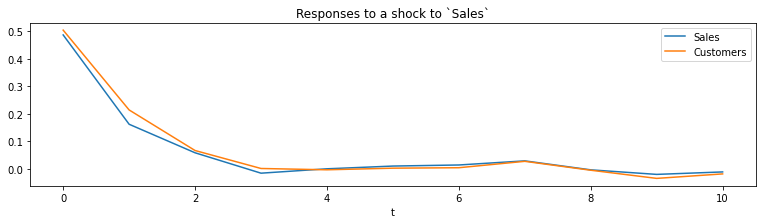

In [268]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 25

In [269]:
# Filtering only Store = 1 data
store_25 = data[data['Store']== 25]
store_25.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
18265 2015-07-31     25          5  14180       1586     1      1   
18266 2015-07-30     25          4  11272       1422     1      1   
18267 2015-07-29     25          3  10527       1254     1      1   
18268 2015-07-28     25          2  10865       1363     1      1   
18269 2015-07-27     25          1  11806       1536     1      1   

       StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
18265             0              1      7  ...           8.940731          c   
18266             0              1      7  ...           7.926864          c   
18267             0              1      7  ...           8.394737          c   
18268             0              1      7  ...           7.971387          c   
18269             0              1      7  ...           7.686198          c   

       Assortment CompetitionDistance CompetitionOpenSinceMonth  \
18265           a               430.0                       4.0   
18266           a               430.0                       4.0   
18267           a               430.0                       4.0   
18268           a               430.0                       4.0   
18269           a               430.0                       4.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
18265                    2003.0       0              0.0              0.0   
18266                    2003.0       0              0.0              0.0   
18267                    2003.0       0              0.0              0.0   
18268                    2003.0       0              0.0              0.0   
18269                    2003.0       0              0.0              0.0   

       PromoInterval  
18265              0  
18266              0  
18267              0  
18268              0  
18269              0  

[5 rows x 22 columns]

In [270]:
store_25.shape

(750, 22)

In [271]:
# reversing whole dataframe to get the data in ascending order
store_25= store_25[::-1]

In [272]:
store_25 = store_25.reset_index()
store_25 = store_25.drop(columns=['index'])
store_25.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02     25          3  11944       1698     1      0             0   
1 2013-01-03     25          4  10409       1587     1      0             0   
2 2013-01-04     25          5   9729       1520     1      0             0   
3 2013-01-05     25          6   8987       1381     1      0             0   
4 2013-01-07     25          1  14513       2017     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           7.034158          c           a   
1              1      1  ...           6.558916          c           a   
2              1      1  ...           6.400658          c           a   
3              0      1  ...           6.507603          c           a   
4              0      1  ...           7.195340          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               430.0                       4.0                    2003.0   
1               430.0                       4.0                    2003.0   
2               430.0                       4.0                    2003.0   
3               430.0                       4.0                    2003.0   
4               430.0                       4.0                    2003.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [273]:
percentile = store_25['Sales'].quantile([0,0.99]).values

In [274]:
print(percentile[0])
print(percentile[1])

1410.0
19141.71


In [275]:
store_25['Sales'] = np.clip(store_25['Sales'], percentile[0], percentile[1])

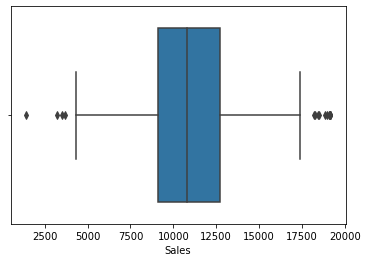

In [276]:
sns.boxplot(store_25['Sales'])

In [277]:
store_25['Sales'] = scaler.fit_transform(store_25['Sales'].values.reshape(-1,1))
store_25['Customers'] = scaler.fit_transform(store_25['Customers'].values.reshape(-1,1))

### Let us  decompose Store_25

<Figure size 432x288 with 0 Axes>

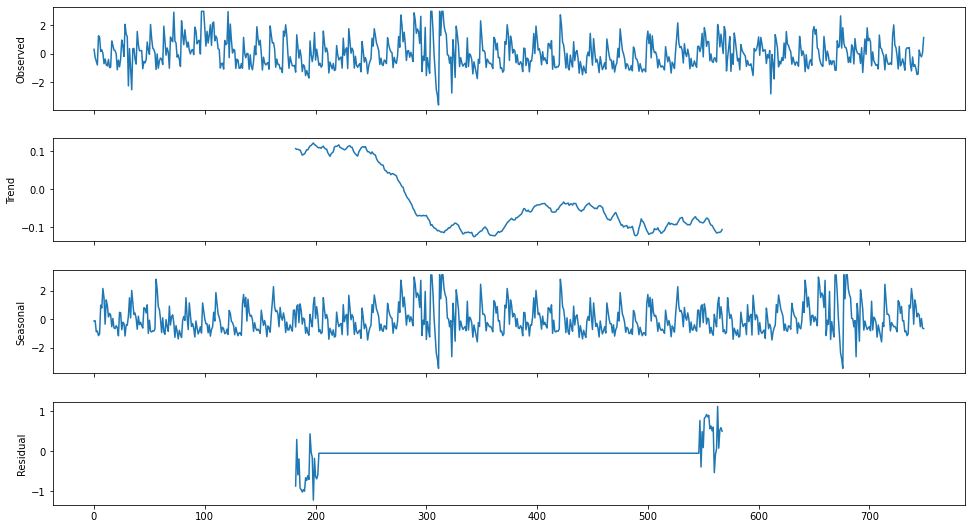

In [278]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_25['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

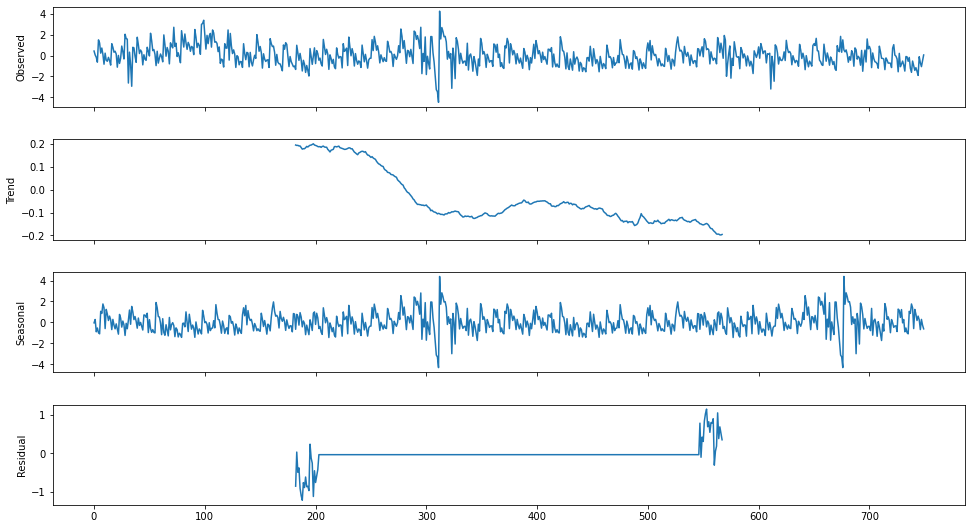

In [279]:
result = seasonal_decompose(store_25['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [280]:
test_stationarity(store_25['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.270867
p-value                          0.000006
#Lags Used                      14.000000
Number of Observations Used    735.000000
Critical Value (1%)             -3.439278
Critical Value (5%)             -2.865480
Critical Value (10%)            -2.568868
dtype: float64


In [281]:
test_stationarity(store_25['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0007. The series is likely stationary.
Test Statistic                  -4.190127
p-value                          0.000685
#Lags Used                      14.000000
Number of Observations Used    735.000000
Critical Value (1%)             -3.439278
Critical Value (5%)             -2.865480
Critical Value (10%)            -2.568868
dtype: float64


## ACF and PACF

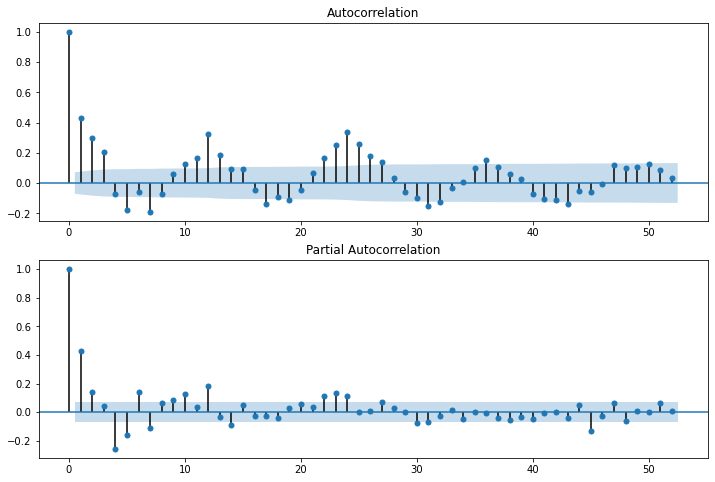

In [282]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_25['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_25['Sales'], lags=52, ax=ax2)# , lags=40

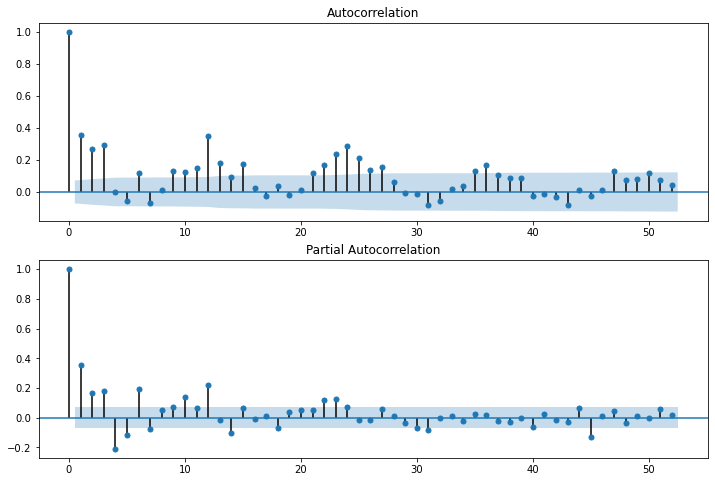

In [283]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_25['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_25['Customers'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [284]:
exog = store_25[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_25[['Sales','Customers']], order=(25,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  750
Model:                            VAR(25)   Log Likelihood                -759.007
Date:                    Mon, 12 Apr 2021   AIC                           1724.014
Time:                            16:48:16   BIC                           2199.882
Sample:                                 0   HQIC                          1907.376
                                    - 750                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                15.01, 21.84   Jarque-Bera (JB):       224.35, 528.73
Prob(Q):                        1.00, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.91, 1.08   Skew:                       0.48, 0.07
Prob(H) (two-sided):            0.47, 0.55   Kurtosis:                   5.50, 7.11


In [285]:
store_25.index

RangeIndex(start=0, stop=750, step=1)

Sales  Customers
700  0.687720   0.359359
701  0.518243   0.412367
702  0.033505  -0.163027
703 -0.344680  -0.411799
704 -0.272331  -0.291900
..        ...        ...
788 -0.685659  -0.830141
789 -0.818618  -0.922334
790 -1.001125  -1.077621
791 -0.991291  -1.062584
792 -0.929076  -1.004005

[93 rows x 2 columns]

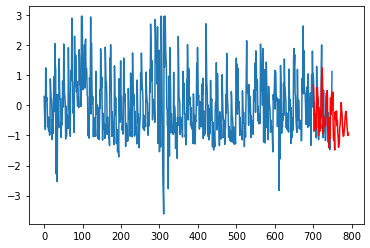

In [286]:
forecast_25 = res.predict(start = 700, end = 792, dynamic= False)   # predicting on validation set
plt.plot(store_25['Sales'])
plt.plot(forecast_25['Sales'], c = "red")
forecast_25

In [287]:
forecast_st = scaler.inverse_transform(forecast_25)

In [288]:
forecast_st

array([[1774.9025545 , 1677.24225006],
       [1724.49700744, 1693.00787731],
       [1580.32753443, 1521.875693  ],
       [1467.84883064, 1447.8865009 ],
       [1489.3668367 , 1483.5466699 ],
       [1321.26774787, 1346.78551085],
       [1404.79263674, 1418.81720195],
       [1341.41179171, 1361.55371096],
       [1448.18893348, 1423.74020936],
       [1538.79583408, 1454.1286582 ],
       [1748.67250183, 1686.71920054],
       [1748.2915914 , 1674.79125434],
       [1659.46772656, 1590.53026926],
       [1646.58724861, 1597.83292057],
       [1269.32832571, 1197.19289309],
       [1516.47670435, 1501.01378466],
       [1434.19138065, 1401.1759913 ],
       [1313.20024079, 1314.85277774],
       [1370.81552661, 1352.64056499],
       [1521.54428911, 1496.1652969 ],
       [1448.6565829 , 1366.4475633 ],
       [1697.69477943, 1624.43572836],
       [1843.91066645, 1726.914554  ],
       [1943.17961367, 1762.61748719],
       [1862.28124612, 1739.76324036],
       [1688.97271282, 16

In [289]:
sales = scaler.inverse_transform(store_25['Sales'])

In [290]:
sales[720:]

array([1343.22466665, 1954.99446583, 2170.47792462, 1744.14981037,
       1694.55879397, 1522.92307129, 1250.55904803, 1720.2931076 ,
       1312.29931121, 1361.33808912, 1462.17683739, 1367.30226481,
       1223.27846663, 1654.3558319 , 1691.24536303, 1684.39760575,
       1696.54685253, 1351.2873486 , 1208.3680274 , 1499.06636852,
       1303.02170458, 1339.35899722, 1259.39486387, 1131.4964296 ,
       1144.75015336, 1644.08419598, 1540.15291217, 1502.82159025,
       1585.10512526, 1906.28703102])

### MAPE and RMSE

In [291]:
abs_error = np.abs(store_25['Sales'].loc[720:]-forecast_25.Sales)
actual = store_25.Sales[720:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [292]:
mape

8.45

In [293]:
rmse = np.sqrt(mean_squared_error(store_25.Sales[720:], forecast_25.Sales[:30])).round(2)

In [294]:
rmse

1.19

In [295]:
store_25.Sales

0      0.299119
1     -0.270912
2     -0.523434
3     -0.798980
4      1.253133
         ...   
745    0.247872
746   -0.101574
747   -0.227092
748    0.049568
749    1.129471
Name: Sales, Length: 750, dtype: float64

In [296]:
forecast.Sales

580    1.408885
581    1.046765
582    0.777534
583    0.614425
584    0.816046
585   -0.842521
586   -0.874056
587   -1.266507
588   -0.577127
589   -0.781982
590   -0.631447
591   -0.175970
592    1.609191
593    0.918900
594    0.798670
595    0.360580
596    0.965900
597   -0.286390
598   -0.943712
599   -1.068464
600   -0.955532
601   -0.494226
602   -0.748029
603   -0.228573
604    1.379492
605    1.291067
606    1.182561
607    0.733993
608    1.313039
609   -0.659364
610   -0.596754
611   -0.905934
612   -1.163516
613   -0.831470
614   -0.620471
615   -0.444540
616    1.494490
617    1.263839
618    1.112423
619    0.692351
620    1.413125
Name: Sales, dtype: float64

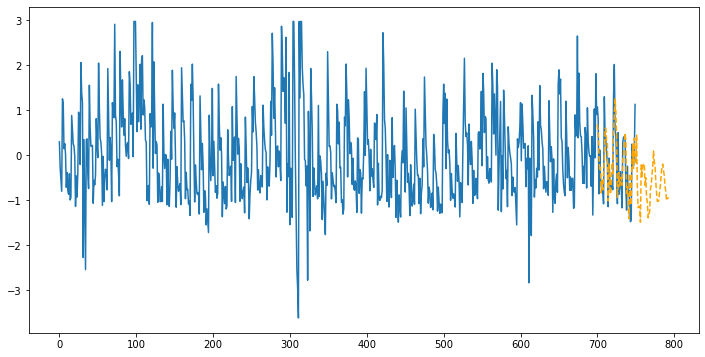

In [297]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 700, end = 792, dynamic= False)  
plt.plot(store_25['Sales'])
plt.plot(forecast_25['Sales'], c = "orange", linestyle = "dashed")

### VARMAX

In [298]:
exog = store_25[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_25[['Sales','Customers']], order=(15,15), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  750
Model:                      VARMAX(15,15)   Log Likelihood                -646.187
Date:                    Mon, 12 Apr 2021   AIC                           1558.374
Time:                            17:17:59   BIC                           2172.843
Sample:                                 0   HQIC                          1795.142
                                    - 750                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                55.93, 29.24   Jarque-Bera (JB):      1127.91, 359.94
Prob(Q):                        0.05, 0.90   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.96, 1.06   Skew:                      0.81, -0.03
Prob(H) (two-sided):            0.73, 0.65   Kurtosis:                   8.79, 6.39


Sales  Customers
700  0.633329   0.324587
701  0.707648   0.612897
702 -0.355553  -0.488622
703 -0.302807  -0.252388
704  0.112426   0.112578
705 -0.418693  -0.261807
706 -0.658666  -0.473531
707 -0.622499  -0.687741
708 -0.156235  -0.399135
709  0.712498   0.427840
710  1.114199   1.018867
711  0.594315   0.403422
712  0.500203   0.282072
713  0.584137   0.402533
714 -1.101945  -1.250905
715 -0.176999  -0.034909
716 -0.507362  -0.442396
717 -0.646417  -0.658767
718 -0.222081  -0.308105
719 -0.532471  -0.572796
720 -0.414924  -0.612247
721  1.138391   0.827011
722  1.241248   0.699922
723  1.355097   0.913628
724  0.717619   0.332562
725  0.645788   0.245395
726 -0.935032  -1.147699
727 -0.367049  -0.515075
728 -0.205493  -0.341879
729 -0.309921  -0.537105
730 -0.237481  -0.291560
731 -0.358904  -0.627752
732 -0.386473  -0.686940
733  0.598965   0.266975
734  0.561586   0.185511
735  0.562033   0.126836
736  0.628510   0.197329
737  0.586207   0.072673
738 -1.095145  -1.508609
739 -0.393607  -0.616344
740 -0.797820  -0.983778
741 -0.771695  -0.999302
742 -0.024580  -0.311012
743 -0.768421  -1.025074
744 -1.075741  -1.237604
745  0.432828  -0.029017
746  0.521213   0.028047
747  0.298677  -0.126602
748  0.334450  -0.093443
749  0.212255  -0.310300

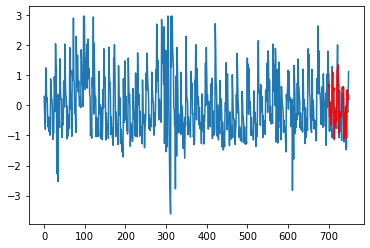

In [299]:
forecast = res.predict(start = 700, end = 749, dynamic= False)   # predicting on validation set
plt.plot(store_25['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [300]:
forecast_st = scaler.inverse_transform(forecast)

In [301]:
forecast_st

array([[1758.72579099, 1666.90032416],
       [1780.82950357, 1752.6490022 ],
       [1464.61516158, 1425.03800328],
       [1480.30252501, 1495.29799712],
       [1603.80009247, 1603.84516661],
       [1445.8362377 , 1492.49687455],
       [1374.4641077 , 1429.52626948],
       [1385.22076288, 1365.81646281],
       [1523.89567517, 1451.6528743 ],
       [1782.27197237, 1697.60967547],
       [1901.74464948, 1873.39146645],
       [1747.12219047, 1690.34735313],
       [1719.13163777, 1654.25581907],
       [1744.09511266, 1690.08303738],
       [1242.62522319, 1198.32190717],
       [1517.72011433, 1559.9801174 ],
       [1419.46444131, 1438.78656377],
       [1378.10697869, 1374.43400377],
       [1504.31184596, 1478.72675364],
       [1411.99661382, 1400.00322559],
       [1446.95693429, 1388.26993181],
       [1908.9400222 , 1816.33019882],
       [1939.53130366, 1778.53156569],
       [1973.3920183 , 1842.09156827],
       [1783.79490117, 1669.27246794],
       [1762.43108664, 16

In [302]:
sales = scaler.inverse_transform(store_25['Sales'])

In [303]:
sales[700:]

array([1888.94674243, 1812.40648773, 1315.39184676, 1605.86929248,
       1422.30521841, 1372.38285892, 1323.7858718 , 1341.34705578,
       1249.67546645, 1956.9825244 , 1696.21550944, 1667.94089875,
       1580.79766503, 1519.60964035, 1231.12025319, 1551.97081586,
       1421.20074143, 1349.40973774, 1346.97988838, 1381.66046555,
       1343.22466665, 1954.99446583, 2170.47792462, 1744.14981037,
       1694.55879397, 1522.92307129, 1250.55904803, 1720.2931076 ,
       1312.29931121, 1361.33808912, 1462.17683739, 1367.30226481,
       1223.27846663, 1654.3558319 , 1691.24536303, 1684.39760575,
       1696.54685253, 1351.2873486 , 1208.3680274 , 1499.06636852,
       1303.02170458, 1339.35899722, 1259.39486387, 1131.4964296 ,
       1144.75015336, 1644.08419598, 1540.15291217, 1502.82159025,
       1585.10512526, 1906.28703102])

In [304]:
abs_error = np.abs(store_25['Sales'].loc[700:]-forecast.Sales)
actual = store_25.Sales[700:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [305]:
mape

4.48

In [306]:
rmse = np.sqrt(mean_squared_error(store_25.Sales[700:], forecast.Sales[:50])).round(2)

In [307]:
rmse

0.52

# Cointegration Test

In [308]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [309]:
joh_model25 = coint_johansen(store_25[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model25)

   max_eig_stat  trace_stat
0    163.702947  285.457226
1    121.754278  121.754278 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [499]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_25[['Sales','Customers']],-1,1, method="trace").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

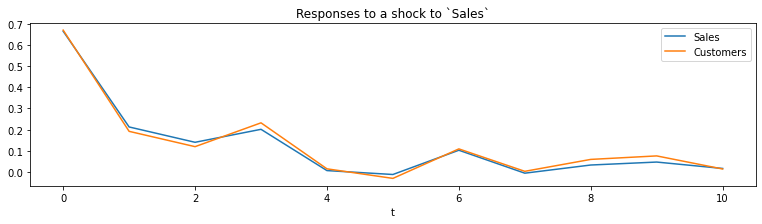

In [310]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 29

In [311]:
# Filtering only Store = 1 data
store_29 = data[data['Store']== 29]
store_29.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
21344 2015-07-31     29          5   9411        737     1      1   
21345 2015-07-30     29          4   8039        661     1      1   
21346 2015-07-29     29          3   7564        614     1      1   
21347 2015-07-28     29          2   8450        697     1      1   
21348 2015-07-27     29          1  11659        889     1      1   

       StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
21344             0              1      7  ...          12.769335          d   
21345             0              1      7  ...          12.161876          d   
21346             0              1      7  ...          12.319218          d   
21347             0              1      7  ...          12.123386          d   
21348             0              1      7  ...          13.114736          d   

       Assortment CompetitionDistance CompetitionOpenSinceMonth  \
21344           c              2170.0                       0.0   
21345           c              2170.0                       0.0   
21346           c              2170.0                       0.0   
21347           c              2170.0                       0.0   
21348           c              2170.0                       0.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
21344                       0.0       0              0.0              0.0   
21345                       0.0       0              0.0              0.0   
21346                       0.0       0              0.0              0.0   
21347                       0.0       0              0.0              0.0   
21348                       0.0       0              0.0              0.0   

       PromoInterval  
21344              0  
21345              0  
21346              0  
21347              0  
21348              0  

[5 rows x 22 columns]

In [312]:
store_29.shape

(779, 22)

In [313]:
# reversing whole dataframe to get the data in ascending order
store_29 = store_29[::-1]

In [314]:
store_29 = store_29.reset_index()
store_29 = store_29.drop(columns=['index'])
store_29.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02     29          3   5269        550     1      0             0   
1 2013-01-03     29          4   4554        456     1      0             0   
2 2013-01-04     29          5   5411        505     1      0             0   
3 2013-01-05     29          6   5564        537     1      0             0   
4 2013-01-07     29          1  10796        863     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           9.580000          d           c   
1              1      1  ...           9.986842          d           c   
2              1      1  ...          10.714851          d           c   
3              0      1  ...          10.361266          d           c   
4              0      1  ...          12.509849          d           c   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              2170.0                       0.0                       0.0   
1              2170.0                       0.0                       0.0   
2              2170.0                       0.0                       0.0   
3              2170.0                       0.0                       0.0   
4              2170.0                       0.0                       0.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [315]:
percentile = store_29['Sales'].quantile([0,0.95]).values

In [316]:
print(percentile[0])
print(percentile[1])

2576.0
12046.1


In [317]:
store_29['Sales'] = np.clip(store_29['Sales'], percentile[0], percentile[1])

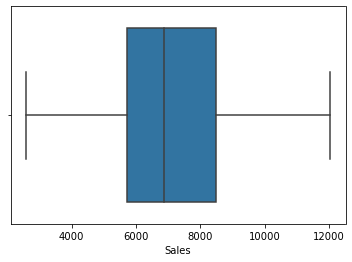

In [318]:
sns.boxplot(store_29['Sales'])

In [319]:
store_29['Sales'] = scaler.fit_transform(store_29['Sales'].values.reshape(-1,1))

In [320]:
store_29['Customers'] = scaler.fit_transform(store_29['Customers'].values.reshape(-1,1))

### Let us  decompose Store_29

<Figure size 432x288 with 0 Axes>

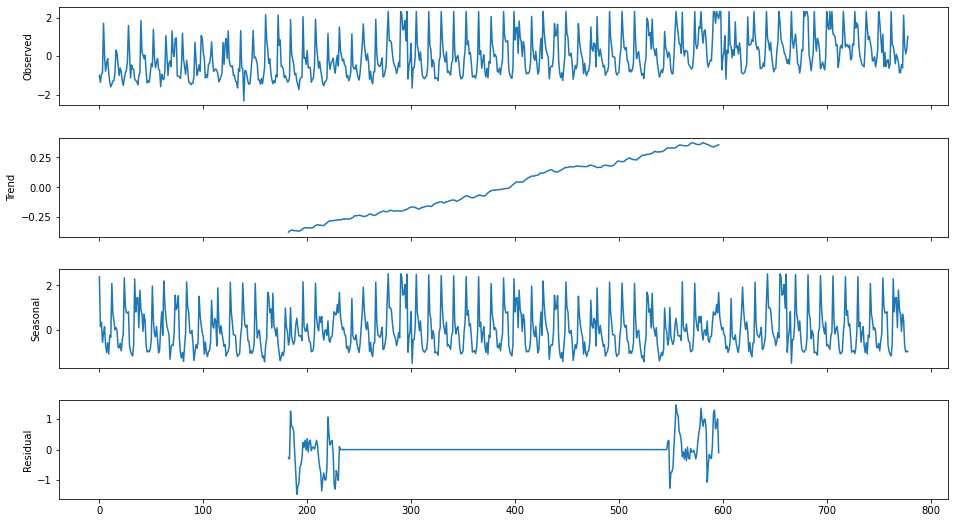

In [321]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_29['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

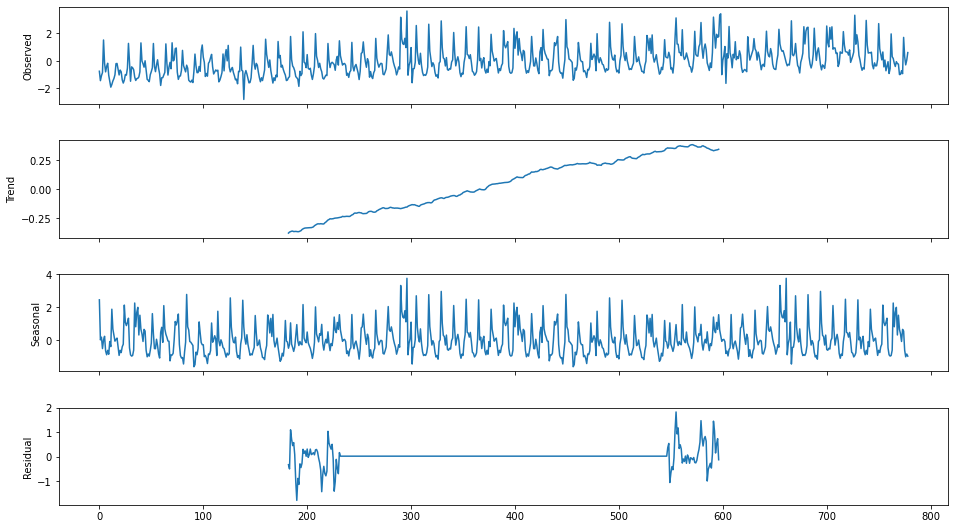

In [322]:
result = seasonal_decompose(store_29['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [323]:
test_stationarity(store_29['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0116. The series is likely non-stationary.
Test Statistic                  -3.382628
p-value                          0.011566
#Lags Used                      17.000000
Number of Observations Used    761.000000
Critical Value (1%)             -3.438972
Critical Value (5%)             -2.865345
Critical Value (10%)            -2.568796
dtype: float64


In [324]:
test_stationarity(store_29['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0020. The series is likely stationary.
Test Statistic                  -3.907568
p-value                          0.001980
#Lags Used                      12.000000
Number of Observations Used    766.000000
Critical Value (1%)             -3.438916
Critical Value (5%)             -2.865321
Critical Value (10%)            -2.568783
dtype: float64


In [325]:
store_29['Sales_diff'] = store_29['Sales'] - store_29['Sales'].shift(1)
store_29['Sales_diff'] = store_29['Sales_diff'].dropna(inplace = False)

In [326]:
store_29['Sales_diff'].dropna(inplace=True)

In [327]:
test_stationarity(store_29['Sales_diff'])#.iloc[1:])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.097718e+01
p-value                        7.617475e-20
#Lags Used                     2.000000e+01
Number of Observations Used    7.570000e+02
Critical Value (1%)           -3.439018e+00
Critical Value (5%)           -2.865366e+00
Critical Value (10%)          -2.568807e+00
dtype: float64


In [328]:
store_29['Customers_diff'] = store_29['Customers'] - store_29['Customers'].shift(1)
store_29['Customers_diff'] = store_29['Customers_diff'].dropna(inplace = False)

In [329]:
store_29['Customers_diff'].dropna(inplace=True)

In [330]:
test_stationarity(store_29['Customers_diff'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.045757e+01
p-value                        1.385864e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.570000e+02
Critical Value (1%)           -3.439018e+00
Critical Value (5%)           -2.865366e+00
Critical Value (10%)          -2.568807e+00
dtype: float64


## ACF and PACF

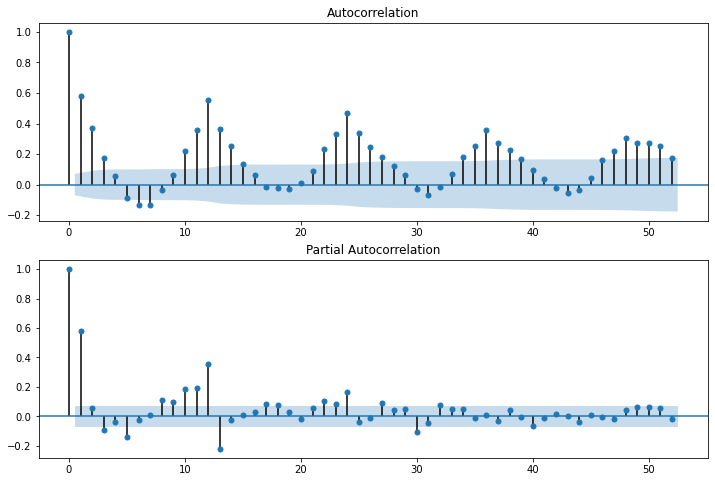

In [331]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_29['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_29['Sales'], lags=52, ax=ax2)# , lags=40

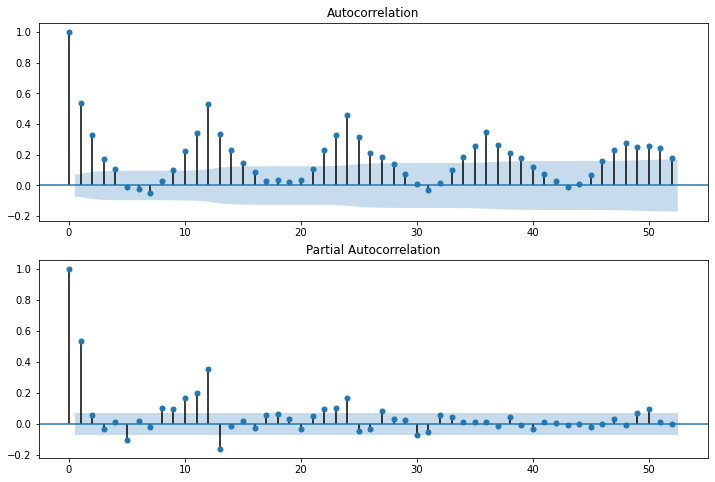

In [332]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_29['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_29['Customers'], lags=52, ax=ax2)# , lags=40

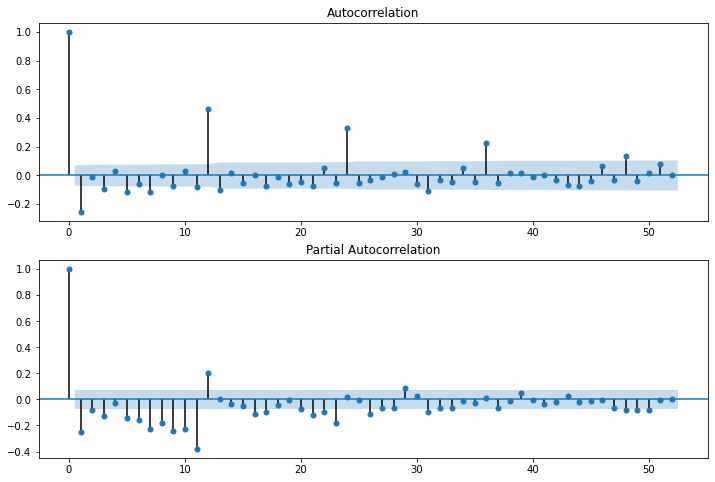

In [333]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_29['Sales_diff'].loc[1:], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_29['Sales_diff'].loc[1:], lags=52, ax=ax2)# , lags=40

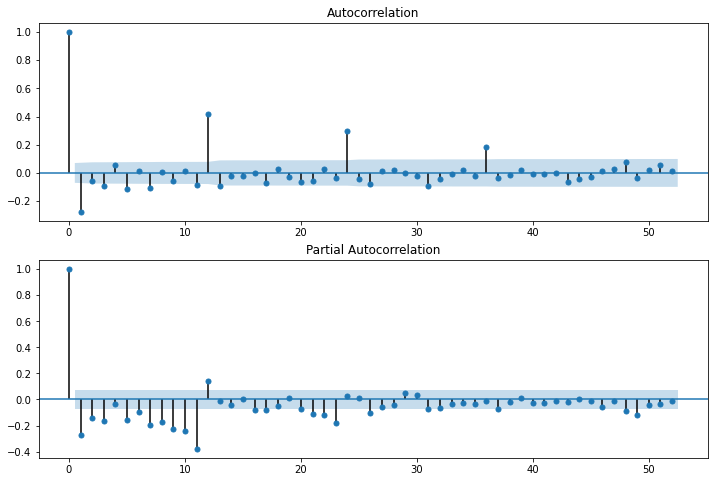

In [334]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_29['Customers_diff'].loc[1:], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_29['Customers_diff'].loc[1:], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [335]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [336]:
exog = store_29[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_29[['Sales_diff','Customers_diff']], order=(25,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  779
Model:                                      VAR(25)   Log Likelihood                -677.472
Date:                              Mon, 12 Apr 2021   AIC                           1560.944
Time:                                      17:24:22   BIC                           2040.719
Sample:                                           0   HQIC                          1745.483
                                              - 779                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):        96.36, 478.53
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.31, 2.39   Skew:                       0.50, 0.70
Prob

In [337]:
store_29.index

RangeIndex(start=0, stop=779, step=1)

Sales_diff  Customers_diff
750    1.202741        1.316991
751   -0.379079       -0.974981
752   -0.221635        0.316103
753    0.217134        0.521087
754    0.454515        0.509309
..          ...             ...
816    0.040751        0.036884
817   -0.180454       -0.193028
818   -0.196669       -0.200596
819   -0.082391       -0.038100
820    0.225469        0.233819

[71 rows x 2 columns]

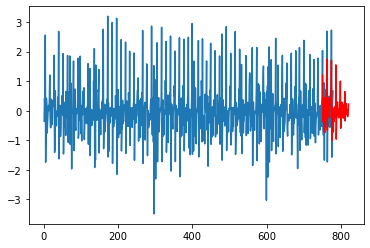

In [338]:
forecast_29 = res.predict(start = 750, end = 820, dynamic= False)   # predicting on validation set
plt.plot(store_29['Sales_diff'])
plt.plot(forecast_29['Sales_diff'], c = "red")
forecast_29

In [339]:
forecast_st = scaler.inverse_transform(forecast_29)

In [340]:
forecast_st

array([[819.38029453, 835.11834014],
       [601.4821226 , 519.39575187],
       [623.17034831, 697.24459578],
       [683.61139061, 725.48137943],
       [716.3110089 , 723.85892128],
       [554.12898355, 602.20665483],
       [711.36953335, 705.78678262],
       [576.16025454, 570.39958098],
       [646.3872218 , 651.79826275],
       [616.01506855, 626.82136033],
       [674.3751208 , 642.75821898],
       [785.5556809 , 801.17355696],
       [893.83343025, 900.38788488],
       [562.73618115, 553.67969878],
       [636.03273764, 633.95426258],
       [642.70180502, 655.44763382],
       [713.41273646, 744.47876535],
       [650.32444673, 640.22257805],
       [652.43995227, 648.58334891],
       [623.12795316, 626.37639568],
       [667.79940109, 632.06877794],
       [721.06749157, 709.23363957],
       [742.0803169 , 744.05844857],
       [730.78123118, 742.16242292],
       [888.82458152, 893.33724055],
       [514.25481341, 534.96504611],
       [657.61821683, 638.61961282],
 

In [341]:
sales = scaler.inverse_transform(store_29['Sales_diff'])

In [342]:
sales[750:]

array([ 934.73192584,  586.10006805,  544.0542519 ,  538.93246632,
        783.83468761,  423.49011489,  753.1039741 ,  553.9608635 ,
        693.66430454,  662.52923953,  591.9699039 ,  688.40773512,
       1024.36317359,  414.99199434,  645.5464768 ,  601.13520442,
        581.11980549,  721.63194951,  624.52019913,  626.74413235,
        576.94150672,  655.58787222,  709.56879662,  631.12460686,
       1029.41082807,  437.44024142,  593.99166137,  685.7120585 ,
        746.16260679])

### MAPE and RMSE

In [343]:
abs_error = np.abs(store_29['Sales_diff'].loc[750:]-forecast_29.Sales_diff)
actual = store_29.Sales_diff[750:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [344]:
mape

112.68

In [345]:
rmse = np.sqrt(mean_squared_error(store_29.Sales_diff[750:], forecast_29.Sales_diff[:29])).round(2)

In [346]:
rmse

0.62

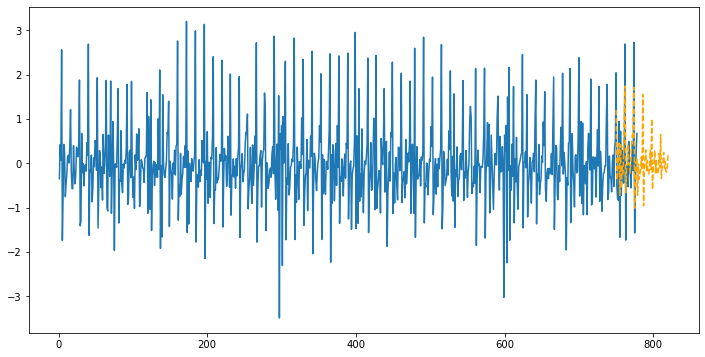

In [347]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 750, end = 820, dynamic= False)  
plt.plot(store_29['Sales_diff'])
plt.plot(forecast_29['Sales_diff'], c = "orange", linestyle = "dashed")

### VARMAX

In [348]:
exog = store_29[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_29[['Sales_diff','Customers_diff']], order=(15,15), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                  
Dep. Variable:     ['Sales_diff', 'Customers_diff']   No. Observations:                  779
Model:                                VARMAX(15,15)   Log Likelihood                -545.494
Date:                              Mon, 12 Apr 2021   AIC                           1356.989
Time:                                      17:55:20   BIC                           1976.504
Sample:                                           0   HQIC                          1595.277
                                              - 779                                         
Covariance Type:                                opg                                         
Ljung-Box (Q):                    nan, nan   Jarque-Bera (JB):        79.09, 295.51
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.35, 2.05   Skew:                      -0.01, 0.54
Prob

Sales_diff  Customers_diff
750    1.575317        1.614971
751   -0.549294       -1.253327
752   -0.417018        0.186149
753   -0.079816        0.372001
754    0.554610        0.543676
755   -1.005666       -0.559638
756    0.717098        0.720623
757   -0.357747       -0.444830
758   -0.073171       -0.051445
759   -0.109693       -0.015797
760   -0.054929       -0.307495
761    0.774021        0.867168
762    2.161965        2.118616
763   -0.706787       -0.735019
764    0.199644        0.200760
765   -0.261719       -0.071758
766    0.465028        0.692971
767   -0.188314       -0.340094
768   -0.031179        0.059761
769   -0.231922       -0.182575
770   -0.395000       -0.685829
771    0.278294        0.302896
772    0.388827        0.395292
773    0.633172        0.662763
774    2.343737        2.356778
775   -1.051719       -0.892092
776   -0.045251       -0.129723
777   -0.035344        0.235277
778    0.101158        0.233703

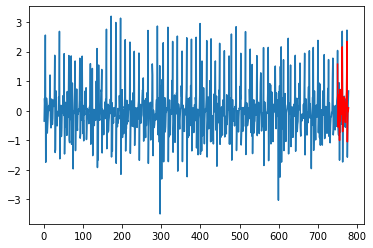

In [349]:
forecast = res.predict(start = 750, end = 778, dynamic= False)   # predicting on validation set
plt.plot(store_29['Sales_diff'])
plt.plot(forecast['Sales_diff'], c = "red")
forecast

In [350]:
forecast_st = scaler.inverse_transform(forecast)

In [351]:
forecast_st

array([[870.70320425, 876.16556293],
       [578.03483115, 481.05319987],
       [596.25610447, 679.34314275],
       [642.70608503, 704.9446125 ],
       [730.09922702, 728.5930755 ],
       [515.16883124, 576.60996294],
       [752.48227331, 752.96783848],
       [604.4206456 , 592.42492116],
       [643.62151274, 646.61426891],
       [638.59050464, 651.52481861],
       [646.13432015, 611.34306243],
       [760.32351846, 773.15466876],
       [951.51488277, 945.54351949],
       [556.33987882, 552.45085713],
       [681.202122  , 681.35587686],
       [617.64872087, 643.81607071],
       [717.75914794, 749.15870276],
       [627.76029348, 606.85239207],
       [649.4058792 , 661.93303067],
       [621.75334845, 628.55097916],
       [599.28908763, 559.22688851],
       [692.03631082, 695.4252696 ],
       [707.26241443, 708.15299192],
       [740.92130174, 744.99746353],
       [976.55424985, 978.35070295],
       [508.82505017, 530.81393427],
       [647.46743729, 635.83140224],
 

In [352]:
sales = scaler.inverse_transform(store_29['Sales_diff'])

In [353]:
sales[750:]

array([ 934.73192584,  586.10006805,  544.0542519 ,  538.93246632,
        783.83468761,  423.49011489,  753.1039741 ,  553.9608635 ,
        693.66430454,  662.52923953,  591.9699039 ,  688.40773512,
       1024.36317359,  414.99199434,  645.5464768 ,  601.13520442,
        581.11980549,  721.63194951,  624.52019913,  626.74413235,
        576.94150672,  655.58787222,  709.56879662,  631.12460686,
       1029.41082807,  437.44024142,  593.99166137,  685.7120585 ,
        746.16260679])

In [354]:
abs_error = np.abs(store_29['Sales_diff'].loc[750:]-forecast.Sales_diff)
actual = store_29.Sales_diff[750:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [355]:
mape

41.03

In [356]:
rmse = np.sqrt(mean_squared_error(store_29.Sales_diff[750:], forecast.Sales_diff[:35])).round(2)

In [357]:
rmse

0.49

# Cointegration Test

In [358]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [359]:
joh_model29 = coint_johansen(store_29[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model29)

   max_eig_stat  trace_stat
0    240.711035  371.354871
1    130.643836  130.643836 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [500]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_29[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

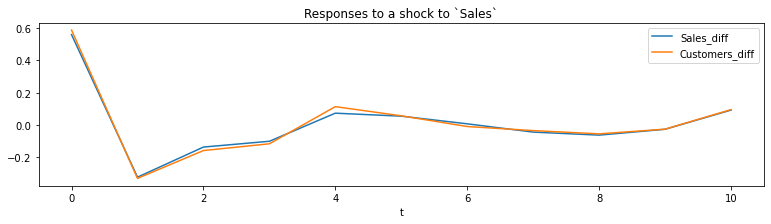

In [360]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 31

In [361]:
# Filtering only Store = 1 data
store_31 = data[data['Store']== 31]
store_31.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
22900 2015-07-31     31          5   7248        645     1      1   
22901 2015-07-30     31          4   6712        582     1      1   
22902 2015-07-29     31          3   5982        570     1      1   
22903 2015-07-28     31          2   5736        492     1      1   
22904 2015-07-27     31          1   8054        684     1      1   

       StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
22900             0              1      7  ...          11.237209          d   
22901             0              1      7  ...          11.532646          d   
22902             0              1      7  ...          10.494737          d   
22903             0              1      7  ...          11.658537          d   
22904             0              1      7  ...          11.774854          d   

       Assortment CompetitionDistance CompetitionOpenSinceMonth  \
22900           c              9800.0                       7.0   
22901           c              9800.0                       7.0   
22902           c              9800.0                       7.0   
22903           c              9800.0                       7.0   
22904           c              9800.0                       7.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
22900                    2012.0       0              0.0              0.0   
22901                    2012.0       0              0.0              0.0   
22902                    2012.0       0              0.0              0.0   
22903                    2012.0       0              0.0              0.0   
22904                    2012.0       0              0.0              0.0   

       PromoInterval  
22900              0  
22901              0  
22902              0  
22903              0  
22904              0  

[5 rows x 22 columns]

In [362]:
store_31.shape

(784, 22)

In [363]:
# reversing whole dataframe to get the data in ascending order
store_31 = store_31[::-1]

In [364]:
store_31 = store_31.reset_index()
store_31 = store_31.drop(columns=['index'])
store_31.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02     31          3   5122        567     1      0             0   
1 2013-01-03     31          4   5623        578     1      0             0   
2 2013-01-04     31          5   6140        633     1      0             0   
3 2013-01-05     31          6   5607        624     1      0             0   
4 2013-01-07     31          1   7857        743     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           9.033510          d           c   
1              1      1  ...           9.728374          d           c   
2              1      1  ...           9.699842          d           c   
3              0      1  ...           8.985577          d           c   
4              0      1  ...          10.574697          d           c   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              9800.0                       7.0                    2012.0   
1              9800.0                       7.0                    2012.0   
2              9800.0                       7.0                    2012.0   
3              9800.0                       7.0                    2012.0   
4              9800.0                       7.0                    2012.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [365]:
percentile = store_31['Sales'].quantile([0,0.95]).values

In [366]:
print(percentile[0])
print(percentile[1])

3150.0
8425.449999999995


In [367]:
store_31['Sales'] = np.clip(store_31['Sales'], percentile[0], percentile[1])

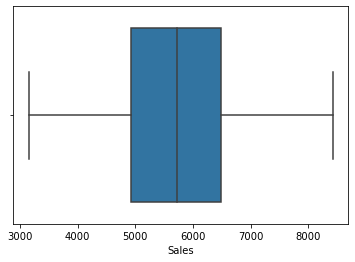

In [368]:
sns.boxplot(store_31['Sales'])

In [369]:
store_31['Sales'] = scaler.fit_transform(store_31['Sales'].values.reshape(-1,1))

In [370]:
store_31['Customers'] = scaler.fit_transform(store_31['Customers'].values.reshape(-1,1))

### Let us  decompose Store_31

<Figure size 432x288 with 0 Axes>

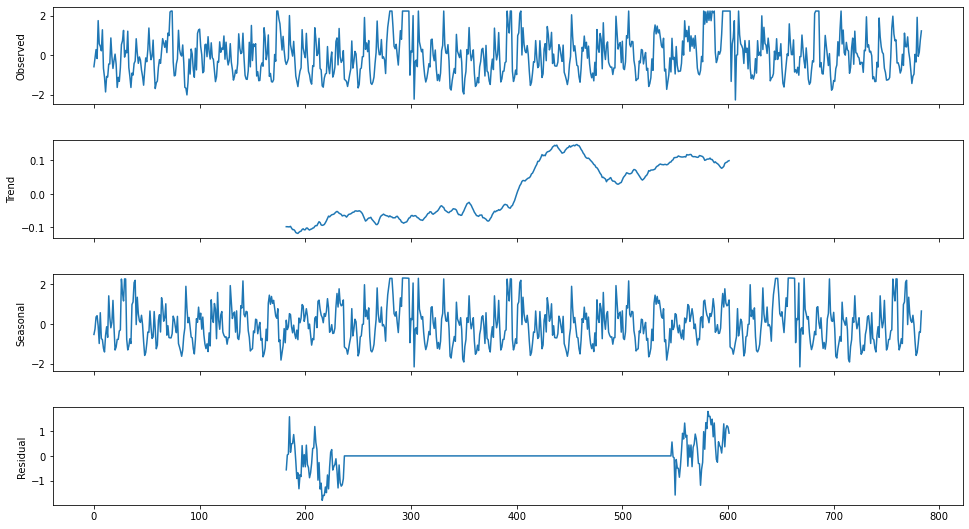

In [371]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_31['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

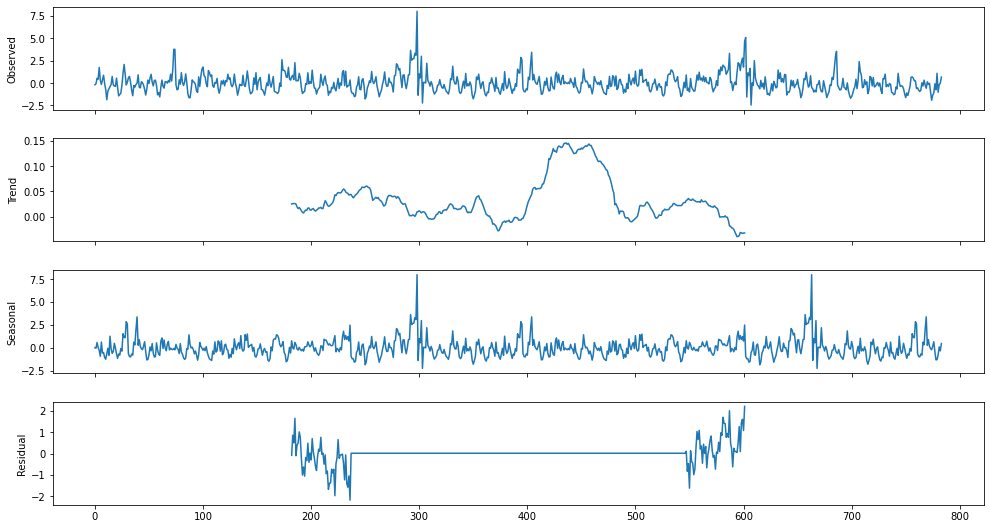

In [372]:
result = seasonal_decompose(store_31['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [373]:
test_stationarity(store_31['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.178299e+00
p-value                        6.548465e-08
#Lags Used                     1.200000e+01
Number of Observations Used    7.710000e+02
Critical Value (1%)           -3.438860e+00
Critical Value (5%)           -2.865296e+00
Critical Value (10%)          -2.568770e+00
dtype: float64


In [374]:
test_stationarity(store_31['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.222534e+00
p-value                        5.181439e-08
#Lags Used                     1.300000e+01
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64


## ACF and PACF

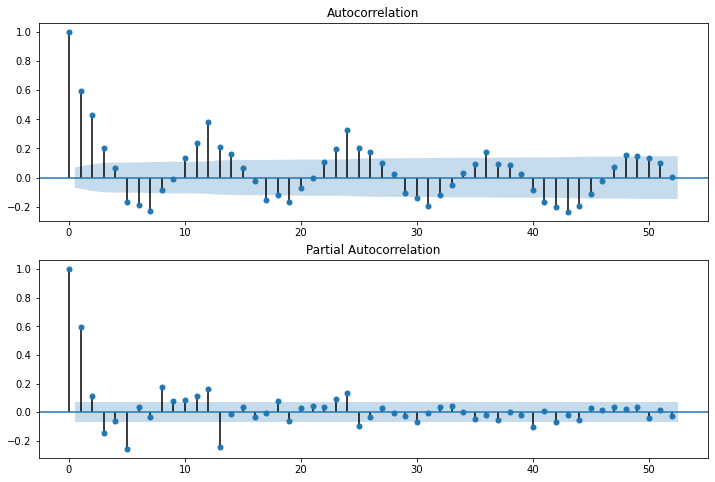

In [375]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_31['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_31['Sales'], lags=52, ax=ax2)# , lags=40

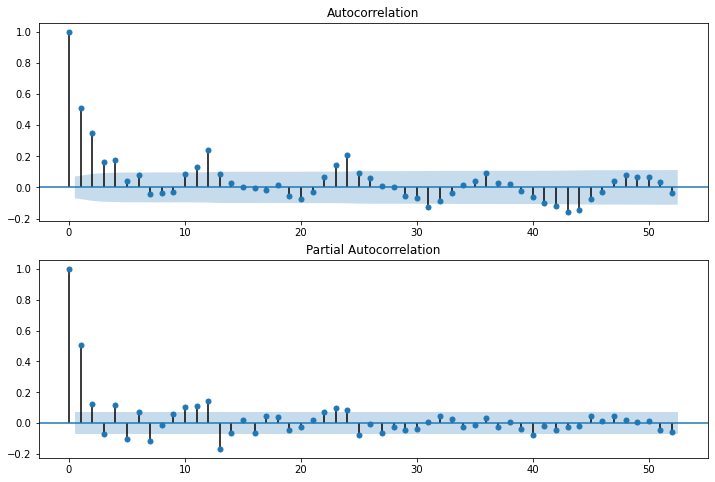

In [376]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_31['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_31['Customers'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [377]:
exog = store_31[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_31[['Sales','Customers']], order=(25,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  784
Model:                            VAR(25)   Log Likelihood               -1182.237
Date:                    Mon, 12 Apr 2021   AIC                           2570.473
Time:                            17:59:52   BIC                           3050.908
Sample:                                 0   HQIC                          2755.210
                                    - 784                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                23.95, 22.96   Jarque-Bera (JB):      38.78, 32733.43
Prob(Q):                        0.98, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.26, 1.50   Skew:                       0.11, 2.58
Prob(H) (two-sided):            0.06, 0.00   Kurtosis:                  4.07, 34.23


In [378]:
store_31.index

RangeIndex(start=0, stop=784, step=1)

Sales  Customers
720 -0.053099  -0.182355
721  1.115449   0.601390
722  0.193757  -0.143283
723 -0.216208  -0.308628
724  0.356236   0.363448
..        ...        ...
821  0.192702   0.175108
822 -0.185936  -0.161949
823 -0.065162   0.048496
824 -0.056206   0.088889
825  0.010252   0.093080

[106 rows x 2 columns]

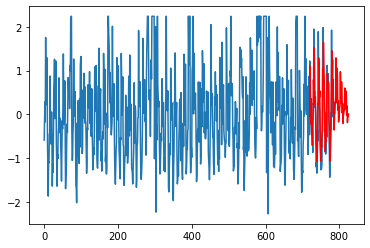

In [379]:
forecast_31 = res.predict(start = 720, end = 825, dynamic= False)  # predicting on validation set 
plt.plot(store_31['Sales'])
plt.plot(forecast_31['Sales'], c = "red")
forecast_31

In [380]:
forecast_st = scaler.inverse_transform(forecast_31)

In [381]:
forecast_st

array([[581.23862509, 569.52400408],
       [687.14519588, 640.55557357],
       [603.6113909 , 573.0651412 ],
       [566.45593539, 558.07974055],
       [618.33703954, 618.99065169],
       [547.19127692, 557.30643082],
       [552.20590733, 554.91227505],
       [522.06975443, 538.3551485 ],
       [574.86349634, 569.42543987],
       [576.86229322, 560.20500179],
       [657.91993085, 677.51059343],
       [625.77903803, 610.98302906],
       [724.15181014, 671.0701589 ],
       [668.25484067, 609.60994244],
       [605.44889468, 561.83193847],
       [622.69306932, 621.52056481],
       [587.60704624, 592.94144266],
       [531.13599572, 540.03961565],
       [519.48172298, 503.90429747],
       [509.19626756, 499.84396268],
       [488.38799257, 479.51707029],
       [553.40953635, 573.26528362],
       [609.10791635, 588.34289535],
       [606.32631783, 576.02766945],
       [702.88932799, 642.9413649 ],
       [687.18453504, 626.16604263],
       [620.83367863, 584.79755755],
 

In [382]:
sales = scaler.inverse_transform(store_31['Sales'])

In [383]:
sales[720:]

array([696.59759859, 597.64483581, 594.39032051, 579.51253629,
       573.31345953, 543.63537954, 552.93399468, 552.62404084,
       507.21580358, 608.64819706, 606.55600865, 762.54027762,
       623.44849282, 633.75445794, 600.58939727, 604.23135487,
       583.61942464, 477.46023513, 486.44889644, 464.5196624 ,
       465.52701237, 553.4764139 , 531.54717986, 757.11608545,
       671.25887233, 624.76579663, 599.81451268, 591.83320135,
       526.04549924, 506.44091899, 471.41613529, 472.26850835,
       474.74813905, 483.81428881, 574.39829796, 710.77798667,
       765.40735062, 683.81200277, 652.19671129, 656.38108811,
       550.06692168, 551.15176011, 535.03416054, 503.96128828,
       517.90921099, 590.36092062, 539.06356043, 687.53144882,
       625.54068123, 624.30086588, 670.25152236, 602.061678  ,
       568.89661734, 515.9719995 , 455.99593185, 488.92852714,
       499.00202687, 589.89598986, 554.79371771, 760.21562383,
       580.59737472, 599.65953576, 656.22611119, 697.75

### MAPE and RMSE

In [384]:
abs_error = np.abs(store_31['Sales'].loc[720:]-forecast_31.Sales)
actual = store_31.Sales[720:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [385]:
mape

20.74

In [386]:
rmse = np.sqrt(mean_squared_error(store_31.Sales[720:], forecast_31.Sales[:64])).round(2)

In [387]:
rmse

0.61

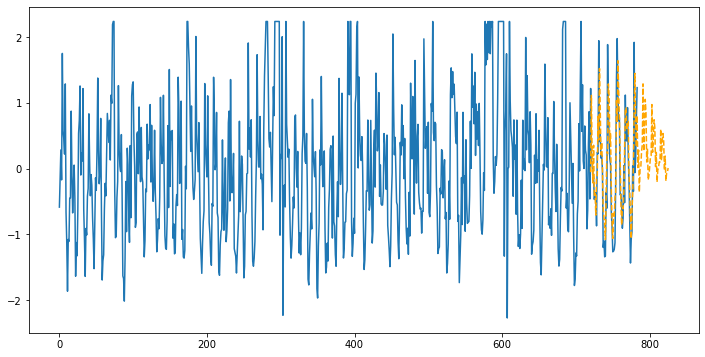

In [388]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 720, end = 825, dynamic= False)  
plt.plot(store_31['Sales'])
plt.plot(forecast_31['Sales'], c = "orange", linestyle = "dashed")

### VARMAX

In [389]:
exog = store_31[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_31[['Sales','Customers']], order=(15,10), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  784
Model:                      VARMAX(15,10)   Log Likelihood                -983.502
Date:                    Mon, 12 Apr 2021   AIC                           2193.005
Time:                            18:25:55   BIC                           2720.083
Sample:                                 0   HQIC                          2395.677
                                    - 784                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                38.76, 20.02   Jarque-Bera (JB):      57.34, 31775.63
Prob(Q):                        0.53, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.27, 1.41   Skew:                       0.21, 2.68
Prob(H) (two-sided):            0.05, 0.01   Kurtosis:                  4.26, 33.73


Sales  Customers
720  0.930280   0.287106
721  1.315859   0.695159
722  0.281498  -0.141550
723  0.239980  -0.036689
724  0.667016   0.403718
..        ...        ...
779  1.143852   0.354982
780  1.157648   0.374796
781  0.463647  -0.138991
782  0.393649   0.032300
783  1.127611   0.770127

[64 rows x 2 columns]

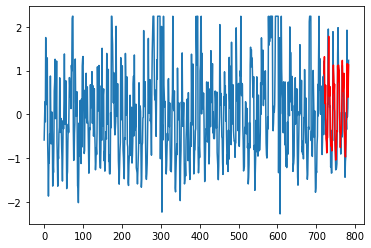

In [390]:
forecast = res.predict(start = 720, end = 783, dynamic= False)   # predicting on validation set
plt.plot(store_31['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [391]:
forecast_st = scaler.inverse_transform(forecast)

In [392]:
forecast_st

array([[670.36316327, 612.0717178 ],
       [705.30847796, 649.0539573 ],
       [611.56341021, 573.22223412],
       [607.80059542, 582.72584018],
       [646.50329547, 622.64035591],
       [536.10742544, 549.93395227],
       [528.91065286, 553.41149492],
       [506.44946825, 527.78929358],
       [537.43405473, 547.00067323],
       [537.95403919, 534.0694168 ],
       [613.70340958, 644.75078232],
       [689.02795734, 635.32966105],
       [747.46757642, 693.89463988],
       [657.68179731, 604.64211531],
       [623.59415507, 586.07130127],
       [643.66067893, 617.83631286],
       [543.64980121, 538.68640472],
       [530.99436035, 540.88323608],
       [520.32552099, 521.15111271],
       [524.811702  , 525.63155129],
       [510.54924857, 492.92704254],
       [529.90912422, 543.38592613],
       [568.84733813, 572.36211908],
       [662.75148258, 606.87020202],
       [688.05671322, 627.65952435],
       [664.30779912, 618.27025003],
       [630.57972675, 600.87789707],
 

In [393]:
sales = scaler.inverse_transform(store_31['Sales'])

In [394]:
sales[720:]

array([696.59759859, 597.64483581, 594.39032051, 579.51253629,
       573.31345953, 543.63537954, 552.93399468, 552.62404084,
       507.21580358, 608.64819706, 606.55600865, 762.54027762,
       623.44849282, 633.75445794, 600.58939727, 604.23135487,
       583.61942464, 477.46023513, 486.44889644, 464.5196624 ,
       465.52701237, 553.4764139 , 531.54717986, 757.11608545,
       671.25887233, 624.76579663, 599.81451268, 591.83320135,
       526.04549924, 506.44091899, 471.41613529, 472.26850835,
       474.74813905, 483.81428881, 574.39829796, 710.77798667,
       765.40735062, 683.81200277, 652.19671129, 656.38108811,
       550.06692168, 551.15176011, 535.03416054, 503.96128828,
       517.90921099, 590.36092062, 539.06356043, 687.53144882,
       625.54068123, 624.30086588, 670.25152236, 602.061678  ,
       568.89661734, 515.9719995 , 455.99593185, 488.92852714,
       499.00202687, 589.89598986, 554.79371771, 760.21562383,
       580.59737472, 599.65953576, 656.22611119, 697.75

In [395]:
abs_error = np.abs(store_31['Sales'].loc[720:]-forecast.Sales)
actual = store_31.Sales[720:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [396]:
mape

-9.69

In [397]:
rmse = np.sqrt(mean_squared_error(store_31.Sales[720:], forecast.Sales[:64])).round(2)

In [398]:
rmse

0.52

# Cointegration Test

In [399]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [400]:
joh_model31 = coint_johansen(store_31[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model31)

   max_eig_stat  trace_stat
0    201.317255  318.947957
1    117.630702  117.630702 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [501]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_31[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

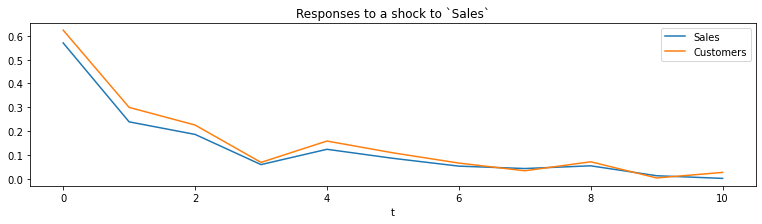

In [401]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

# Store 46

In [402]:
# Filtering only Store = 1 data
store_46 = data[data['Store']== 46]
store_46.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  \
34126 2015-07-31     46          5   7628        775     1      1   
34127 2015-07-30     46          4   7057        760     1      1   
34128 2015-07-29     46          3   6955        716     1      1   
34129 2015-07-28     46          2   6385        714     1      1   
34130 2015-07-27     46          1  10068        896     1      1   

       StateHoliday  SchoolHoliday  Month  ...  SalesperCustomers  StoreType  \
34126             0              0      7  ...           9.842581          c   
34127             0              0      7  ...           9.285526          c   
34128             0              0      7  ...           9.713687          c   
34129             0              0      7  ...           8.942577          c   
34130             0              0      7  ...          11.236607          c   

       Assortment CompetitionDistance CompetitionOpenSinceMonth  \
34126           a              1200.0                       9.0   
34127           a              1200.0                       9.0   
34128           a              1200.0                       9.0   
34129           a              1200.0                       9.0   
34130           a              1200.0                       9.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
34126                    2005.0       1             14.0           2011.0   
34127                    2005.0       1             14.0           2011.0   
34128                    2005.0       1             14.0           2011.0   
34129                    2005.0       1             14.0           2011.0   
34130                    2005.0       1             14.0           2011.0   

       PromoInterval  
34126              2  
34127              2  
34128              2  
34129              2  
34130              2  

[5 rows x 22 columns]

In [403]:
store_46.shape

(622, 22)

In [404]:
# reversing whole dataframe to get the data in ascending order
store_46 = store_46[::-1]

In [405]:
store_46 = store_46.reset_index()
store_46 = store_46.drop(columns=['index'])
store_46.head()

Date  Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0 2013-01-02     46          3   4016        582     1      0             0   
1 2013-01-03     46          4   4177        553     1      0             0   
2 2013-01-04     46          5   4125        569     1      0             0   
3 2013-01-05     46          6   4848        651     1      0             0   
4 2013-01-07     46          1   7788        825     1      1             0   

   SchoolHoliday  Month  ...  SalesperCustomers  StoreType  Assortment  \
0              1      1  ...           6.900344          c           a   
1              1      1  ...           7.553345          c           a   
2              1      1  ...           7.249561          c           a   
3              0      1  ...           7.447005          c           a   
4              0      1  ...           9.440000          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1200.0                       9.0                    2005.0   
1              1200.0                       9.0                    2005.0   
2              1200.0                       9.0                    2005.0   
3              1200.0                       9.0                    2005.0   
4              1200.0                       9.0                    2005.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       1             14.0           2011.0              2  
1       1             14.0           2011.0              2  
2       1             14.0           2011.0              2  
3       1             14.0           2011.0              2  
4       1             14.0           2011.0              2  

[5 rows x 22 columns]

In [406]:
percentile = store_46['Sales'].quantile([0,0.95]).values

In [407]:
print(percentile[0])
print(percentile[1])

2272.0
8357.95


In [408]:
store_46['Sales'] = np.clip(store_46['Sales'], percentile[0], percentile[1])

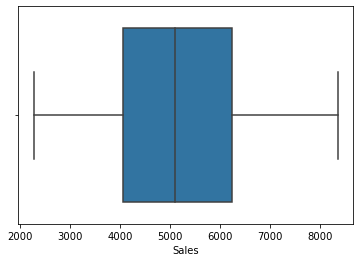

In [409]:
sns.boxplot(store_46['Sales'])

In [410]:
store_46['Sales'] = scaler.fit_transform(store_46['Sales'].values.reshape(-1,1))
store_46['Customers'] = scaler.fit_transform(store_46['Customers'].values.reshape(-1,1))

### Let us  decompose Store_46

<Figure size 432x288 with 0 Axes>

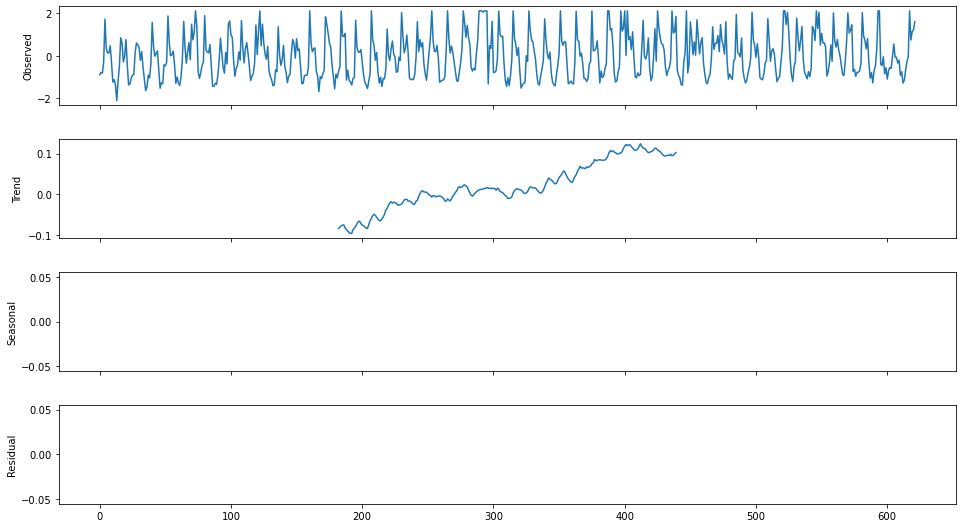

In [411]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(store_46['Sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

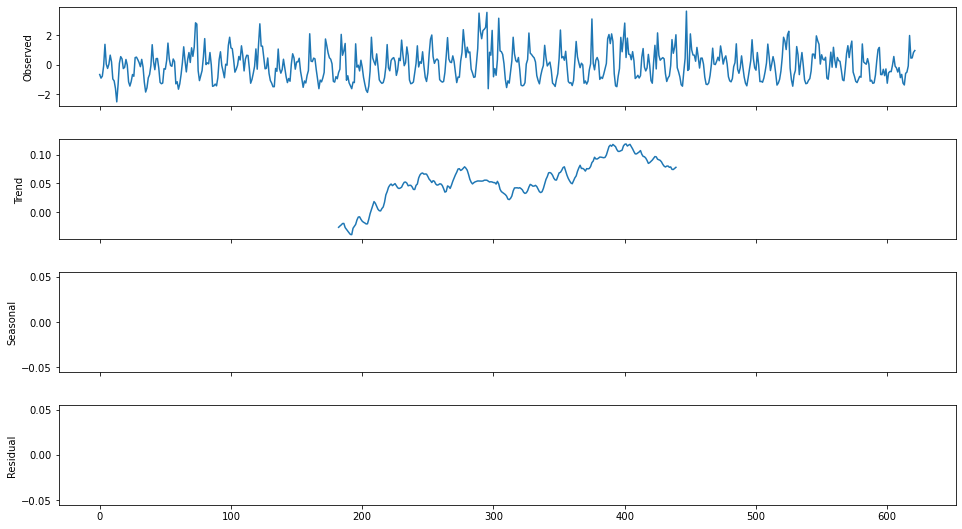

In [412]:
result = seasonal_decompose(store_46['Customers'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 8)

In [413]:
test_stationarity(store_46['Sales'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.507317
p-value                          0.000002
#Lags Used                      12.000000
Number of Observations Used    609.000000
Critical Value (1%)             -3.441133
Critical Value (5%)             -2.866298
Critical Value (10%)            -2.569304
dtype: float64


In [414]:
test_stationarity(store_46['Customers'])

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.564866
p-value                          0.000002
#Lags Used                      13.000000
Number of Observations Used    608.000000
Critical Value (1%)             -3.441151
Critical Value (5%)             -2.866305
Critical Value (10%)            -2.569308
dtype: float64


## ACF and PACF

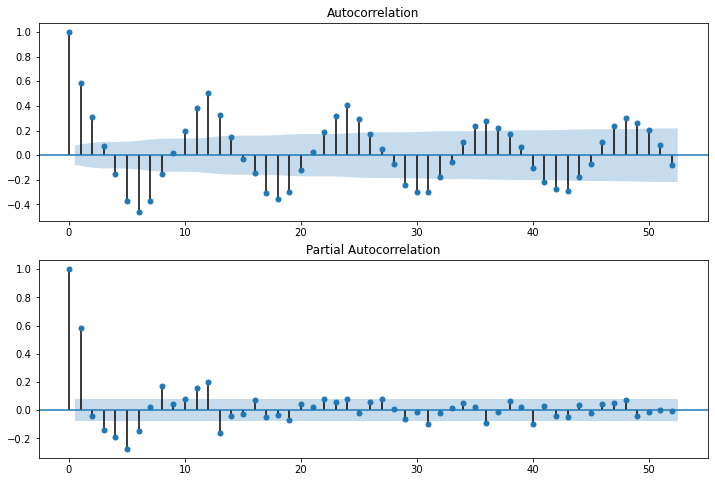

In [415]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_46['Sales'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_46['Sales'], lags=52, ax=ax2)# , lags=40

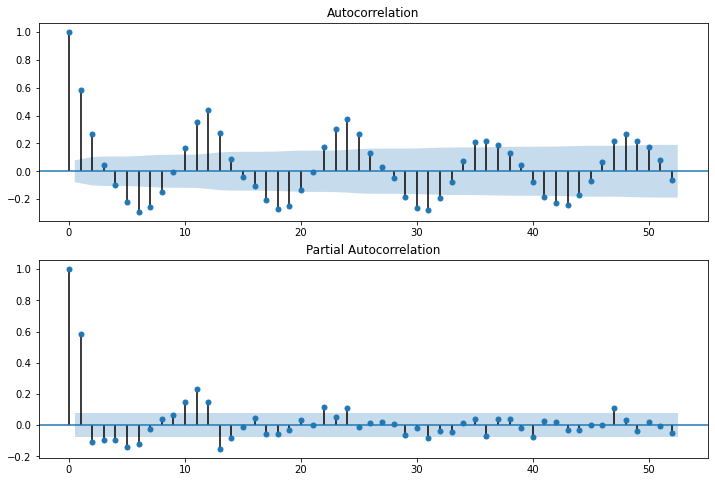

In [416]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store_46['Customers'], lags=52, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_46['Customers'], lags=52, ax=ax2)# , lags=40

# Applying VAR

In [417]:
exog = store_46[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_46[['Sales','Customers']], order=(25,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  622
Model:                            VAR(25)   Log Likelihood                -696.119
Date:                    Mon, 12 Apr 2021   AIC                           1598.238
Time:                            18:30:29   BIC                           2054.830
Sample:                                 0   HQIC                          1775.693
                                    - 622                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                26.46, 20.14   Jarque-Bera (JB):        93.23, 250.85
Prob(Q):                        0.95, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.20, 1.55   Skew:                       0.55, 0.62
Prob(H) (two-sided):            0.19, 0.00   Kurtosis:                   4.55, 5.85


In [418]:
store_46.index

RangeIndex(start=0, stop=622, step=1)

Sales  Customers
580  0.172689   0.148618
581  0.384298   0.127151
582  1.236742   0.948241
583  0.536921   0.168627
584  0.495688   0.225981
..        ...        ...
661 -0.551696  -0.575018
662 -0.590074  -0.576801
663 -0.318837  -0.342192
664 -0.020379  -0.032159
665  0.363305   0.283224

[86 rows x 2 columns]

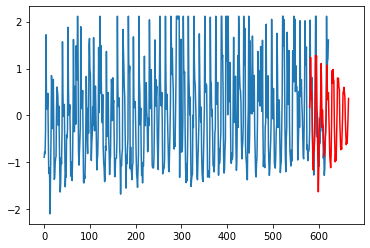

In [419]:
forecast_46 = res.predict(start = 580, end = 665, dynamic= False)  # predicting on validation set 
plt.plot(store_46['Sales'])
plt.plot(forecast_46['Sales'], c = "red")
forecast_46

In [420]:
forecast_st = scaler.inverse_transform(forecast_46)

In [421]:
forecast_st

array([[681.14666408, 678.26889961],
       [706.44451151, 675.70258284],
       [808.35450272, 773.86414228],
       [724.69071781, 680.66107177],
       [719.76125601, 687.51768886],
       [702.05542001, 680.63861144],
       [624.14743521, 613.37593516],
       [569.54879253, 566.89439639],
       [521.51795548, 505.46606714],
       [565.50894734, 527.91076416],
       [575.29969686, 557.07554574],
       [626.65473516, 604.99236294],
       [696.03690948, 689.53351657],
       [813.64677901, 775.95550897],
       [788.38659708, 732.61679814],
       [812.62113457, 748.09035226],
       [680.25934035, 653.43607169],
       [655.25679647, 652.80299695],
       [541.83600567, 555.98498896],
       [466.28842729, 446.75090034],
       [530.78271789, 507.58927393],
       [625.65689777, 598.1823943 ],
       [651.37486759, 627.47817547],
       [657.17551885, 656.29113976],
       [698.03607483, 707.45767956],
       [792.5560292 , 766.87096985],
       [746.32760024, 707.26179999],
 

In [422]:
sales = scaler.inverse_transform(store_46['Sales'])

In [423]:
sales[580:]

array([621.71552985, 903.3318082 , 772.11482824, 747.39278854,
       700.59454616, 757.31467738, 619.97919931, 535.64314413,
       566.07026992, 508.93672666, 579.21677264, 603.93881234,
       696.95652025, 913.16688051, 913.16688051, 613.44728915,
       606.08855492, 655.28458711, 559.86908939, 593.68619387,
       530.18610527, 577.5631245 , 595.09179479, 590.62694481,
       661.15503801, 727.21828122, 652.55606768, 653.38289175,
       620.55797615, 636.59836312, 551.51816628, 571.44462638,
       508.10990259, 523.98492474, 581.77992726, 627.42061594,
       656.77287043, 913.16688051, 750.03862556, 797.16759757,
       805.60120309, 852.8128575 ])

### MAPE and RMSE

In [424]:
abs_error = np.abs(store_46['Sales'].loc[580:]-forecast_46.Sales)
actual = store_46.Sales[580:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [425]:
mape

74.17

In [426]:
rmse = np.sqrt(mean_squared_error(store_46.Sales[580:], forecast_46.Sales[:42])).round(2)

In [427]:
rmse

0.65

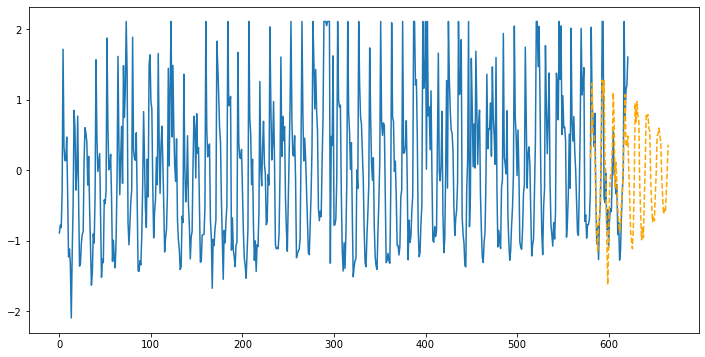

In [428]:
plt.figure(figsize=(12,6))
forecast = res.predict(start = 580, end = 662, dynamic= False)  
plt.plot(store_46['Sales'])
plt.plot(forecast_46['Sales'], c = "orange", linestyle = "dashed")

### VARMAX

In [429]:
exog = store_46[['Promo','Promo2','SchoolHoliday','StateHoliday','PromoInterval']]
mod = sm.tsa.VARMAX(store_46[['Sales','Customers']], order=(15,15), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  622
Model:                      VARMAX(15,15)   Log Likelihood                -413.530
Date:                    Mon, 12 Apr 2021   AIC                           1093.059
Time:                            18:57:44   BIC                           1682.641
Sample:                                 0   HQIC                          1322.200
                                    - 622                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                21.13, 27.46   Jarque-Bera (JB):        55.13, 638.06
Prob(Q):                        0.99, 0.93   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.95, 1.80   Skew:                       0.11, 0.90
Prob(H) (two-sided):            0.70, 0.00   Kurtosis:                   4.44, 7.63


Sales  Customers
580  0.163961   0.155022
581  1.378467   0.909520
582  1.043952   0.660558
583  0.500938   0.057029
584  0.595661   0.382168
585  0.826090   0.459816
586 -0.535738  -0.537175
587 -0.875055  -0.949105
588 -0.925913  -1.093956
589 -0.852605  -1.140156
590 -0.675150  -0.883704
591 -0.523068  -0.694179
592 -0.111641   0.002423
593  1.742987   1.349665
594  0.909247   0.363099
595  0.992537   0.589329
596 -0.072962  -0.461498
597  0.358221   0.081660
598 -0.818461  -0.806149
599 -1.038143  -1.192539
600 -0.915467  -1.147832
601 -0.698666  -0.720181
602 -0.579098  -0.732628
603 -0.031522   0.092917
604 -0.082173   0.088507
605  1.279796   1.081959
606  0.429975   0.048168
607  0.052810  -0.265414
608 -0.063983  -0.135869
609  0.357271   0.257816
610 -0.981149  -0.689540
611 -0.938199  -0.742505
612 -1.375476  -1.394661
613 -0.945494  -0.849903
614 -1.056419  -1.030013
615 -0.597170  -0.438229
616 -0.232465  -0.068659
617  1.222889   1.038099
618  0.934435   0.723189
619  0.457542   0.164875
620  0.724531   0.585705
621  1.174370   1.038282

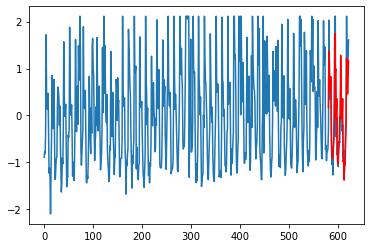

In [430]:
forecast = res.predict(start = 580, end = 621, dynamic= False)   # predicting on validation set
plt.plot(store_46['Sales'])
plt.plot(forecast['Sales'], c = "red")
forecast

In [431]:
forecast_st = scaler.inverse_transform(forecast)

In [432]:
forecast_st

array([[680.1031371 , 679.03448881],
       [825.29779884, 769.23501707],
       [785.30638085, 739.47153897],
       [720.38884254, 667.31945907],
       [731.71304622, 706.18992316],
       [759.26091377, 715.47275773],
       [596.45400702, 596.28215404],
       [555.88849162, 547.03581853],
       [549.80839935, 529.7187993 ],
       [558.57243375, 524.19558674],
       [579.7871794 , 554.85451515],
       [597.96865205, 577.51233849],
       [647.15485683, 660.79126482],
       [868.8762729 , 821.85449156],
       [769.20230725, 703.9101908 ],
       [779.1596824 , 730.95603921],
       [651.77894566, 605.32939304],
       [703.32704578, 670.2641243 ],
       [562.65433789, 564.1262686 ],
       [536.39132448, 517.9332534 ],
       [551.05726782, 523.27796017],
       [576.97591086, 574.40377492],
       [591.27032762, 572.91573529],
       [656.73315634, 671.60981732],
       [650.67776124, 671.08267241],
       [813.50158022, 789.85013889],
       [711.90520942, 666.26013269],
 

In [433]:
sales = scaler.inverse_transform(store_46['Sales'])

In [434]:
sales[580:]

array([621.71552985, 903.3318082 , 772.11482824, 747.39278854,
       700.59454616, 757.31467738, 619.97919931, 535.64314413,
       566.07026992, 508.93672666, 579.21677264, 603.93881234,
       696.95652025, 913.16688051, 913.16688051, 613.44728915,
       606.08855492, 655.28458711, 559.86908939, 593.68619387,
       530.18610527, 577.5631245 , 595.09179479, 590.62694481,
       661.15503801, 727.21828122, 652.55606768, 653.38289175,
       620.55797615, 636.59836312, 551.51816628, 571.44462638,
       508.10990259, 523.98492474, 581.77992726, 627.42061594,
       656.77287043, 913.16688051, 750.03862556, 797.16759757,
       805.60120309, 852.8128575 ])

In [435]:
abs_error = np.abs(store_46['Sales'].loc[580:]-forecast.Sales)
actual = store_46.Sales[580:]
mape = np.round(np.mean(abs_error/actual)*100, 2)

In [436]:
mape

-41.23

In [437]:
rmse = np.sqrt(mean_squared_error(store_46.Sales[580:], forecast.Sales[:80])).round(2)

In [438]:
rmse

0.46

# Cointegration Test

In [439]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [440]:
joh_model46 = coint_johansen(store_46[['Sales','Customers']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model46)

   max_eig_stat  trace_stat
0    206.303967  329.847092
1    123.543125  123.543125 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## Rank

In [502]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
select_coint_rank(store_46[['Sales','Customers']],-1,1, method="maxeig").rank

2

**Two time series are stationary and are not cointegrated**

# IRF

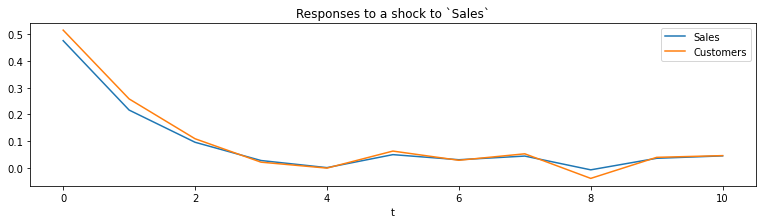

In [441]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `Sales`');

## Results

|Model| Store | MAPE | RMSE |
| :- | :- | -:- | -:- |
| | Store 1 | 5.79 | 0.52 |
| | Store 3 | 32.81 | 0.4 |
| | Store 8 | 15.78 | 0.42 |
| | Store 9 | 43.25 | 1.72 |
| VAR | Store 13 | 4.61 | 0.65 |
| | Store 25 | 8.45 | 1.19 |
| | Store 29 | 112.68 | 0.62 |
| | Store 31 | 20.74 | 0.61 |
| | Store 46 | 74.17 | 0.46 |

## Conclusion

1. VAR and VARMAX models are identifying the patterns/trend correctly for the data which is part of dataset, but lacks in identfying trends while forecasting future values.
2. Data is trained completely on the data, and forecasted on validation set and future values whcih are not part of dataset.